In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

import missingno as msno
import mdst # my data science tools
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFECV, SelectKBest, f_regression, RFE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



from scipy import stats
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.weightstats import DescrStatsW

from missingno.utils import nullity_filter, nullity_sort

c:\python36-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
path = 'Jupyter NB Data\\2017-fCC-New-Coders-Survey-Data.csv'
df = pd.read_csv(path)

c:\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Survey Structure

**Survey Questions**

* IsSoftwareDev
    * Yes
        * FirstDevJob
        * TimeLooking
    * No
        * JobPref
        * Job Interest
        * JobApply
        * ExpectedEarning
        * JobWherePref
            * Home - Go To Resources
                
            * Office or No Preference
                * Job Relocate       
* Resources
* CodeEvents
* Podcasts
* YouTube
* Hours Learning
* Months Programming
* Bootcamp Attend
    * Yes
        * BootCampName
        * BootCampFinish
        * BootCampLoan
        * BootcampRecommend
    * No
        * Go To Money Spent
* Money Spent

**Background Info**

-	Age
-	ChildrenNumber
-	CityPopulation
-	CommuteTime
-	CountryCitizen
-	CountryLive
-	EmploymentField
-	EmploymentFieldOther
-	EmploymentStatus
-	EmploymentStatusOther
-	ExpectedEarning
-	FinanciallySupporting
-	Gender
-	GenderOther
-	HasChildren
-	HasDebt
-	HasFinancialDependents
-	HasHighSpdInternet
-	HasHomeMortgage
-	HasServedInMilitary
-	HasStudentDebt
-	HomeMortgageOwe
-	Income
-	IsEthnicMinority
-	IsReceiveDisabilitiesBenefits
-	IsUnderEmployed
-	LanguageAtHome
-	MaritalStatus
-	SchoolDegree
-	SchoolMajor
-	StudentDebtOwe


# Cleaning

In [3]:
# clean this up
cdf = df.copy()
cols = ['IsUnderEmployed', 'Income', 'IsSoftwareDev', 'EmploymentStatus', 'EmploymentField', 'FirstDevJob',]

cols += ['BootcampFinish',
         'HoursLearning','MonthsProgramming',]

cols += ['CodeEventConferences',
         'CodeEventDjangoGirls',
         'CodeEventFCC',
         'CodeEventGameJam',
         'CodeEventGirlDev',
         'CodeEventHackathons',
         'CodeEventMeetup',
         'CodeEventNodeSchool',
         'CodeEventNone',
         'CodeEventOther',
         'CodeEventRailsBridge',
         'CodeEventRailsGirls',
         'CodeEventStartUpWknd',
         'CodeEventWkdBootcamps',
         'CodeEventWomenCode',
         'CodeEventWorkshops',]

cols += ['PodcastChangeLog',
     'PodcastCodeNewbie',
     'PodcastCodePen',
     'PodcastDevTea',
     'PodcastDotNET',
     'PodcastGiantRobots',
     'PodcastJSAir',
     'PodcastJSJabber',
     'PodcastNone',
     'PodcastOther',
     'PodcastProgThrowdown',
     'PodcastRubyRogues',
     'PodcastSEDaily',
     'PodcastSERadio',
     'PodcastShopTalk',
     'PodcastTalkPython',
     'PodcastTheWebAhead',]

cols += ['JobInterestBackEnd',
     'JobInterestDataEngr',
     'JobInterestDataSci',
     'JobInterestDevOps',
     'JobInterestFrontEnd',
     'JobInterestFullStack',
     'JobInterestGameDev',
     'JobInterestInfoSec',
     'JobInterestMobile',
     'JobInterestOther',
     'JobInterestProjMngr',
     'JobInterestQAEngr',
     'JobInterestUX',
     
     'JobRelocateYesNo',]

cols +=  ['YouTubeCodeCourse',
     'YouTubeCodingTrain',
     'YouTubeCodingTut360',
     'YouTubeComputerphile',
     'YouTubeDerekBanas',
     'YouTubeDevTips',
     'YouTubeEngineeredTruth',
     'YouTubeFCC',
     'YouTubeFunFunFunction',
     'YouTubeGoogleDev',
     'YouTubeLearnCode',
     'YouTubeLevelUpTuts',
     'YouTubeMIT',
     'YouTubeMozillaHacks',
     'YouTubeOther',
     'YouTubeSimplilearn',
     'YouTubeTheNewBoston']

cols += ['ResourceCodecademy',
 'ResourceCodeWars',
 'ResourceCoursera',
 'ResourceCSS',
 'ResourceEdX',
 'ResourceEgghead',
 'ResourceFCC',
 'ResourceHackerRank',
 'ResourceKA',
 'ResourceLynda',
 'ResourceMDN',
 'ResourceOdinProj',
 'ResourceOther',
 'ResourcePluralSight',
 'ResourceSkillcrush',
 'ResourceSO',
 'ResourceTreehouse',
 'ResourceUdacity',
 'ResourceUdemy',
 'ResourceW3S']



cdf = cdf[cols]

In [4]:
cdf = df.copy()

## Null Summary

In [5]:
ns = mdst.null_summary(df).sort_values(by='pct_nulls',ascending=False)
ns

total rows:  18175


,null_counts,pct_nulls,dtype
GenderOther,18119,99.6919,object
CodeEventRailsGirls,18043,99.2737,float64
CodeEventRailsBridge,18042,99.2682,float64
CodeEventDjangoGirls,18010,99.0922,float64
PodcastGiantRobots,17988,98.9711,float64
YouTubeSimplilearn,17974,98.8941,float64
JobInterestOther,17909,98.5365,object
CodeEventGameJam,17885,98.4044,float64
CodeEventGirlDev,17878,98.3659,float64
PodcastTheWebAhead,17864,98.2889,float64


## Fills

In [6]:
# clean this up
# drop null income rows, as this is what we are trying to predict
# cdf = cdf[~cdf['IsUnderEmployed'].isnull()]

# we only want people who learned programming within the last 5 years
# cdf = cdf[(cdf['MonthsProgramming']<60) & (cdf['MonthsProgramming']>11)]


cdf['BootcampFinish'] = cdf['BootcampFinish'].fillna(0)
# cdf['BootcampLoanYesNo'] = cdf['BootcampLoanYesNo'].fillna(0)
cdf['FirstDevJob'] = cdf['FirstDevJob'].fillna(0)
# cdf['JobApplyWhen'] = cdf['JobApplyWhen'].fillna('not applicable')

# fill all CodeEvent categories with 0 if null

# fill all podcast, youtube, resource, CodeEvent null cols with 0
cdf[[col for col in cdf.columns if 'Podcast' in col]] = cdf[[col for col in cdf.columns if 'Podcast' in col]].fillna(0)

cdf[[col for col in cdf.columns if 'YouTube' in col]] = cdf[[col for col in cdf.columns if 'YouTube' in col]].fillna(0)

cdf[[col for col in cdf.columns if 'Resource' in col]] = cdf[[col for col in cdf.columns if 'Resource' in col]].fillna(0)

cdf[[col for col in cdf.columns if 'CodeEvent' in col]] = cdf[[col for col in cdf.columns if 'CodeEvent' in col]].fillna(0)


In [7]:
# fills
cdf['JobApplyWhen'] = cdf['JobApplyWhen'].fillna('not applicable')
cdf['BootcampFinish'] = cdf['BootcampFinish'].fillna(0)
cdf['BootcampName'] = cdf['BootcampName'].fillna('not applicable')
cdf['BootcampRecommend'] = cdf['BootcampRecommend'].fillna(0)
cdf['BootcampLoanYesNo'] = cdf['BootcampLoanYesNo'].fillna(0)

cdf['HomeMortgageOwe'] = cdf['HomeMortgageOwe'].fillna(0)
cdf['ChildrenNumber'] = cdf['ChildrenNumber'].fillna(cdf['ChildrenNumber'].mean())
cdf['StudentDebtOwe'] = cdf['StudentDebtOwe'].fillna(0)
cdf['FinanciallySupporting'] = cdf['FinanciallySupporting'].fillna(cdf['FinanciallySupporting'].mean())
cdf['HasChildren'] = cdf['HasChildren'].fillna(cdf['HasChildren'].mean())
cdf['HasHomeMortgage'] = cdf['HasHomeMortgage'].fillna(cdf['HasHomeMortgage'].mean())
cdf['HasStudentDebt'] = cdf['HasStudentDebt'].fillna(cdf['HasStudentDebt'].mean())

cdf['ExpectedEarning'] = cdf['ExpectedEarning'].fillna(cdf['ExpectedEarning'].mean())
cdf['Income'] = cdf['Income'].fillna(cdf['Income'].median())
cdf['EmploymentField'] = cdf['EmploymentField'].fillna('not answered')
cdf['SchoolMajor'] = cdf['SchoolMajor'].fillna('not answered')
cdf['IsUnderEmployed'] = cdf['IsUnderEmployed'].fillna(cdf['IsUnderEmployed'].mean())
cdf['CommuteTime'] = cdf['CommuteTime'].fillna(cdf['CommuteTime'].value_counts().index[0])
cdf['EmploymentStatus'] = cdf['EmploymentStatus'].fillna(cdf['EmploymentStatus'].value_counts().index[0])

cdf['IsReceiveDisabilitiesBenefits'] = cdf['IsReceiveDisabilitiesBenefits'].fillna(0)

cdf['HasServedInMilitary'] = cdf['HasServedInMilitary'].fillna(0)

cdf['HasDebt'] = cdf['HasDebt'].fillna(cdf['HasDebt'].mean())
cdf['IsEthnicMinority'] = cdf['IsEthnicMinority'].fillna(cdf['IsEthnicMinority'].mean())
cdf['HasFinancialDependents'] = cdf['HasFinancialDependents'].fillna(cdf['HasFinancialDependents'].mean())
cdf['MaritalStatus'] = cdf['MaritalStatus'].fillna('not answered')
cdf['CountryLive'] = cdf['CountryLive'].fillna('not answered')
cdf['LanguageAtHome'] = cdf['LanguageAtHome'].fillna('not answered')

# fill all podcast, youtube, resource, CodeEvent null cols with 0
cdf[[col for col in cdf.columns if 'Podcast' in col]] = cdf[[col for col in cdf.columns if 'Podcast' in col]].fillna(0)
cdf[[col for col in cdf.columns if 'YouTube' in col]] = cdf[[col for col in cdf.columns if 'YouTube' in col]].fillna(0)
cdf[[col for col in cdf.columns if 'Resource' in col]] = cdf[[col for col in cdf.columns if 'Resource' in col]].fillna(0)
cdf[[col for col in cdf.columns if 'CodeEvent' in col]] = cdf[[col for col in cdf.columns if 'CodeEvent' in col]].fillna(0)



## Drops

In [8]:
# column drops

#columns to exclude based on survey structure. (These questions were only answered by non-developers)
exclude = ['FirstDevJob',
 'JobApplyWhen',
 'JobInterestBackEnd',
 'JobInterestDataEngr',
 'JobInterestDataSci',
 'JobInterestDevOps',
 'JobInterestFrontEnd',
 'JobInterestFullStack',
 'JobInterestGameDev',
 'JobInterestInfoSec',
 'JobInterestMobile',
 'JobInterestOther',
 'JobInterestProjMngr',
 'JobInterestQAEngr',
 'JobInterestUX',
 'JobPref',
 'JobRelocateYesNo',
 'JobRoleInterest',
 'JobWherePref',
 'ExpectedEarning']

# other columns to drop (survey metadata, written in "other" answers)
exclude += ['EmploymentStatusOther', 'EmploymentFieldOther', 'GenderOther', 'ID.x', 'ID.y', 
               'Part1EndTime', 'Part1StartTime', 'Part2EndTime', 'Part2StartTime', 'NetworkID']

cdf = cdf.drop(exclude, axis=1)

In [9]:
# row drops
cdf = cdf.dropna()

## Subsection

In [10]:
# we want programmers with less than 2 years experience
new_programmers = cdf[cdf['MonthsProgramming']<24]

# we want all developers and non developers with atleast 1 year experience 
new_programmers = new_programmers[(new_programmers['IsSoftwareDev']==1) | (new_programmers['MonthsProgramming']>11)]

# not focused on those under 18
new_programmers = new_programmers[new_programmers['Age']>17]

# Feature Engineering

In [11]:
# beginnings of my own convenience functions for feature engineering and data exploration
class Features_df():
    def __init__(self, df, y_col, test_size=.25, random_state=33):
        self.df = df.copy()
        self.df.index = range(len(df))
        self.numeric_col_names = list(df.select_dtypes(exclude=[object]).columns)
        self.numeric_col_names.remove(y_col)
        self.categorical_col_names = list(df.select_dtypes(include=[object]).columns)
        self.added_col_names = []
        self.original_col_names = list(df.columns)
        self.y_col = y_col
        self.capped_outlier_col_names = []
        self.pca_dct = {}
        
        
        self.test_size = test_size
        self.random_state = random_state

        self.train_df = self.df.sample(frac=1-self.test_size ,random_state=self.random_state)
        self.test_df = self.df.drop(self.train_df.index)
        

    def box_cox_y(self):
        self.df['bc'+self.y_col], self.bc_y_lambda = boxcox(self.df[self.y_col])
              
    def train_test_df_update(self):
        ''' re-initializes self.train_df and self.test_df based on current self.df
        Feature engineer on self.df and call update to incorporate changes on training and testing df
        '''
        self.train_df = self.df.sample(frac=1-self.test_size ,random_state=self.random_state)
        self.test_df = self.df.drop(self.train_df.index)
        
        
    def get_dummies(self, cols=None):
        
        if not cols:
            cols=self.categorical_col_names

        self.most_common_dummy_dct = {}

        for col_name in cols:
            most_common = col_name + '_' + self.df[col_name].value_counts().index[0]
            self.most_common_dummy_dct[col_name] = most_common
              
        dummies_df = pd.get_dummies(self.df[cols], prefix=cols)
        self.df = pd.concat([self.df, dummies_df], axis=1)
        
        self.dummy_dct = {col: [d_col for d_col in dummies_df.columns if col in d_col] for col in cols}
            
    def drop_most_common_dummy(self, cols=None):
        
        if not cols:
            cols=self.most_common_dummy_dct.keys()
                
        cols_to_drop = [self.most_common_dummy_dct[i] for i in cols]
        self.df = self.df.drop(cols_to_drop, axis=1)

    def get_poly_features(self, cols=None, degree=2):
        
        if not cols:
            cols = self.numeric_col_names
        
        poly = PolynomialFeatures(degree)
        poly_df = pd.DataFrame(poly.fit_transform(self.df[cols]))
        self.poly_col_names = poly.get_feature_names()

        for i, col in reversed(list(enumerate(self.df[cols]))):
            self.poly_col_names = [pcn.replace('x'+str(i),col) for pcn in self.poly_col_names]

        poly_df.columns = self.poly_col_names
        
        poly_df.index = self.df.index
        
#         self.poly_df = self.poly_df.drop(self.numeric_col_names, axis=1)
        self.df = pd.concat([self.df, poly_df.drop(cols, axis=1)], axis=1)
        self.poly_col_names = [col for col in self.poly_col_names if col not in cols]
    
    def standardize_cols(self, cols=None):
        if not cols:
            cols = self.numeric_col_names
        scaler = StandardScaler()
        self.st_cols = []
        for col in cols:
            new_col = col+'_scaled'
            self.df[new_col] = scaler.fit_transform(self.df[[col]]).reshape(-1,)
            self.st_cols.append(new_col)
    
    def box_all_standard(self, cols=None):
        if not cols:
            try:
                cols = self.st_cols
            except:
                self.standardize_cols()
                cols = self.st_cols

        plt.figure(figsize=(20, len(cols)))
        sns.boxplot(data=self.df[cols], orient='h')

        
    def pca(self, name='all', cols=None):
        self.train_test_df_update()
        
        if not cols:
            cols = [col for col in self.df.columns if col not in self.categorical_col_names]

        pca = PCA()
        # fit on training data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(self.train_df[cols])
        pca.fit(scaled_data)
        
        # transform on entire dataset
        pca_array = pca.transform(self.df[cols])
        
        pca_col_names = [name+'_pca_'+str(i+1) for i in range(len(cols))]
        pca_df = pd.DataFrame(pca_array, columns=pca_col_names)
        self.df = pd.concat([self.df, pca_df], axis=1)
        self.pca_dct[name] = pca
        
        self.train_test_df_update()
    
    def display_feature_categories(self):
        self.added_col_names = list(self.df.columns) - self.original_col_names - self.poly_col_names - self.dummy_col_names
        print('numeric_col_names: {}'.format(self.numeric_col_names,))
        print('categorical_col_names: {}'.format(self.cagtegorical_col_names))
        print('poly_col_names: {}'.format(self.poly_col_names))
        print('added_col_names: {}'.format(self.added_col_names))
        print('original_col_names: {}'.format(self.original_col_names))
        
    def group_by_original_cols(self):
        self.origin_col_dct = {original_col:[] for original_col in self.original_col_names}
        for col in self.df.columns:
            for original_col in self.original_col_names:
                if original_col in col:
                    self.origin_col_dct[original_col] += [col]
                    
            
    def outlier_report(self, cols=None):
        if not cols:
            cols = [self.y_col] + self.numeric_col_names
            
        odf = pd.DataFrame(cols, columns=['column'])
        
        def outlier_cutoffs(arr):
            q1, q3 = arr.quantile(0.25), arr.quantile(0.75)
            iqr = q3-q1
            lower_co, upper_co = q1 - 1.5*(q3-q1), q3 + 1.5*(q3-q1)
            return (lower_co, upper_co)

        
        odf['lower_co'] = odf['column'].apply(lambda x: outlier_cutoffs(self.df[x])[0])
        odf['upper_co'] = odf['column'].apply(lambda x: outlier_cutoffs(self.df[x])[1])
        
        odf['upper_outlier_count'] = odf[['column','upper_co']].apply(
                                                lambda x: len(self.df[(self.df[x[0]] > x[1])]), axis=1)
        odf['lower_outlier_count'] = odf[['column','lower_co']].apply(
                                                lambda x: len(self.df[(self.df[x[0]] < x[1])]), axis=1)
        
        odf['total_outlier_count'] = odf['upper_outlier_count'] + odf['lower_outlier_count']
        
        odf = odf[odf.columns[::-1]]
        
        outliers_col_df = odf.set_index('column')
        
        self.outliers_col_df = outliers_col_df
        
        
        
        
#         ordf = self.df.copy()[cols]
        
        ordf = pd.DataFrame()
        ordf['outlier_sum'] = 0
        for col in cols:
            a = self.df[col]
            lower_co = outliers_col_df.loc[col,'lower_co']
            upper_co = outliers_col_df.loc[col,'upper_co']
            ordf[col] = a.mask((a>lower_co)&(a<upper_co))
        ordf['outlier_sum'] = ordf.count(axis=1)
        
        self.outliers_row_df = ordf.sort_values(by='outlier_sum',ascending=False)
        
    def cap_outliers(self, cols=None):
        if not cols:
            cols = self.numeric_col_names

        for col in cols:
            lower_co = self.outliers_col_df.loc[col, 'lower_co']
            upper_co = self.outliers_col_df.loc[col, 'upper_co']
            
            a = self.df[col]
            self.df[col+' capped_outliers'] = a.where(a > lower_co, lower_co)
            
            b = self.df[col+' capped_outliers']
            self.df[col+' capped_outliers'] = b.where(b < upper_co, upper_co)

            self.capped_outlier_col_names.append(col+' capped_outliers')
            
    def rounded_bins(self, cols=None, bins=5):
        if not cols:
            cols = self.numeric_col_names
            
        for col in cols:
            bin_size = (self.df[col].max() - self.df[col].min())/bins
            labels = [self.df[col].min()+b*bin_size+.5*bin_size for b in range(bins)]

            self.df[col+' rounded_bins'] = pd.to_numeric(pd.cut(self.df[col], bins, labels=labels))
        self.rounded_bins_cols = [col+' rounded_bins' for col in cols]

In [12]:
features = Features_df(new_programmers, 'IsSoftwareDev')

## Dummies

In [13]:
# Turn 'YouTubeOther', 'PodcastOther', 'CodeEventOther', 'ResourceOther' Other answers to binary columns

# "Other" write in answers that we want to turn to 1 or 0
other_cols = ['YouTubeOther', 'PodcastOther', 'CodeEventOther', 'ResourceOther']

# write in answers that we want to turn to 0
turn_to_zero = ['noone', 'Na', 'No', 'na', 'no one', 'not yet', 'No podcasts', 'no podcasts', 'none','None', 'n/a', 'no', 0]

# loop through cols, loop through turn_to_zero elems and replace each instance with 0, replace everything left with 1
for col in other_cols:
    for elem in turn_to_zero:
        features.df[col] = features.df[col].where(features.df[col] != elem, 0)
    features.df[col] = features.df[col].where(features.df[col] == 0, 1)
    features.df[col] = pd.to_numeric(features.df[col])


In [14]:
# Feature for top 4 most predictive YouTube Channels
top4 = ['YouTubeSimplilearn', 'YouTubeMozillaHacks','YouTubeGoogleDev', 'YouTubeFunFunFunction', ]

features.df['YouTube_top4']= (features.df[top4]==1).any(axis=1)

In [15]:
# create binary column for 'CodeEvent', 'Podcast', 'Resource', and 'YouTube'
turn_to_binary = ['CodeEvent', 'Podcast', 'Resource', 'YouTube']

for string in turn_to_binary:
    cols = [col for col in features.df.columns if string in col and 'None' not in col]
    features.df[string+'_binary'] = (features.df[cols] == 1).any(axis=1)


In [16]:
# Feature for top 4 most predictive podcasts

podcast_top4 = [
 'PodcastGiantRobots',
 'PodcastDotNET',
 'PodcastJSAir',
 'PodcastSERadio',]

features.df['Podcast_top4']= (features.df[podcast_top4]==1).any(axis=1)

In [17]:
# create count column for 'CodeEvent', 'Podcast', 'Resource', and 'YouTube'
cats = ['YouTube', 'Podcast', 'CodeEvent', 'Resource']

for cat in cats:
    cat_cols = [col for col in features.df.columns if cat in col and 'None' not in col]
    features.df[cat+'_count'] = features.df[cat_cols].sum(axis=1)

In [18]:
# get dummies
cols = [
 'BootcampName',
 'CityPopulation',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentStatus',
 'Gender',
 'LanguageAtHome',
 'MaritalStatus',
 'SchoolDegree',
 'SchoolMajor']

features.get_dummies(cols=cols)

In [19]:
# create dummy for those who have only used major resources (resources that >50% of respondents have used)
major_resources = ['ResourceFCC', 'ResourceSO', 'ResourceW3S', 'ResourceCodecademy']
minor_resources = ['ResourceMDN',
 'ResourceUdemy',
 'ResourceCSS',
 'ResourceCoursera',
 'ResourceUdacity',
 'ResourceEdX',
 'ResourceKA',
 'ResourcePluralSight',
 'ResourceTreehouse',
 'ResourceLynda',
 'ResourceCodeWars',
 'ResourceHackerRank',
 'ResourceEgghead',
 'ResourceOdinProj',
 'ResourceOther',
 'ResourceSkillcrush']
features.df['Resources_only_major'] = ((features.df[major_resources] == 1).any(axis=1)==1)&((features.df[minor_resources]==1).any(axis=1)==0)


In [20]:
# Feature for top 6 most predictive resources
top6 = ['ResourceEgghead', 'ResourcePluralSight', 'ResourceOther', 'ResourceCSS', 'ResourceCodeWars', 'ResourceMDN']

features.df['Resource_top6']= (features.df[top6]==1).any(axis=1)

In [21]:
# create dummy for those who have been to a non top-6 CodeEvent type

non_top6 = [
 'CodeEventFCC',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEvent_binary']

features.df['CodeEvent_non_top6']= (features.df[non_top6]==1).any(axis=1)



In [22]:
# SchoolDegree and SchoolMajor dummy engineering

# create Computer Science related major dummy
cs_related = ['Computer Science',
 'Computer Software Engineering',
 'Information Technology',
 'Computer Programming',
 'Computer and Information Studies',
 'Software Engineering',
 'Information Systems',
 'Management Information Systems',
 'Computer Systems Networking and Telecommunications',
 'Computer Engineering Technician',
 'Computer and Information Systems Security',
 'Computer Networking',
 'Computer Systems Analysis',
 'IT Services Administration',
 'Web Design',
 'Artificial Intelligence',
 'Information Operations',
 'Computer Graphics',
 'Game and Interactive Media Design',
 'Network, Database, and System Administration',
 'System, Networking, and LAN/WAN Management',
 'Game Design',
 'Electrical and Electronics Engineering',
 'Electrical Engineering',]
cs_unrelated = ['not answered',
 'Psychology',
 'Economics',
 'Mechanical Engineering',
 'Business Administration',
 'Business Administration and Management',
 'English',
 'Philosophy',
 'Engineering',
 'Mathematics',
 'Graphic Design',
 'Communication and Media Studies',
 'Accounting',
 'Finance',
 'Marketing',
 'History',
 'Biology',
 'Civil Engineering',
 'Physics',
 'Linguistics',
 'International Relations',
 'Political Science',
 'Geography',
 'Chemical Engineering',
 'Chemistry',
 'Biology and Biological Sciences',
 'Music',
 'Architecture',
 'Design and Visual Communications',
 'Sociology',
 'Education',
 'Law',
 'International Business',
 'Geology and Earth Science',
 'Journalism',
 'Systems Engineering',
 'Film and Video Studies',
 'Environmental Science',
 'Foreign Languages and Literatures',
 'Industrial Engineering',
 'Art Studies',
 'Art History',
 'Multimedia',
 'Cinematography And Film',
 'Computer Hardware Engineering',
 'Music Performance',
 'Robotics and Automation Engineering',
 'Liberal Arts',
 'General Studies',
 'Economics and Econometrics',
 'Music Technology',
 'Communications',
 'Computational and Applied Mathematics',
 'Audio and Video Production',
 'Bioengineering and Biomedical Engineering',
 'Japanese Language and Literature',
 'Biomedical Engineering',
 'Biochemistry',
 'Anthropology',
 'Biochemistry and Molecular Biology',
 'Engineering Design',
 'Telecommunications Technician',
 'Political Science and Government',
 'Spanish Language and Literature',
 'Linguistics, Interpretation, and Translation',
 'Chinese Language and Literature',
 'Environmental Engineering',
 'Creative Writing',
 'Literature',
 'Statistics',
 'Advertising',
 'Medicine',
 'Public Health',
 'Managerial Economics',
 'Ecology and Evolutionary Biology',
 'Mechanical Engineering Technician',
 'Geology',
 'Industrial Design',
 'Banking and Finance',
 'Graphic Communication and Printing',
 'Advertising and Marketing',
 'Studio Arts',
 'Environmental Studies',
 'Theatre Design',
 'Automotive Engineering',
 'Nursing',
 'Urban Planning',
 'Pharmacy',
 'Archaeology',
 'Industrial and Engineering Management',
 'Kinesiology and Exercise Science',
 'Tourism and Travel Services Management',
 'Biomedical Science',
 'Visual Arts',
 'Law Studies',
 'Aerospace and Aeronautical Engineering',
 'Neuroscience',
 'International Relations and National Security Studies',
 'Mathematics Teacher Education',
 'Russian and Eastern European Languages and Literature',
 'Human Resources Development',
 'German Language and Literature',
 'Microbiology',
 'Classics',
 'Music Theory and Composition',
 'Chiropractic',
 'Social Work',
 'Religious Studies',
 'Zoology',
 'Aeronautics and Aviation Technology',
 'Administrative Assistant',
 'Entrepreneurship',
 'Sustainability Studies',
 'Research and Experimental Psychology',
 'Architectural Engineering',
 'Anthropology and Archaeology',
 'Paralegal',
 'Math',
 'Commercial and Advertising Art',
 'English Language Studies',
 'Landscape Architecture',
 'Clinical Psychology',
 'Divinity, Ministry, and Pre-Theology',
 'Criminal Justice',
 'Library Science and Administration',
 'Marine Biology and Oceanography',
 'Biotechnology',
 'Photography',
 'Pharmaceutical Sciences',
 'Mechanical Drafting (CAD/CADD)',
 'Electrical Engineering Technician',
 'Environmental and Marine Sciences',
 "Women's Studies",
 'Engineering Mechanics',
 'Arabic Language and Literature',
 'Fashion and Apparel Design',
 'Engineering Physics',
 'Building Construction Technology',
 'Library and Archives Assisting',
 'Liberal Arts and Humanities',
 'Cellular Biology',
 'General Construction Trades',
 'Anatomy',
 
 'Talmudic and Rabbinical Studies',
 'Radiologic Technician',
 'Architectural Engineering Technician',
 'Astronomy',
 'Pre-Medicine Studies',
 'Agricultural Mechanics and Machinery',
 'Healthcare Administration',
 'Aquaculture',
 'Agricultural Business and Technology',
 'Climatology',
 'Teacher Education for Multiple Levels',
 'Developmental and Child Psychology',
 'Crafts and Artisanry',
 'Architectural Drafting (CAD/CADD)',
 'Interior Design',
 'Retailing Management',
 'Music History and Literature',
 'Teaching English as a Second Language',
 'Quality Control Technician',
 'Financial Planning',
 'Painting',
 'Truck,  Bus, and Commercial Vehicle Operation',
 'Pharmacology',
 'Latin and Ancient Greek Studies',
 'Logistics and Supply Chain Management',
 'Biblical Studies',
 'Acting',
 'Accounting Technician and Bookkeeping',
 'Medical Laboratory Technician',
 'Illustration',
 'Child Development',
 'Food Science',
 'Social Studies Teacher Education',
 'Audiology',
 'Agricultural and Food Products Processing',
 'Health Informatics',
 'Instrumentation Technician',
 'Bioinformatics',
 'Social Science Research Methods',
 'Actuarial Science',
 'Operations Management',
 'Technical Teacher Education',
 'East Asian Languages and Literatures',
 'History Teacher Education',
 'Astrophysics',
 'Physiology',
 'Industrial and Organizational Psychology',
 'Intelligence',
 'Agricultural Economics',
 'Mental Health Counseling',
 'Genetics',
 'Educational Media Design',
 'Computer Aided Design (CAD)',
 'Social Psychology',
 'Meteorology',
 'Engineering Science',
 'Special Education and Teaching',
 'Molecular Biology',
 'Marine Biology',
 'European and Russian Studies',
 'Theology',
 'Music Teacher Education',
 'Speech Communication and Rhetoric',
 'Computer Systems Technician',
 'Parks, Recreation and Leisure Facilities Management',
 'Sport and Fitness Management',
 'Security and Loss Prevention Services',
 'Nutrition',
 'Foods, Nutrition, and Wellness Studies',
 'Nuclear Engineering',
 'Public Administration',
 'Advanced Dentistry and Oral Sciences',
 'Agricultural Engineering',
 'Petroleum Engineering',
 'French Language and Literature',
 'Natural Resources Conservation',
 'Industrial and Product Design',
 'Animation, Video Graphics and Special Effects',
 'Space and Undersea Systems Operations',
 'Management Sciences and Statistics',
 'Animation',
 'Sculpture',
 'Mass Communication',
 'Biomedical Sciences and Molecular Medicine',
 'Education of Individuals with Impairments and Disabilities',
 'Economic Development',
 'Auto Mechanic',
 'Foreign Language Teacher  Education',
 'Marine Science',
 'Environmental Architecture and Design',
 'Adult and Continuing Education',
 'Sheet Metal Technology',
 'Automotive Engineering Technician',
 'Nail Technician',
 'Hotel and Hospitality Management',
 'Theatre, Arts, and Media Management',
 'Electrical and Power Transmission Installation',
 'Islam',
 'Urban Studies and Affairs',
 'Air Traffic Control',
 'Architectural Sciences and Technology',
 'Structural Engineering',
 'Human Resources Management',
 'Intellectual Property Law',
 'Asian Studies',
 'Engineering Management',
 'Organizational Communication',
 'Comparative Literature']

features.df['cs_related_major'] = np.where((features.df['SchoolMajor'].isin(cs_related)), 1, 0)


# feature for higher education degree (associates or above)
degrees = ["bachelor's degree",
 "master's degree (non-professional)",
 'professional degree (MBA, MD, JD, etc.)',
 "associate's degree",
 'trade, technical, or vocational training',
 'Ph.D.']

features.df['degree'] = np.where((features.df['SchoolDegree'].isin(degrees)),1,0)

# feature for Computer Science related higher education degree 
features.df['cs_related_degree'] = np.where((features.df['cs_related_major']==1)&(features.df['degree']==1), 1, 0)

#feature for post grad degree
post_grad_degrees = ["master's degree (non-professional)",
 'professional degree (MBA, MD, JD, etc.)',
  'Ph.D.']

features.df['post_grad_degree'] = np.where((features.df['SchoolDegree']).isin(post_grad_degrees), 1, 0)

## Outliers

In [23]:
#show outlier report by category
cols = [ 'HomeMortgageOwe', 'StudentDebtOwe',
        'MoneyForLearning', 'Income', 'ChildrenNumber',
        'HoursLearning', 'Age', 'MonthsProgramming', 
         'CodeEvent_count', 'Podcast_count', 'Resource_count', 'YouTube_count']
features.outlier_report(cols)
features.outliers_col_df

,total_outlier_count,lower_outlier_count,upper_outlier_count,upper_co,lower_co
column,,,,,
HomeMortgageOwe,251,0,251,0.000000,0.000000
StudentDebtOwe,675,0,675,0.000000,0.000000
MoneyForLearning,437,0,437,1250.000000,-750.000000
Income,670,268,402,52000.000000,12000.000000
ChildrenNumber,410,186,224,1.832325,1.832325
HoursLearning,137,0,137,41.000000,-15.000000
Age,133,0,133,43.000000,11.000000
MonthsProgramming,207,200,7,22.000000,6.000000
CodeEvent_count,63,0,63,5.000000,-3.000000


In [24]:
#cap outliers of numeric columns (using 1.5 IQR definition)
cols = [ 'HomeMortgageOwe', 'StudentDebtOwe',
        'MoneyForLearning', 'Income', 'ChildrenNumber',
        'HoursLearning', 'Age', 'MonthsProgramming', 
         'CodeEvent_count', 'Podcast_count', 'Resource_count', 'YouTube_count']
features.cap_outliers(cols)

## Transformations

In [25]:
# get polynomial and interaction features on numerical columns

cols = [ 'HomeMortgageOwe', 'StudentDebtOwe',
        'MoneyForLearning', 'Income', 'ChildrenNumber',
        'HoursLearning', 'Age', 'MonthsProgramming', 
         'CodeEvent_count', 'Podcast_count', 'Resource_count', 'YouTube_count']

features.get_poly_features(cols)

In [26]:
# bin numerical columns and round to bin middle number
cols = [ 'HomeMortgageOwe', 'StudentDebtOwe',
        'MoneyForLearning', 'Income', 'ChildrenNumber',
        'HoursLearning', 'Age', 'MonthsProgramming', 
         'CodeEvent_count', 'Podcast_count', 'Resource_count', 'YouTube_count']

features.rounded_bins(cols)

In [27]:
def division_features(df, cols):
    for col in cols:
        for col2 in cols:
            df[col+'/'+col2] = df[col]/df[col2]

In [28]:
# division interaction features between rounded bin cols
cols = ['HomeMortgageOwe rounded_bins',
 'StudentDebtOwe rounded_bins',
 'MoneyForLearning rounded_bins',
 'Income rounded_bins',
 'ChildrenNumber rounded_bins',
 'HoursLearning rounded_bins',
 'Age rounded_bins',
 'MonthsProgramming rounded_bins',
 'CodeEvent_count rounded_bins',
 'Podcast_count rounded_bins',
 'Resource_count rounded_bins',
 'YouTube_count rounded_bins']
division_features(features.df, cols)

### Numerical to Categorical

In [29]:
# Age Old person (60+) and young person (18-22) category
features.df['age_18-22'] = np.where((features.df['Age']>17)&(features.df['Age']<23), 1, 0)
features.df['age_60+'] = np.where((features.df['Age']>=60), 1, 0)

In [30]:
# MoneyForLearning binary
features.df['MoneyForLearning_binary'] = np.where(features.df['MoneyForLearning']>0, 1, 0)

### Categorical to Numerical

In [31]:
# Rank School Degree types

degree_rank_dct = {
 'no high school (secondary school)': 0,
 'some high school': 1,
 'high school diploma or equivalent (GED)': 2,
 "associate's degree": 3,
 'trade, technical, or vocational training': 3,
 'some college credit, no degree': 4,
 "bachelor's degree": 5,
 "master's degree (non-professional)": 6,
 'professional degree (MBA, MD, JD, etc.)': 6,
 'Ph.D.': 7,
}

features.df['school_degree_rank'] = features.df['SchoolDegree'].apply(lambda x: degree_rank_dct[x])

## PCA

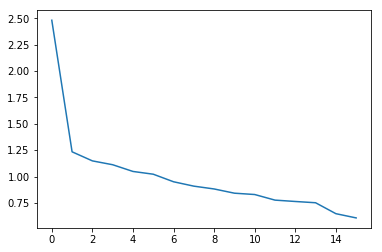

In [32]:
# PCA podcast dummies
cols = ['PodcastChangeLog',
 'PodcastCodeNewbie',
 'PodcastCodePen',
 'PodcastDevTea',
 'PodcastDotNET',
 'PodcastGiantRobots',
 'PodcastJSAir',
 'PodcastJSJabber',
 'PodcastOther',
 'PodcastProgThrowdown',
 'PodcastRubyRogues',
 'PodcastSEDaily',
 'PodcastSERadio',
 'PodcastShopTalk',
 'PodcastTalkPython',
 'PodcastTheWebAhead']
features.pca(name='podcasts', cols=cols)

plt.plot(features.pca_dct['podcasts'].explained_variance_)

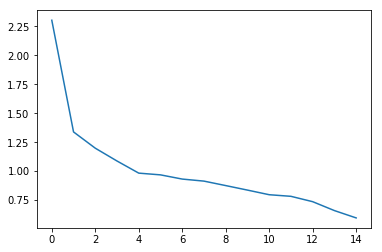

In [33]:
# PCA CodeEvent Dummies
cols = ['CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',]

features.pca(name='code_event', cols=cols)
plt.plot(features.pca_dct['code_event'].explained_variance_)

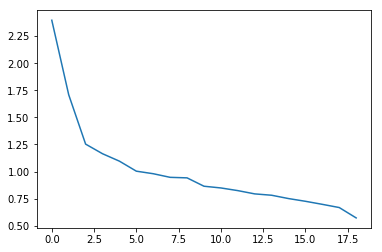

In [34]:
# PCA Resource Dummies
cols = [
 'ResourceCodecademy',
 'ResourceCodeWars',
 'ResourceCoursera',
 'ResourceCSS',
 'ResourceEdX',
 'ResourceEgghead',
 'ResourceHackerRank',
 'ResourceKA',
 'ResourceLynda',
 'ResourceMDN',
 'ResourceOdinProj',
 'ResourceOther',
 'ResourcePluralSight',
 'ResourceSkillcrush',
 'ResourceSO',
 'ResourceTreehouse',
 'ResourceUdacity',
 'ResourceUdemy',
 'ResourceW3S',]

features.pca(name='resource', cols=cols)
plt.plot(features.pca_dct['resource'].explained_variance_)

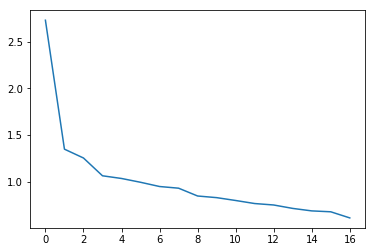

In [35]:
# PCA YouTube Dummies
cols = ['YouTubeCodeCourse',
 'YouTubeCodingTrain',
 'YouTubeCodingTut360',
 'YouTubeComputerphile',
 'YouTubeDerekBanas',
 'YouTubeDevTips',
 'YouTubeEngineeredTruth',
 'YouTubeFCC',
 'YouTubeFunFunFunction',
 'YouTubeGoogleDev',
 'YouTubeLearnCode',
 'YouTubeLevelUpTuts',
 'YouTubeMIT',
 'YouTubeMozillaHacks',
 'YouTubeOther',
 'YouTubeSimplilearn',
 'YouTubeTheNewBoston',]

features.pca(name='YouTube', cols=cols)
plt.plot(features.pca_dct['YouTube'].explained_variance_)

# Data Exploration

In [36]:
features.train_test_df_update()

## Odds

In [37]:
def y_odds_at_x(x, y, xbinsize=None):
    
    yodds = []
    if not xbinsize:
        xvals = x.unique()
        for xi in xvals: 
            y1_ct = y[x == xi].sum()  # The number of trials y = 1.
            y0_ct = len(y[x == xi]) - y1_ct  # The number of trials y = 0.
            yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
    else:
        bin_transformed = x.apply(lambda x: (x//xbinsize + .5) * xbinsize)    
        xvals = bin_transformed.unique()
        for xi in xvals: 
            y1_ct = y[bin_transformed == xi].sum()  # The number of trials y = 1.
            y0_ct = len(y[bin_transformed == xi]) - y1_ct  # The number of trials y = 0.
            yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
    
    return xvals, np.array(yodds)

## Distributions

### Age

#### before subsetting

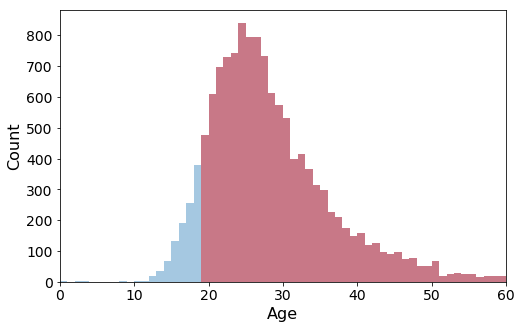

<Figure size 576x360 with 0 Axes>

In [38]:
plt.figure(figsize=(8, 5))

sns.distplot(cdf['Age'],kde=False, bins=int(cdf['Age'].max()-int(cdf['Age'].min())),)

after = cdf[cdf['Age']>18]
sns.distplot(after['Age'], kde=False, bins=int(after['Age'].max())-int(after['Age'].min()), color='red')

plt.ylabel('Count')

plt.xlim((0,60))

plt.xlabel('Age', fontsize=16)
plt.xticks(fontsize=14)

plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=14)

plt.figure(figsize=(8,5))
plt.show()
# plt.plot((18,18), (0,900), color='red')

In [39]:
xvals, yodds = y_odds_at_x(cdf['Age'], cdf['IsSoftwareDev'])
log_yodds = np.log(yodds)

vc = cdf['Age'].value_counts()

lodds_df = pd.DataFrame([xvals,yodds,log_yodds]).T
lodds_df.columns = ['xvals', 'yodds', 'log_yodds']

lodds_df.set_index('xvals', inplace=True)
lodds_df.sort_index(inplace=True)
lodds_df['size'] = vc.sort_index()
lodds_df

c:\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
c:\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,yodds,log_yodds,size
xvals,,,
0.0,1.000000,0.000000,2
2.0,0.000000,-inf,1
3.0,0.000000,-inf,1
8.0,0.000000,-inf,1
10.0,0.000000,-inf,1
11.0,0.000000,-inf,2
12.0,0.055556,-2.890372,19
13.0,0.030303,-3.496508,34
14.0,0.014925,-4.204693,68


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

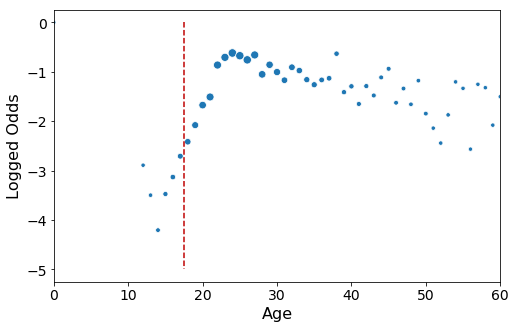

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(lodds_df.index, lodds_df['log_yodds'], size=lodds_df['size'], legend=False )
plt.plot((17.5,17.5), (0,-5), color=(.75,0,0), linestyle='dashed')

plt.ylabel('Logged Odds', fontsize=16)
plt.yticks(fontsize=14)

plt.xlim((0,60))
plt.xlabel('Age', fontsize=16)
plt.xticks(fontsize=14)

### MonthsProgramming

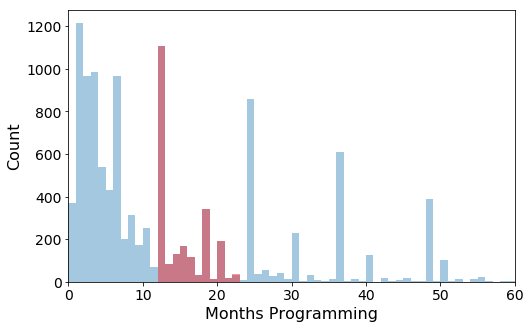

<Figure size 576x360 with 0 Axes>

In [41]:
plt.figure(figsize=(8, 5))

before = cdf[cdf['Age']>=18]

sns.distplot(before['MonthsProgramming'],kde=False, bins=int(before['MonthsProgramming'].max()))

after = before[(before['MonthsProgramming']>=12) & (before['MonthsProgramming']<24)]

bins = int(after['MonthsProgramming'].max())-int(after['MonthsProgramming'].min())
sns.distplot(after['MonthsProgramming'], kde=False, bins=bins, color='red')

plt.xlim(0,60)
plt.xlabel('Months Programming', fontsize=16)
plt.xticks(fontsize=14)

plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=14)

plt.figure(figsize=(8,5))

plt.show()

In [42]:
xvals, yodds = y_odds_at_x(before['MonthsProgramming'], before['IsSoftwareDev'])
log_yodds = np.log(yodds)

vc = before['MonthsProgramming'].value_counts()

lodds_df = pd.DataFrame([xvals,yodds,log_yodds]).T
lodds_df.columns = ['xvals', 'yodds', 'log_yodds']

lodds_df.set_index('xvals', inplace=True)
lodds_df.sort_index(inplace=True)
lodds_df['size'] = vc.sort_index()
lodds_df

c:\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
c:\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,yodds,log_yodds,size
xvals,,,
0.0,0.016393,-4.110874,372
1.0,0.024452,-3.711046,1215
2.0,0.039742,-3.225341,968
3.0,0.056745,-2.869185,987
4.0,0.067460,-2.696216,538
5.0,0.104859,-2.255135,432
6.0,0.131301,-2.030261,965
7.0,0.251572,-1.380025,199
8.0,0.285714,-1.252763,315


c:\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
c:\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


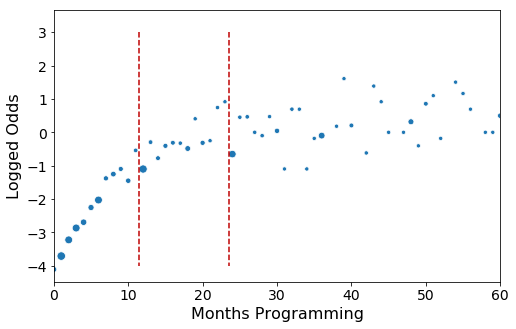

In [43]:
xvals, yodds = y_odds_at_x(before['MonthsProgramming'], before['IsSoftwareDev'])
log_yodds = np.log(yodds)

plt.figure(figsize=(8,5))

sns.scatterplot(lodds_df.index, lodds_df['log_yodds'], size=lodds_df['size'], legend=False )
# plt.plot((17.5,17.5), (0,-4), color='red')
plt.xlim(0,60)
plt.plot((11.5,11.5), (3,-4), color=(.75,0,0), linestyle='dashed')
plt.plot((23.5,23.5), (3,-4), color=(.75,0,0), linestyle='dashed')

plt.ylabel('Logged Odds', fontsize=16)
plt.yticks(fontsize=14)

plt.xlabel('Months Programming', fontsize=16)
plt.xticks(fontsize=14)

plt.show()

## Dummy Categories

### City Population

In [44]:
city_cols = [
    'CityPopulation_between 100,000 and 1 million',
    'CityPopulation_less than 100,000',
    'CityPopulation_more than 1 million' 
]

ratios = (features.df[city_cols].sum()/len(features.df)).sort_values(ascending=False)
ratios

CityPopulation_more than 1 million              0.460403
CityPopulation_between 100,000 and 1 million    0.353852
CityPopulation_less than 100,000                0.185745
dtype: float64

In [45]:
# build table of software dev proportion given feature with errors and feature frequency
means = []
errors = []
pct_utilized = []
for city_size in city_cols:
    cond = features.df[city_size]==1
    s = features.df[cond]['IsSoftwareDev']
    means += [np.mean(s)]
    ci = proportion_confint(s.sum(), len(s))
    error = (ci[1] - ci[0])/2
    errors.append(error)
    
    pct_utilized += [features.df[city_size].sum()/len(features.df)]
    
index = [i for i in city_cols]

corrections = {
    'FCC': 'FreeCodeCamp',
    'CSS': 'CSSTricks',
    'KA': 'KhanAcademy',
    'SO': 'StackOverflow',
    'MDN': 'MozillaDevNet'
}

for i, item in enumerate(index):
    if item in corrections.keys():
        index[i] = corrections[item] 
        

a = pd.DataFrame([means, errors, pct_utilized]).T
a.index = index
a.columns = ['means', 'errors', 'pct_utilized']
a = a.sort_values(by='means', ascending=True)
a = a*100
a

,means,errors,pct_utilized
"CityPopulation_less than 100,000",33.527132,4.073274,18.574514
"CityPopulation_between 100,000 and 1 million",43.641913,3.100283,35.385169
CityPopulation_more than 1 million,52.541048,2.736663,46.040317


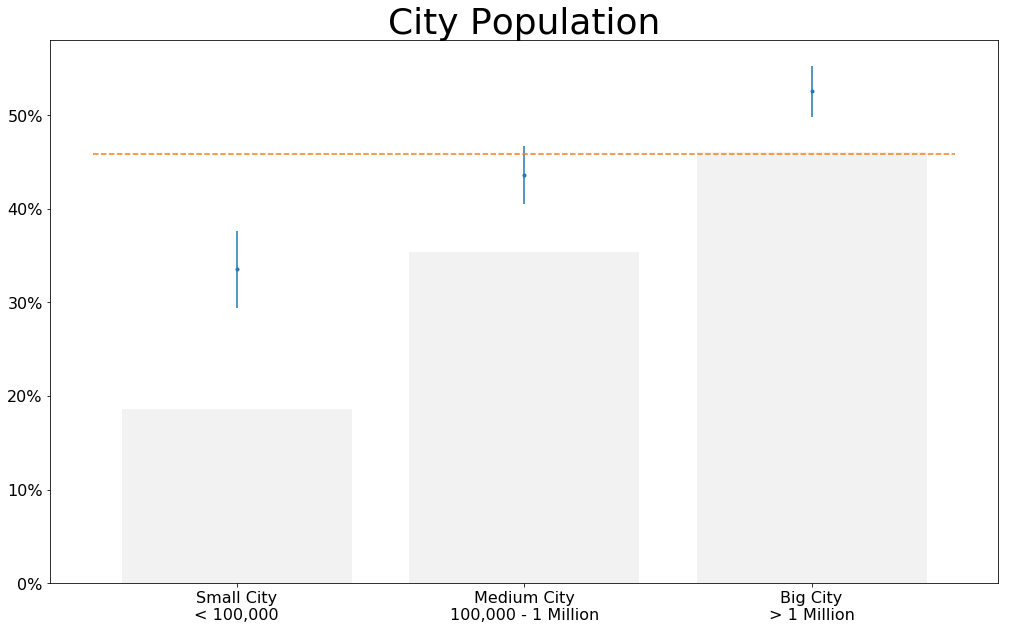

In [46]:
# use table from previous cell to build chart
plt.figure(figsize=(17,10))
plt.errorbar(x=range(len(a)), y=a['means'], yerr=a['errors'], linestyle=' ', marker='.')


xtick_labels = ['Small City\n< 100,000', 'Medium City\n100,000 - 1 Million', 'Big City\n> 1 Million']

plt.xticks(range(len(a)), xtick_labels, fontsize=16)

ytick_loc = range(0,80, 10)
ytick_labels = [str(i)+'%' for i in ytick_loc]
plt.yticks(ytick_loc, ytick_labels, fontsize=16)

ci = proportion_confint(1274, (1274+1504))
error = (ci[1] - ci[0])/2
error *= 100

plt.plot((-.5,len(a)-.5),(45.8603, 45.8603), linestyle='dashed')

plt.bar(x=range(len(a)), height=a['pct_utilized'], alpha=.1, color='grey')

plt.title('City Population', fontsize=36)



plt.show()

### Resources

In [47]:
# Resource columns
resource_cols = ['ResourceCodecademy',
 'ResourceCodeWars',
 'ResourceCoursera',
 'ResourceCSS',
 'ResourceEdX',
 'ResourceEgghead',
 'ResourceFCC',
 'ResourceHackerRank',
 'ResourceKA',
 'ResourceLynda',
 'ResourceMDN',
 'ResourceOdinProj',
 'ResourceOther',
 'ResourcePluralSight',
 'ResourceSkillcrush',
 'ResourceSO',
 'ResourceTreehouse',
 'ResourceUdacity',
 'ResourceUdemy',
 'ResourceW3S',]

In [48]:
# build table of software dev proportion given feature with errors and feature frequency

means = []
errors = []
pct_utilized = []
for resource in resource_cols:
    cond = features.df[resource]==1
    s = features.df[cond]['IsSoftwareDev']
    means += [np.mean(s)]
    ci = proportion_confint(s.sum(), len(s))
    error = (ci[1] - ci[0])/2
    errors.append(error)
    
    pct_utilized += [features.df[resource].sum()/len(features.df)]
    
index = [i[8:] for i in resource_cols]

corrections = {
    'FCC': 'FreeCodeCamp',
    'CSS': 'CSSTricks',
    'KA': 'KhanAcademy',
    'SO': 'StackOverflow',
    'MDN': 'MozillaDevNet'
}

for i, item in enumerate(index):
    if item in corrections.keys():
        index[i] = corrections[item] 
        

a = pd.DataFrame([means, errors, pct_utilized]).T
a.index = index
a.columns = ['means', 'errors', 'pct_utilized']
a = a.sort_values(by='means', ascending=False)
a = a*100
a

,means,errors,pct_utilized
Egghead,66.876972,5.181098,11.411087
PluralSight,57.003891,4.279897,18.502520
Other,56.069364,7.395569,6.227502
CSSTricks,52.330508,3.186103,33.981281
CodeWars,51.127820,4.904798,14.362851
MozillaDevNet,50.282486,2.784040,44.600432
HackerRank,49.329759,5.073699,13.426926
StackOverflow,48.287506,2.151115,74.622030
Lynda,47.306792,4.735580,15.370770
W3S,46.995192,2.398036,59.899208


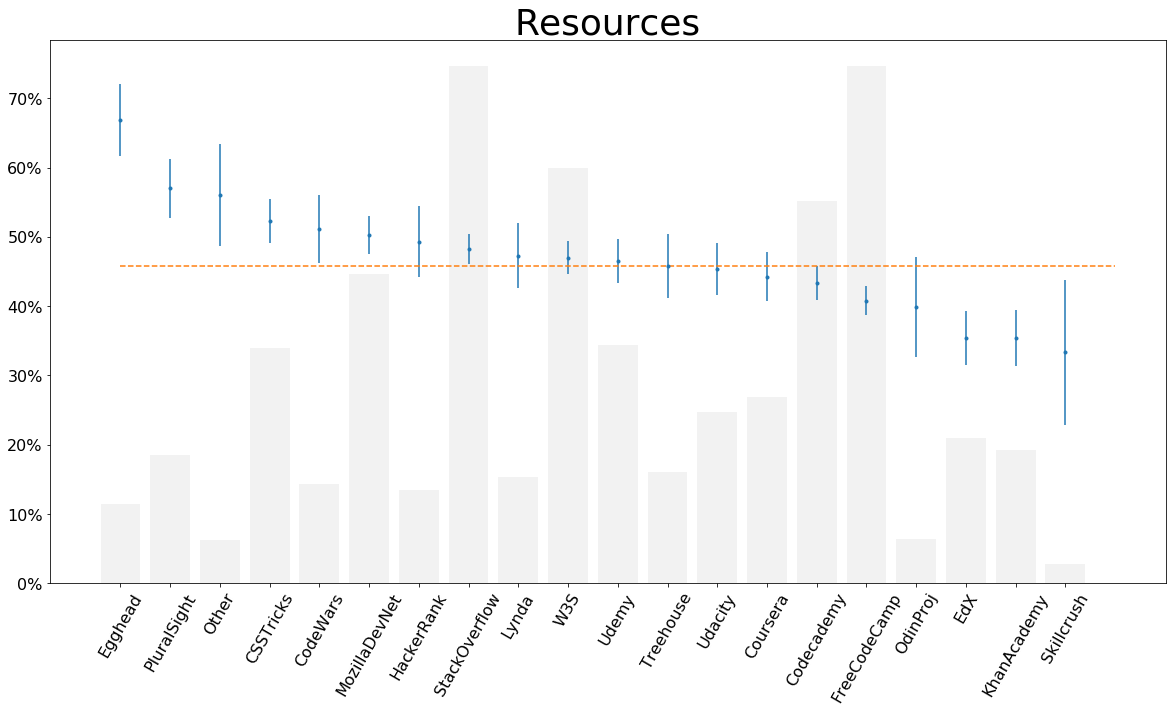

In [49]:
# use table from previous cell to build chart

plt.figure(figsize=(20,10))
plt.errorbar(x=range(len(a)), y=a['means'], yerr=a['errors'], linestyle=' ', marker='.')
plt.xticks(range(len(a)), list(a.index), rotation=60, fontsize=16)

ytick_loc = range(0,80, 10)
ytick_labels = [str(i)+'%' for i in ytick_loc]
plt.yticks(ytick_loc, ytick_labels, fontsize=16)

ci = proportion_confint(1274, (1274+1504))
error = (ci[1] - ci[0])/2
error *= 100

plt.plot((0,len(a)),(45.8603, 45.8603), linestyle='dashed')

plt.bar(x=range(len(a)), height=a['pct_utilized'], alpha=.1, color='grey')

plt.title('Resources', fontsize=36)



plt.show()

### Podcasts

In [50]:
# Podcast columns
podcast_cols = ['PodcastChangeLog',
 'PodcastCodeNewbie',
 'PodcastCodePen',
 'PodcastDevTea',
 'PodcastDotNET',
 'PodcastGiantRobots',
 'PodcastJSAir',
 'PodcastJSJabber',
 'PodcastOther',
 'PodcastProgThrowdown',
 'PodcastRubyRogues',
 'PodcastSEDaily',
 'PodcastSERadio',
 'PodcastShopTalk',
 'PodcastTalkPython',
 'PodcastTheWebAhead',]


In [51]:
# build table of software dev proportion given feature with errors and feature frequency

means = []
errors = []
pct_utilized = []
for podcast in podcast_cols:
    cond = features.df[podcast]==1
    s = features.df[cond]['IsSoftwareDev']
    means += [np.mean(s)]
    ci = proportion_confint(s.sum(), len(s))
    error = (ci[1] - ci[0])/2
    errors.append(error)
    
    pct_utilized += [features.df[podcast].sum()/len(features.df)]
    
index = [i[7:] for i in podcast_cols]

corrections = {
    'FCC': 'FreeCodeCamp',
    'CSS': 'CSSTricks',
    'KA': 'KhanAcademy',
    'SO': 'StackOverflow',
    'MDN': 'MozillaDevNet'
}

for i, item in enumerate(index):
    if item in corrections.keys():
        index[i] = corrections[item] 
        

a = pd.DataFrame([means, errors, pct_utilized]).T
a.index = index
a.columns = ['means', 'errors', 'pct_utilized']
a = a.sort_values(by='means', ascending=False)
a = a*100
a

,means,errors,pct_utilized
GiantRobots,72.413793,16.266935,1.043916
SERadio,67.142857,11.003070,2.519798
JSAir,61.666667,8.699033,4.319654
DotNET,61.538462,13.223093,1.871850
JSJabber,51.778656,6.157194,9.107271
ChangeLog,51.162791,10.564560,3.095752
TheWebAhead,50.980392,13.719854,1.835853
RubyRogues,50.000000,12.062744,2.375810
SEDaily,49.019608,7.921162,5.507559
Other,48.051948,7.890924,5.543557


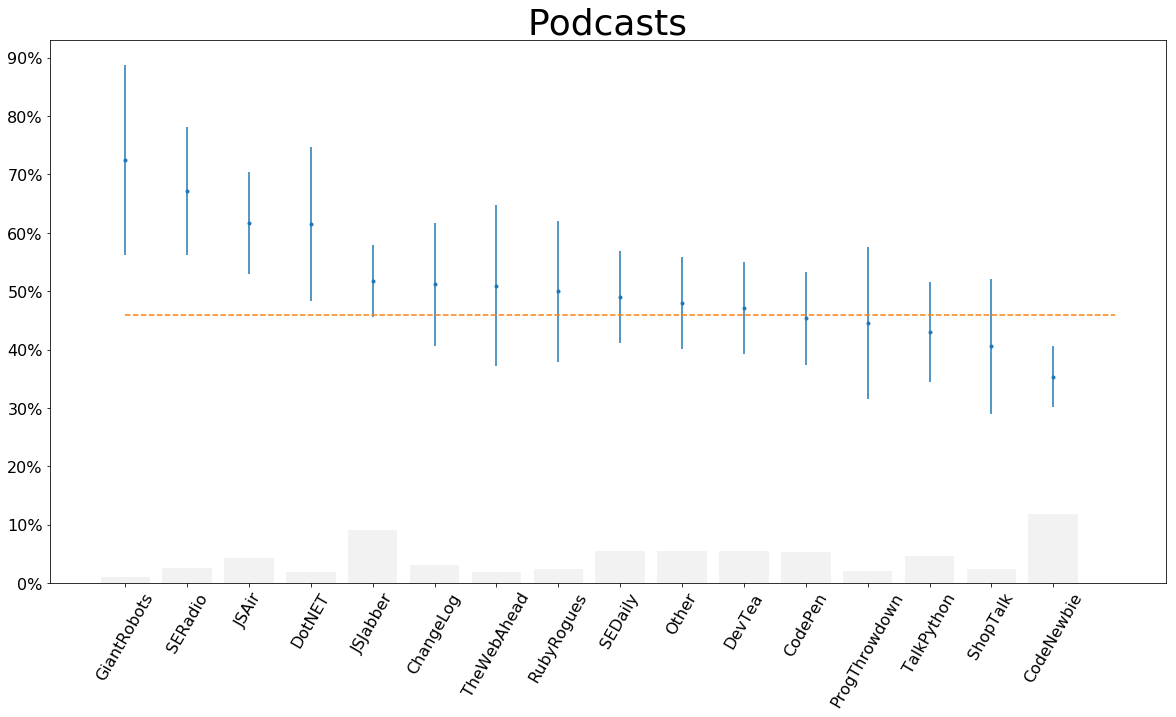

In [52]:
# use table from previous cell to build chart

plt.figure(figsize=(20,10))
plt.errorbar(x=range(len(a)), y=a['means'], yerr=a['errors'], linestyle=' ', marker='.')
plt.xticks(range(len(a)), list(a.index), rotation=60, fontsize=16)

ytick_loc = range(0,100, 10)
ytick_labels = [str(i)+'%' for i in ytick_loc]
plt.yticks(ytick_loc, ytick_labels, fontsize=16)

ci = proportion_confint(1274, (1274+1504))
error = (ci[1] - ci[0])/2
error *= 100

plt.plot((0,len(a)),(45.8603, 45.8603), linestyle='dashed')

plt.bar(x=range(len(a)), height=a['pct_utilized'], alpha=.1, color='grey')

plt.title('Podcasts', fontsize=36)

plt.show()

### CodeEvent

In [53]:
# CodeEvent columns
codeEvent_cols = ['CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops']

In [54]:
# build table of software dev proportion given feature with errors and feature frequency

means = []
errors = []
pct_utilized = []
for codeEvent in codeEvent_cols:
    cond = features.df[codeEvent]==1
    s = features.df[cond]['IsSoftwareDev']
    means += [np.mean(s)]
    ci = proportion_confint(s.sum(), len(s))
    error = (ci[1] - ci[0])/2
    errors.append(error)
    
    pct_utilized += [features.df[codeEvent].sum()/len(features.df)]
    
index = [i[9:] for i in codeEvent_cols]

corrections = {
    'FCC': 'FreeCodeCamp',
    'CSS': 'CSSTricks',
    'KA': 'KhanAcademy',
    'SO': 'StackOverflow',
    'MDN': 'MozillaDevNet'
}

for i, item in enumerate(index):
    if item in corrections.keys():
        index[i] = corrections[item] 
        

a = pd.DataFrame([means, errors, pct_utilized]).T
a.index = index
a.columns = ['means', 'errors', 'pct_utilized']
a = a.sort_values(by='means', ascending=False)
a = a*100
a

,means,errors,pct_utilized
DjangoGirls,76.923077,16.194916,0.935925
GameJam,61.702128,13.897496,1.691865
NodeSchool,60.674157,10.148316,3.203744
Conferences,59.060403,5.582901,10.727142
RailsGirls,58.620690,17.925289,1.043916
Meetup,56.727273,4.140662,19.798416
StartUpWknd,54.867257,9.175112,4.067675
GirlDev,53.947368,11.206078,2.735781
WkdBootcamps,52.427184,9.644666,3.707703
Workshops,51.694915,5.205552,12.742981


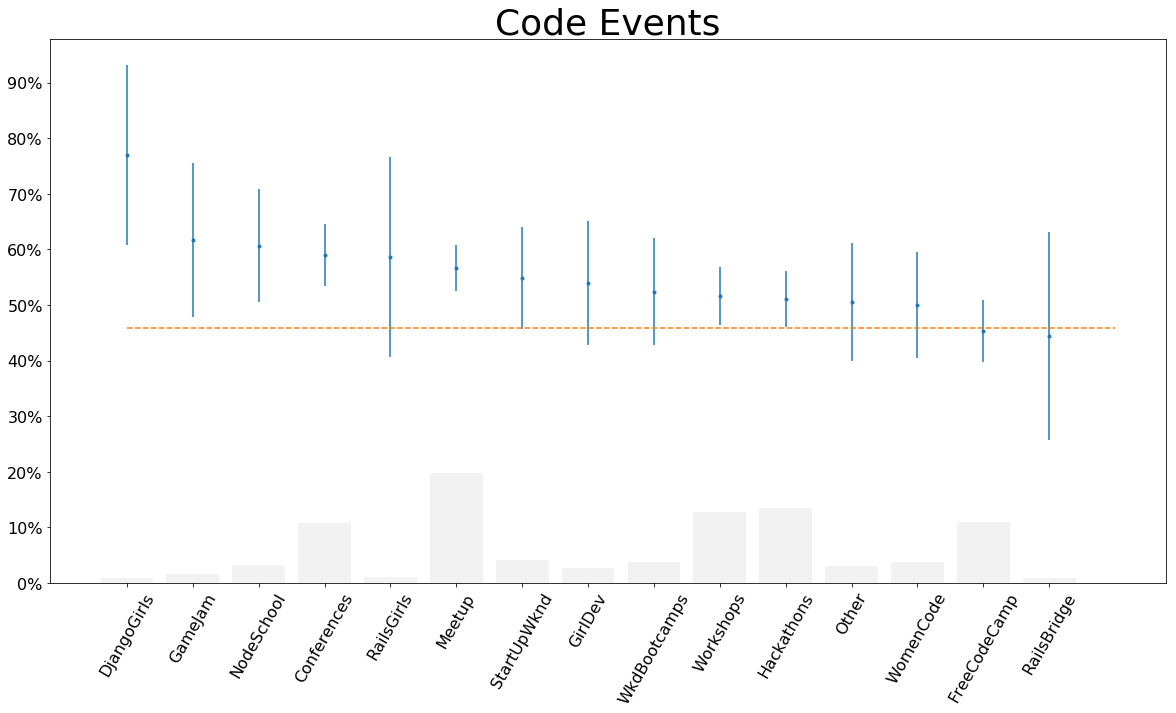

In [55]:
# use table from previous cell to build chart

plt.figure(figsize=(20,10))
plt.errorbar(x=range(len(a)), y=a['means'], yerr=a['errors'], linestyle=' ', marker='.')
plt.xticks(range(len(a)), list(a.index), rotation=60, fontsize=16)

ytick_loc = range(0,100, 10)
ytick_labels = [str(i)+'%' for i in ytick_loc]
plt.yticks(ytick_loc, ytick_labels, fontsize=16)

ci = proportion_confint(1274, (1274+1504))
error = (ci[1] - ci[0])/2
error *= 100

plt.plot((0,len(a)),(45.8603, 45.8603), linestyle='dashed')

plt.bar(x=range(len(a)), height=a['pct_utilized'], alpha=.1, color='grey')

plt.title('Code Events', fontsize=36)



plt.show()

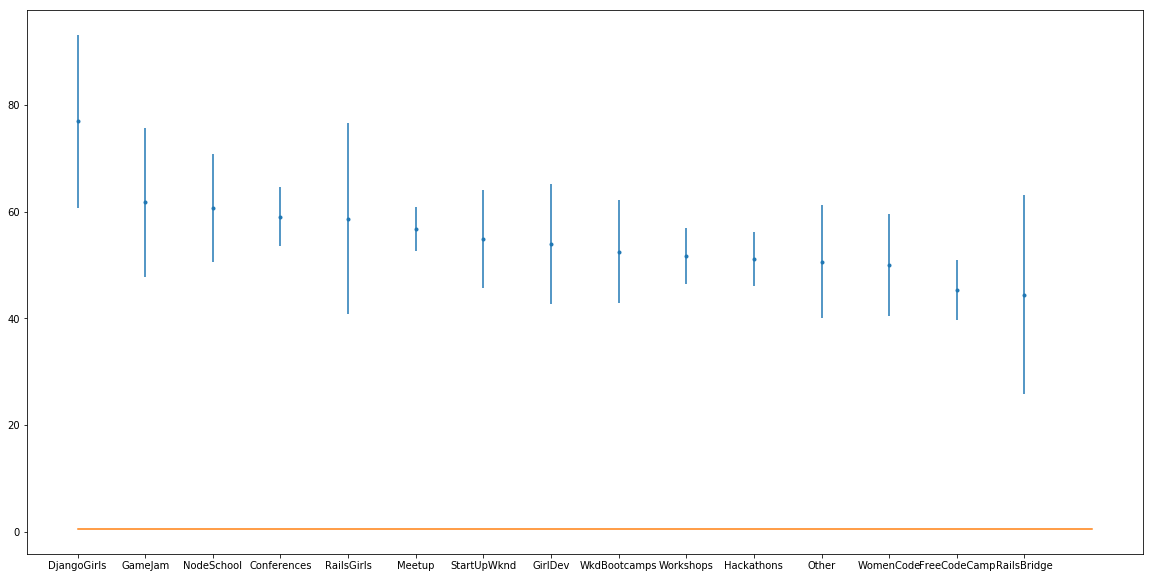

In [56]:
plt.figure(figsize=(20,10))
plt.errorbar(x=range(len(a)), y=a['means'], yerr=a['errors'], linestyle=' ', marker='.')
plt.xticks(range(len(a)), list(a.index))

plt.plot((0,len(a)),(0.458603, 0.458603))

plt.show()

### YouTube

In [57]:
# YouTube Columns
youTube_cols = ['YouTubeCodeCourse',
 'YouTubeCodingTrain',
 'YouTubeCodingTut360',
 'YouTubeComputerphile',
 'YouTubeDerekBanas',
 'YouTubeDevTips',
 'YouTubeEngineeredTruth',
 'YouTubeFCC',
 'YouTubeFunFunFunction',
 'YouTubeGoogleDev',
 'YouTubeLearnCode',
 'YouTubeLevelUpTuts',
 'YouTubeMIT',
 'YouTubeMozillaHacks',
 'YouTubeOther',
 'YouTubeSimplilearn',
 'YouTubeTheNewBoston',]


In [58]:
# build table of software dev proportion given feature with errors and feature frequency

means = []
errors = []
pct_utilized = []
for youTube in youTube_cols:
    cond = features.df[youTube]==1
    s = features.df[cond]['IsSoftwareDev']
    means += [np.mean(s)]
    ci = proportion_confint(s.sum(), len(s))
    error = (ci[1] - ci[0])/2
    errors.append(error)
    
    pct_utilized += [features.df[youTube].sum()/len(features.df)]
    
index = [i[7:] for i in youTube_cols]




for i, item in enumerate(index):
    if item in corrections.keys():
        index[i] = corrections[item] 
        

a = pd.DataFrame([means, errors, pct_utilized]).T
a.index = index
a.columns = ['means', 'errors', 'pct_utilized']
a = a.sort_values(by='means', ascending=False)
a = a*100
a

,means,errors,pct_utilized
Simplilearn,66.666667,16.083659,1.187905
MozillaHacks,58.771930,9.036019,4.103672
GoogleDev,55.214724,3.816976,23.470122
FunFunFunction,52.317881,5.633100,10.871130
CodeCourse,48.823529,7.514038,6.119510
LevelUpTuts,47.766323,5.739021,10.475162
Other,46.236559,7.165193,6.695464
DevTips,46.123260,4.356370,18.106551
LearnCode,45.434783,4.550104,16.558675
Computerphile,44.769874,6.304202,8.603312


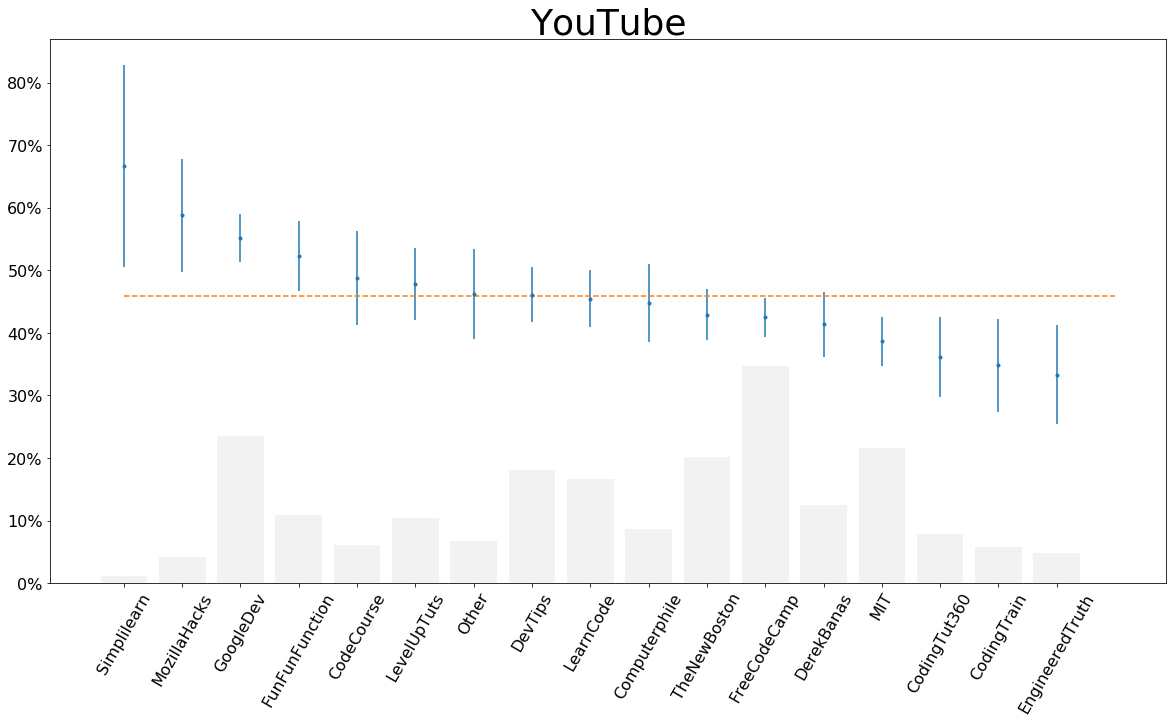

In [59]:
# use table from previous cell to build chart

plt.figure(figsize=(20,10))
plt.errorbar(x=range(len(a)), y=a['means'], yerr=a['errors'], linestyle=' ', marker='.')
plt.xticks(range(len(a)), list(a.index), rotation=60, fontsize=16)

ytick_loc = range(0,100, 10)
ytick_labels = [str(i)+'%' for i in ytick_loc]
plt.yticks(ytick_loc, ytick_labels, fontsize=16)

ci = proportion_confint(1274, (1274+1504))
error = (ci[1] - ci[0])/2
error *= 100

plt.plot((0,len(a)),(45.8603, 45.8603), linestyle='dashed')

plt.bar(x=range(len(a)), height=a['pct_utilized'], alpha=.1, color='grey')

plt.title('YouTube', fontsize=36)



plt.show()

# Models

## g

In [60]:
features.train_test_df_update()

In [61]:
# IsSoftwareDev Distribution
features.df['IsSoftwareDev'].value_counts()

0.0    1504
1.0    1274
Name: IsSoftwareDev, dtype: int64

In [62]:
# IsSoftwareDev Distribution as a %
features.df['IsSoftwareDev'].value_counts()/len(features.df)

0.0    0.541397
1.0    0.458603
Name: IsSoftwareDev, dtype: float64

In [63]:
# function copied and altered from missingno module (https://github.com/ResidentMario/missingno)
def heatmap(df, inline=False,
            filter=None, n=0, p=0, sort=None,
            figsize=(20, 12), fontsize=16, labels=True, cmap='RdBu'
            ):
    """
    Presents a `seaborn` heatmap visualization of nullity correlation in the given DataFrame.
    
    Note that this visualization has no special support for large datasets. For those, try the dendrogram instead.
    :param df: The DataFrame whose completeness is being heatmapped.
    :param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default). See
    `nullity_filter()` for more information.
    :param n: The cap on the number of columns to include in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param p: The cap on the percentage fill of the columns in the filtered DataFrame. See  `nullity_filter()` for
    more information.
    :param sort: The sort to apply to the heatmap. Should be one of "ascending", "descending", or None. See
    `nullity_sort()` for more information.
    :param figsize: The size of the figure to display. This is a `matplotlib` parameter which defaults to (20, 12).
    :param fontsize: The figure's font size.
    :param labels: Whether or not to label each matrix entry with its correlation (default is True).
    :param cmap: What `matplotlib` colormap to use. Defaults to `RdBu`.
    :param inline: Whether or not the figure is inline. If it's not then instead of getting plotted, this method will
    return its figure.
    :return: If `inline` is False, the underlying `matplotlib.figure` object. Else, nothing.
    """
    # Apply filters and sorts, set up the figure.
    df = nullity_filter(df, filter=filter, n=n, p=p)
    df = nullity_sort(df, sort=sort)

    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, 1)
    ax0 = plt.subplot(gs[0])

    # Remove completely filled or completely empty variables.
    df = df.iloc[:,[i for i, n in enumerate(np.var(df.isnull(), axis='rows')) if n > 0]]

    # Create and mask the correlation matrix. Construct the base heatmap.
    corr_mat = df.isnull().corr()
    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True

    if labels:
        sns.heatmap(corr_mat, mask=mask, cmap=cmap, ax=ax0, cbar=False,
                    annot=True, annot_kws={'size': fontsize - 2})
    else:
        sns.heatmap(corr_mat, mask=mask, cmap=cmap, ax=ax0, cbar=False)

    # Apply visual corrections and modifications.
    ax0.xaxis.tick_bottom()
    ax0.set_xticklabels(ax0.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=fontsize)
    ax0.set_yticklabels(ax0.yaxis.get_majorticklabels(), fontsize=fontsize, rotation=0)
    ax0.set_yticklabels(ax0.yaxis.get_majorticklabels(), rotation=0, fontsize=fontsize)
    ax0.xaxis.set_ticks_position('none')
    ax0.yaxis.set_ticks_position('none')
    ax0.patch.set_visible(False)

    for text in ax0.texts:
        t = float(text.get_text())
        if 0.95 <= t < 1:
            text.set_text('<1')
        elif -1 < t <= -0.95:
            text.set_text('>-1')
        elif t == 1:
            text.set_text('1')
        elif t == -1:
            text.set_text('-1')
        elif -0.1 < t < 0.1:
            text.set_text('')
        else:
            text.set_text(round(t, 2))

    if inline:
        plt.show()
    else:
        return ax0

In [64]:
def heatmap2(df, **kwargs):
    '''workaround to missingno heatmap to allow binary variables'''
    df = df.where(df>0)
    heatmap(df, **kwargs)

In [65]:
def feature_importance_df(fitted_model, cols):
    return pd.DataFrame(fitted_model.feature_importances_, index=cols).sort_values(by=0, ascending=False)

In [66]:
def display_coef(linear_model, X):
    coeffs = pd.DataFrame()
    coeffs['coeff'] = linear_model.coef_.reshape(-1)
    
    coeffs['feature'] = X.columns
    coeffs['abs_coeff'] = abs(coeffs['coeff'])
    print('Intercept: {}'.format(linear_model.intercept_))
    return coeffs.sort_values(by='abs_coeff', ascending=False)

In [67]:
# Make list of comlumns to alays exclude from these models

exclude_terms = [
    'ResourceFCC', 'Income', 'IsUnderEmployed', 'HoursLearning', 
    'MonthsProgramming', 'EmploymentField', 'CommuteTime', 'EmploymentStatus'
]
exclude = []

for col in features.df.columns:
    for term in exclude_terms:
        if term in col:
            exclude.append(col)

## Logistic Regression

### Original Features

#### Standard Hyperparameters

In [68]:
# X columns

# original numeric cols (No MonthsProgramming, HoursLearning, Income, IsUnderEmployed, ResourceFCC) 
cols = ['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampRecommend',
 'ChildrenNumber',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'FinanciallySupporting',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits',
 'MoneyForLearning',
 'PodcastChangeLog',
 'PodcastCodeNewbie',
 'PodcastCodePen',
 'PodcastDevTea',
 'PodcastDotNET',
 'PodcastGiantRobots',
 'PodcastJSAir',
 'PodcastJSJabber',
 'PodcastNone',
 'PodcastProgThrowdown',
 'PodcastRubyRogues',
 'PodcastSEDaily',
 'PodcastSERadio',
 'PodcastShopTalk',
 'PodcastTalkPython',
 'PodcastTheWebAhead',
 'ResourceCodecademy',
 'ResourceCodeWars',
 'ResourceCoursera',
 'ResourceCSS',
 'ResourceEdX',
 'ResourceEgghead',
 'ResourceHackerRank',
 'ResourceKA',
 'ResourceLynda',
 'ResourceMDN',
 'ResourceOdinProj',
 'ResourcePluralSight',
 'ResourceSkillcrush',
 'ResourceSO',
 'ResourceTreehouse',
 'ResourceUdacity',
 'ResourceUdemy',
 'ResourceW3S',
 'StudentDebtOwe',
 'YouTubeCodeCourse',
 'YouTubeCodingTrain',
 'YouTubeCodingTut360',
 'YouTubeComputerphile',
 'YouTubeDerekBanas',
 'YouTubeDevTips',
 'YouTubeEngineeredTruth',
 'YouTubeFCC',
 'YouTubeFunFunFunction',
 'YouTubeGoogleDev',
 'YouTubeLearnCode',
 'YouTubeLevelUpTuts',
 'YouTubeMIT',
 'YouTubeMozillaHacks',
 'YouTubeSimplilearn',
 'YouTubeTheNewBoston']

# original dummy columns (no EmploymentField or CommuteTime info)
cols += [
  'BootcampName_10x.org.il',
  'BootcampName_4Geeks Academy',
  'BootcampName_Academia de Código',
  'BootcampName_Academic Work Academy',
  'BootcampName_Academy Pittsburgh',
  'BootcampName_Ace Hacker Academy',
  'BootcampName_Ada',
  'BootcampName_American Graphics Institute',
  'BootcampName_AngelHack Education',
  'BootcampName_Anyone Can Learn To Code',
  'BootcampName_App Academy',
  'BootcampName_Austin Coding Academy',
  'BootcampName_Bitmaker Labs',
  'BootcampName_Bloc.io',
  'BootcampName_BoiseCodeWorks',
  'BootcampName_BrainStation',
  'BootcampName_Camp Code Away',
  'BootcampName_CareerFoundry',
  'BootcampName_Code Fellows',
  'BootcampName_Code Institute',
  'BootcampName_CodeClan',
  'BootcampName_CodeCore Bootcamp',
  'BootcampName_CodeNinja',
  'BootcampName_CodeaCamp',
  'BootcampName_Codecademy Labs',
  'BootcampName_Coder Foundry',
  "BootcampName_Coder's Lab",
  'BootcampName_Codeup',
  'BootcampName_Coding Dojo',
  'BootcampName_Coding House',
  'BootcampName_Depot/U',
  'BootcampName_Dev Academy',
  'BootcampName_Dev Bootcamp',
  'BootcampName_Dev League',
  'BootcampName_DevMountain',
  'BootcampName_Eleven Fifty Academy',
  'BootcampName_EpicU',
  'BootcampName_Epicodus',
  'BootcampName_Flatiron School',
  'BootcampName_Free Code Camp is not a bootcamp - please scroll up and change answer to "no"',
  'BootcampName_Fullstack Academy',
  'BootcampName_Gainesville Dev Academy',
  'BootcampName_Galvanize',
  'BootcampName_General Assembly',
  'BootcampName_Grace Hopper Academy',
  'BootcampName_Grand Circus',
  'BootcampName_Hack Reactor',
  'BootcampName_Hackbright Academy',
  'BootcampName_HackerYou',
  'BootcampName_Infinity Labs',
  'BootcampName_IronHack',
  'BootcampName_Israel Tech Challenge',
  'BootcampName_Jademy',
  'BootcampName_LEARN Academy',
  'BootcampName_Launch Academy',
  'BootcampName_Le Wagon',
  'BootcampName_LearningFuze',
  'BootcampName_Level',
  'BootcampName_Lighthouse Labs',
  'BootcampName_Logit Academy',
  'BootcampName_MakerSquare',
  'BootcampName_Makers Academy',
  'BootcampName_Mobile Makers Academy',
  'BootcampName_Montana Code School',
  'BootcampName_Nashville Software School',
  'BootcampName_New York Code + Design Academy',
  'BootcampName_Omaha Code School',
  'BootcampName_Operation Spark',
  'BootcampName_Orange County Code School',
  'BootcampName_Origin Code Academy',
  'BootcampName_Prime Digital Academy',
  'BootcampName_RefactorU',
  'BootcampName_Sabio.la',
  'BootcampName_Science to Data Science',
  'BootcampName_Skillcrush',
  'BootcampName_Software Guild',
  'BootcampName_Star City Code School',
  'BootcampName_Startup Institute',
  'BootcampName_Tech Talent South',
  'BootcampName_Tel Aviv',
  'BootcampName_Telegraph Academy',
  'BootcampName_The Firehose Project',
  'BootcampName_The Iron Yard',
  'BootcampName_Thinkful',
  'BootcampName_V School',
  'BootcampName_Viking Code School',
  'BootcampName_We Can Code IT',
  'BootcampName_We Got Coders',
  'BootcampName_World Tech Makers',
  'BootcampName_Wyncode',
  'BootcampName_Zip Code Wilmington',
  'BootcampName_not applicable',
  'CityPopulation_between 100,000 and 1 million',
  'CityPopulation_less than 100,000',
  'CityPopulation_more than 1 million',
  'CountryCitizen_Afghanistan',
  'CountryCitizen_Albania',
  'CountryCitizen_Algeria',
  'CountryCitizen_American Samoa',
  'CountryCitizen_Angola',
  'CountryCitizen_Argentina',
  'CountryCitizen_Armenia',
  'CountryCitizen_Australia',
  'CountryCitizen_Austria',
  'CountryCitizen_Azerbaijan',
  'CountryCitizen_Bangladesh',
  'CountryCitizen_Barbados',
  'CountryCitizen_Belarus',
  'CountryCitizen_Belgium',
  'CountryCitizen_Belize',
  'CountryCitizen_Benin',
  'CountryCitizen_Bolivia',
  'CountryCitizen_Bosnia & Herzegovina',
  'CountryCitizen_Brazil',
  'CountryCitizen_Bulgaria',
  'CountryCitizen_Cambodia',
  'CountryCitizen_Cameroon',
  'CountryCitizen_Canada',
  'CountryCitizen_Chile',
  'CountryCitizen_China',
  'CountryCitizen_Colombia',
  'CountryCitizen_Costa Rica',
  'CountryCitizen_Croatia',
  'CountryCitizen_Cuba',
  'CountryCitizen_Czech Republic',
  'CountryCitizen_Denmark',
  'CountryCitizen_Dominica',
  'CountryCitizen_Dominican Republic',
  'CountryCitizen_Ecuador',
  'CountryCitizen_Egypt',
  'CountryCitizen_El Salvador',
  'CountryCitizen_Estonia',
  'CountryCitizen_Ethiopia',
  'CountryCitizen_Finland',
  'CountryCitizen_France',
  'CountryCitizen_Georgia',
  'CountryCitizen_Germany',
  'CountryCitizen_Ghana',
  'CountryCitizen_Great Britain',
  'CountryCitizen_Greece',
  'CountryCitizen_Guatemala',
  'CountryCitizen_Guinea',
  'CountryCitizen_Guyana',
  'CountryCitizen_Hong Kong',
  'CountryCitizen_Hungary',
  'CountryCitizen_India',
  'CountryCitizen_Indonesia',
  'CountryCitizen_Iran',
  'CountryCitizen_Iraq',
  'CountryCitizen_Ireland',
  'CountryCitizen_Israel',
  'CountryCitizen_Italy',
  'CountryCitizen_Jamaica',
  'CountryCitizen_Japan',
  'CountryCitizen_Jordan',
  'CountryCitizen_Kazakhstan',
  'CountryCitizen_Kenya',
  'CountryCitizen_Korea South',
  'CountryCitizen_Kosovo',
  'CountryCitizen_Kyrgyzstan',
  'CountryCitizen_Latvia',
  'CountryCitizen_Lithuania',
  'CountryCitizen_Luxembourg',
  'CountryCitizen_Macedonia',
  'CountryCitizen_Malaysia',
  'CountryCitizen_Malta',
  'CountryCitizen_Mauritius',
  'CountryCitizen_Mexico',
  'CountryCitizen_Moldova',
  'CountryCitizen_Morocco',
  'CountryCitizen_Myanmar',
  'CountryCitizen_Nepal',
  'CountryCitizen_Netherland Antilles',
  'CountryCitizen_Netherlands (Holland, Europe)',
  'CountryCitizen_New Zealand',
  'CountryCitizen_Nicaragua',
  'CountryCitizen_Niger',
  'CountryCitizen_Nigeria',
  'CountryCitizen_Norfolk Island',
  'CountryCitizen_Norway',
  'CountryCitizen_Pakistan',
  'CountryCitizen_Palestine',
  'CountryCitizen_Panama',
  'CountryCitizen_Paraguay',
  'CountryCitizen_Peru',
  'CountryCitizen_Philippines',
  'CountryCitizen_Poland',
  'CountryCitizen_Portugal',
  'CountryCitizen_Puerto Rico',
  'CountryCitizen_Republic of Montenegro',
  'CountryCitizen_Republic of Serbia',
  'CountryCitizen_Romania',
  'CountryCitizen_Russia',
  'CountryCitizen_Saipan',
  'CountryCitizen_Saudi Arabia',
  'CountryCitizen_Senegal',
  'CountryCitizen_Serbia',
  'CountryCitizen_Singapore',
  'CountryCitizen_Slovakia',
  'CountryCitizen_Slovenia',
  'CountryCitizen_South Africa',
  'CountryCitizen_Spain',
  'CountryCitizen_Sri Lanka',
  'CountryCitizen_Swaziland',
  'CountryCitizen_Sweden',
  'CountryCitizen_Switzerland',
  'CountryCitizen_Syria',
  'CountryCitizen_Taiwan',
  'CountryCitizen_Tanzania',
  'CountryCitizen_Thailand',
  'CountryCitizen_Tunisia',
  'CountryCitizen_Turkey',
  'CountryCitizen_Uganda',
  'CountryCitizen_Ukraine',
  'CountryCitizen_United Kingdom',
  'CountryCitizen_United States of America',
  'CountryCitizen_Uruguay',
  'CountryCitizen_Uzbekistan',
  'CountryCitizen_Venezuela',
  'CountryCitizen_Vietnam',
  'CountryCitizen_Virgin Islands (USA)',
  'CountryCitizen_Yemen',
  'CountryCitizen_Zambia',
  'CountryCitizen_Zimbabwe',
  'CountryLive_Afghanistan',
  'CountryLive_Albania',
  'CountryLive_Algeria',
  'CountryLive_Angola',
  'CountryLive_Argentina',
  'CountryLive_Armenia',
  'CountryLive_Australia',
  'CountryLive_Austria',
  'CountryLive_Azerbaijan',
  'CountryLive_Bangladesh',
  'CountryLive_Barbados',
  'CountryLive_Belarus',
  'CountryLive_Belgium',
  'CountryLive_Belize',
  'CountryLive_Bolivia',
  'CountryLive_Bosnia & Herzegovina',
  'CountryLive_Brazil',
  'CountryLive_Brunei',
  'CountryLive_Bulgaria',
  'CountryLive_Cambodia',
  'CountryLive_Cameroon',
  'CountryLive_Canada',
  'CountryLive_Chile',
  'CountryLive_China',
  'CountryLive_Colombia',
  'CountryLive_Costa Rica',
  'CountryLive_Croatia',
  'CountryLive_Cuba',
  'CountryLive_Czech Republic',
  'CountryLive_Denmark',
  'CountryLive_Dominican Republic',
  'CountryLive_Ecuador',
  'CountryLive_Egypt',
  'CountryLive_El Salvador',
  'CountryLive_Estonia',
  'CountryLive_Finland',
  'CountryLive_France',
  'CountryLive_Georgia',
  'CountryLive_Germany',
  'CountryLive_Ghana',
  'CountryLive_Great Britain',
  'CountryLive_Greece',
  'CountryLive_Guatemala',
  'CountryLive_Hong Kong',
  'CountryLive_Hungary',
  'CountryLive_India',
  'CountryLive_Indonesia',
  'CountryLive_Iran',
  'CountryLive_Ireland',
  'CountryLive_Israel',
  'CountryLive_Italy',
  'CountryLive_Jamaica',
  'CountryLive_Japan',
  'CountryLive_Jordan',
  'CountryLive_Kazakhstan',
  'CountryLive_Kenya',
  'CountryLive_Korea South',
  'CountryLive_Latvia',
  'CountryLive_Lithuania',
  'CountryLive_Luxembourg',
  'CountryLive_Macedonia',
  'CountryLive_Malaysia',
  'CountryLive_Malta',
  'CountryLive_Mauritius',
  'CountryLive_Mexico',
  'CountryLive_Moldova',
  'CountryLive_Morocco',
  'CountryLive_Myanmar',
  'CountryLive_Nepal',
  'CountryLive_Netherlands (Holland, Europe)',
  'CountryLive_New Caledonia',
  'CountryLive_New Zealand',
  'CountryLive_Niger',
  'CountryLive_Nigeria',
  'CountryLive_Norway',
  'CountryLive_Pakistan',
  'CountryLive_Palestine',
  'CountryLive_Panama',
  'CountryLive_Paraguay',
  'CountryLive_Peru',
  'CountryLive_Philippines',
  'CountryLive_Poland',
  'CountryLive_Portugal',
  'CountryLive_Puerto Rico',
  'CountryLive_Republic of Montenegro',
  'CountryLive_Republic of Serbia',
  'CountryLive_Romania',
  'CountryLive_Russia',
  'CountryLive_Saudi Arabia',
  'CountryLive_Senegal',
  'CountryLive_Serbia',
  'CountryLive_Singapore',
  'CountryLive_Slovakia',
  'CountryLive_Slovenia',
  'CountryLive_South Africa',
  'CountryLive_Spain',
  'CountryLive_Sri Lanka',
  'CountryLive_Swaziland',
  'CountryLive_Sweden',
  'CountryLive_Switzerland',
  'CountryLive_Taiwan',
  'CountryLive_Tanzania',
  'CountryLive_Thailand',
  'CountryLive_Tunisia',
  'CountryLive_Turkey',
  'CountryLive_Uganda',
  'CountryLive_Ukraine',
  'CountryLive_United Arab Emirates',
  'CountryLive_United Kingdom',
  'CountryLive_United States of America',
  'CountryLive_Uruguay',
  'CountryLive_Uzbekistan',
  'CountryLive_Vanuatu',
  'CountryLive_Venezuela',
  'CountryLive_Vietnam',
  'CountryLive_Virgin Islands (USA)',
  'CountryLive_Zambia',
  'CountryLive_Zimbabwe',
  'CountryLive_not answered',
  'Gender_agender',
  'Gender_female',
  'Gender_genderqueer',
  'Gender_male',
  'Gender_trans',
  'LanguageAtHome_Afrikaans',
  'LanguageAtHome_Akan',
  'LanguageAtHome_Albanian',
  'LanguageAtHome_Amharic',
  'LanguageAtHome_Arabic',
  'LanguageAtHome_Armenian',
  'LanguageAtHome_Assamese',
  'LanguageAtHome_Azerbaijani',
  'LanguageAtHome_Belarusian',
  'LanguageAtHome_Bengali',
  'LanguageAtHome_Bhojpuri',
  'LanguageAtHome_Bosnian',
  'LanguageAtHome_Bulgarian',
  'LanguageAtHome_Burmese',
  'LanguageAtHome_Catalan',
  'LanguageAtHome_Cebuano',
  'LanguageAtHome_Chinese',
  'LanguageAtHome_Croatian',
  'LanguageAtHome_Czech',
  'LanguageAtHome_Danish',
  'LanguageAtHome_Dutch',
  'LanguageAtHome_Egyptian Arabic',
  'LanguageAtHome_English',
  'LanguageAtHome_Estonian',
  'LanguageAtHome_Ewe',
  'LanguageAtHome_Finnish',
  'LanguageAtHome_French',
  'LanguageAtHome_Fula',
  'LanguageAtHome_Georgian',
  'LanguageAtHome_German',
  'LanguageAtHome_Greek',
  'LanguageAtHome_Gujarati',
  'LanguageAtHome_Haitian Creole',
  'LanguageAtHome_Hausa',
  'LanguageAtHome_Hebrew',
  'LanguageAtHome_Hindi',
  'LanguageAtHome_Hmong',
  'LanguageAtHome_Hungarian',
  'LanguageAtHome_Igbo',
  'LanguageAtHome_Indonesian',
  'LanguageAtHome_Italian',
  'LanguageAtHome_Japanese',
  'LanguageAtHome_Javanese',
  'LanguageAtHome_Kannada',
  'LanguageAtHome_Kazakh',
  'LanguageAtHome_Khmer',
  'LanguageAtHome_Kikuyu',
  'LanguageAtHome_Konkani',
  'LanguageAtHome_Korean',
  'LanguageAtHome_Kurdish',
  'LanguageAtHome_Latvian',
  'LanguageAtHome_Lithuanian',
  'LanguageAtHome_Luganda',
  'LanguageAtHome_Luxembourgish',
  'LanguageAtHome_Macedonian',
  'LanguageAtHome_Maithili',
  'LanguageAtHome_Malay Bhasa Indonesia',
  'LanguageAtHome_Malayalam',
  'LanguageAtHome_Mandarin Chinese',
  'LanguageAtHome_Marathi',
  'LanguageAtHome_Marwari',
  'LanguageAtHome_Neapolitan',
  'LanguageAtHome_Nepali',
  'LanguageAtHome_North Frisian Nordfriisk',
  'LanguageAtHome_Norwegian',
  'LanguageAtHome_Odia (Oriya)',
  'LanguageAtHome_Oriya',
  'LanguageAtHome_Palatinate German',
  'LanguageAtHome_Pashto',
  'LanguageAtHome_Persian',
  'LanguageAtHome_Polish',
  'LanguageAtHome_Portuguese',
  'LanguageAtHome_Punjabi',
  'LanguageAtHome_Romanian',
  'LanguageAtHome_Russian',
  'LanguageAtHome_Serbian',
  'LanguageAtHome_Serbo-Croatian',
  'LanguageAtHome_Shona',
  'LanguageAtHome_Sindhi',
  'LanguageAtHome_Slovak',
  'LanguageAtHome_Slovene',
  'LanguageAtHome_Slovenian',
  'LanguageAtHome_Spanish',
  'LanguageAtHome_Swahili',
  'LanguageAtHome_Swati',
  'LanguageAtHome_Swedish',
  'LanguageAtHome_Tagalog',
  'LanguageAtHome_Tamil',
  'LanguageAtHome_Telugu',
  'LanguageAtHome_Thai',
  'LanguageAtHome_Turkish',
  'LanguageAtHome_Twi',
  'LanguageAtHome_Ukrainian',
  'LanguageAtHome_Urdu',
  'LanguageAtHome_Uzbek',
  'LanguageAtHome_Vietnamese',
  'LanguageAtHome_West Frisian',
  'LanguageAtHome_Wolof',
  'LanguageAtHome_Wu (Shanghainese) Chinese',
  'LanguageAtHome_Xhosa',
  'LanguageAtHome_Yoruba',
  'LanguageAtHome_Yue (Cantonese) Chinese',
  'LanguageAtHome_Zulu',
  'LanguageAtHome_not answered',
  'MaritalStatus_divorced',
  'MaritalStatus_married or domestic partnership',
  'MaritalStatus_not answered',
  'MaritalStatus_separated',
  'MaritalStatus_single, never married',
  'MaritalStatus_widowed',
  'SchoolDegree_Ph.D.',
  "SchoolDegree_associate's degree",
  "SchoolDegree_bachelor's degree",
  'SchoolDegree_high school diploma or equivalent (GED)',
  "SchoolDegree_master's degree (non-professional)",
  'SchoolDegree_no high school (secondary school)',
  'SchoolDegree_professional degree (MBA, MD, JD, etc.)',
  'SchoolDegree_some college credit, no degree',
  'SchoolDegree_some high school',
  'SchoolDegree_trade, technical, or vocational training',
  'SchoolMajor_Accounting',
  'SchoolMajor_Accounting Technician and Bookkeeping',
  'SchoolMajor_Acting',
  'SchoolMajor_Actuarial Science',
  'SchoolMajor_Administrative Assistant',
  'SchoolMajor_Adult and Continuing Education',
  'SchoolMajor_Advanced Dentistry and Oral Sciences',
  'SchoolMajor_Advertising',
  'SchoolMajor_Advertising and Marketing',
  'SchoolMajor_Aeronautics and Aviation Technology',
  'SchoolMajor_Aerospace and Aeronautical Engineering',
  'SchoolMajor_Agricultural Business and Technology',
  'SchoolMajor_Agricultural Economics',
  'SchoolMajor_Agricultural Engineering',
  'SchoolMajor_Agricultural Mechanics and Machinery',
  'SchoolMajor_Agricultural and Food Products Processing',
  'SchoolMajor_Air Traffic Control',
  'SchoolMajor_Anatomy',
  'SchoolMajor_Animation',
  'SchoolMajor_Animation, Video Graphics and Special Effects',
  'SchoolMajor_Anthropology',
  'SchoolMajor_Anthropology and Archaeology',
  'SchoolMajor_Aquaculture',
  'SchoolMajor_Arabic Language and Literature',
  'SchoolMajor_Archaeology',
  'SchoolMajor_Architectural Drafting (CAD/CADD)',
  'SchoolMajor_Architectural Engineering',
  'SchoolMajor_Architectural Engineering Technician',
  'SchoolMajor_Architectural Sciences and Technology',
  'SchoolMajor_Architecture',
  'SchoolMajor_Art History',
  'SchoolMajor_Art Studies',
  'SchoolMajor_Artificial Intelligence',
  'SchoolMajor_Asian Studies',
  'SchoolMajor_Astronomy',
  'SchoolMajor_Astrophysics',
  'SchoolMajor_Audio and Video Production',
  'SchoolMajor_Audiology',
  'SchoolMajor_Auto Mechanic',
  'SchoolMajor_Automotive Engineering',
  'SchoolMajor_Automotive Engineering Technician',
  'SchoolMajor_Banking and Finance',
  'SchoolMajor_Biblical Studies',
  'SchoolMajor_Biochemistry',
  'SchoolMajor_Biochemistry and Molecular Biology',
  'SchoolMajor_Bioengineering and Biomedical Engineering',
  'SchoolMajor_Bioinformatics',
  'SchoolMajor_Biology',
  'SchoolMajor_Biology and Biological Sciences',
  'SchoolMajor_Biomedical Engineering',
  'SchoolMajor_Biomedical Science',
  'SchoolMajor_Biomedical Sciences and Molecular Medicine',
  'SchoolMajor_Biotechnology',
  'SchoolMajor_Building Construction Technology',
  'SchoolMajor_Business Administration',
  'SchoolMajor_Business Administration and Management',
  'SchoolMajor_Cellular Biology',
  'SchoolMajor_Chemical Engineering',
  'SchoolMajor_Chemistry',
  'SchoolMajor_Child Development',
  'SchoolMajor_Chinese Language and Literature',
  'SchoolMajor_Chiropractic',
  'SchoolMajor_Cinematography And Film',
  'SchoolMajor_Civil Engineering',
  'SchoolMajor_Classics',
  'SchoolMajor_Climatology',
  'SchoolMajor_Clinical Psychology',
  'SchoolMajor_Commercial and Advertising Art',
  'SchoolMajor_Communication and Media Studies',
  'SchoolMajor_Communications',
  'SchoolMajor_Comparative Literature',
  'SchoolMajor_Computational and Applied Mathematics',
  'SchoolMajor_Computer Aided Design (CAD)',
  'SchoolMajor_Computer Engineering Technician',
  'SchoolMajor_Computer Graphics',
  'SchoolMajor_Computer Hardware Engineering',
  'SchoolMajor_Computer Networking',
  'SchoolMajor_Computer Programming',
  'SchoolMajor_Computer Science',
  'SchoolMajor_Computer Software Engineering',
  'SchoolMajor_Computer Systems Analysis',
  'SchoolMajor_Computer Systems Networking and Telecommunications',
  'SchoolMajor_Computer Systems Technician',
  'SchoolMajor_Computer and Information Studies',
  'SchoolMajor_Computer and Information Systems Security',
  'SchoolMajor_Crafts and Artisanry',
  'SchoolMajor_Creative Writing',
  'SchoolMajor_Criminal Justice',
  'SchoolMajor_Design and Visual Communications',
  'SchoolMajor_Developmental and Child Psychology',
  'SchoolMajor_Divinity, Ministry, and Pre-Theology',
  'SchoolMajor_East Asian Languages and Literatures',
  'SchoolMajor_Ecology and Evolutionary Biology',
  'SchoolMajor_Economic Development',
  'SchoolMajor_Economics',
  'SchoolMajor_Economics and Econometrics',
  'SchoolMajor_Education',
  'SchoolMajor_Education of Individuals with Impairments and Disabilities',
  'SchoolMajor_Educational Media Design',
  'SchoolMajor_Electrical Engineering',
  'SchoolMajor_Electrical Engineering Technician',
  'SchoolMajor_Electrical and Electronics Engineering',
  'SchoolMajor_Electrical and Power Transmission Installation',
  'SchoolMajor_Engineering',
  'SchoolMajor_Engineering Design',
  'SchoolMajor_Engineering Management',
  'SchoolMajor_Engineering Mechanics',
  'SchoolMajor_Engineering Physics',
  'SchoolMajor_Engineering Science',
  'SchoolMajor_English',
  'SchoolMajor_English Language Studies',
  'SchoolMajor_Entrepreneurship',
  'SchoolMajor_Environmental Architecture and Design',
  'SchoolMajor_Environmental Engineering',
  'SchoolMajor_Environmental Science',
  'SchoolMajor_Environmental Studies',
  'SchoolMajor_Environmental and Marine Sciences',
  'SchoolMajor_European and Russian Studies',
  'SchoolMajor_Fashion and Apparel Design',
  'SchoolMajor_Film and Video Studies',
  'SchoolMajor_Finance',
  'SchoolMajor_Financial Planning',
  'SchoolMajor_Food Science',
  'SchoolMajor_Foods, Nutrition, and Wellness Studies',
  'SchoolMajor_Foreign Language Teacher  Education',
  'SchoolMajor_Foreign Languages and Literatures',
  'SchoolMajor_French Language and Literature',
  'SchoolMajor_Game Design',
  'SchoolMajor_Game and Interactive Media Design',
  'SchoolMajor_General Construction Trades',
  'SchoolMajor_General Studies',
  'SchoolMajor_Genetics',
  'SchoolMajor_Geography',
  'SchoolMajor_Geology',
  'SchoolMajor_Geology and Earth Science',
  'SchoolMajor_German Language and Literature',
  'SchoolMajor_Graphic Communication and Printing',
  'SchoolMajor_Graphic Design',
  'SchoolMajor_Health Informatics',
  'SchoolMajor_Healthcare Administration',
  'SchoolMajor_History',
  'SchoolMajor_History Teacher Education',
  'SchoolMajor_Hotel and Hospitality Management',
  'SchoolMajor_Human Resources Development',
  'SchoolMajor_Human Resources Management',
  'SchoolMajor_IT Services Administration',
  'SchoolMajor_Illustration',
  'SchoolMajor_Industrial Design',
  'SchoolMajor_Industrial Engineering',
  'SchoolMajor_Industrial and Engineering Management',
  'SchoolMajor_Industrial and Organizational Psychology',
  'SchoolMajor_Industrial and Product Design',
  'SchoolMajor_Information Operations',
  'SchoolMajor_Information Systems',
  'SchoolMajor_Information Technology',
  'SchoolMajor_Instrumentation Technician',
  'SchoolMajor_Intellectual Property Law',
  'SchoolMajor_Intelligence',
  'SchoolMajor_Interior Design',
  'SchoolMajor_International Business',
  'SchoolMajor_International Relations',
  'SchoolMajor_International Relations and National Security Studies',
  'SchoolMajor_Islam',
  'SchoolMajor_Japanese Language and Literature',
  'SchoolMajor_Journalism',
  'SchoolMajor_Kinesiology and Exercise Science',
  'SchoolMajor_Landscape Architecture',
  'SchoolMajor_Latin and Ancient Greek Studies',
  'SchoolMajor_Law',
  'SchoolMajor_Law Studies',
  'SchoolMajor_Liberal Arts',
  'SchoolMajor_Liberal Arts and Humanities',
  'SchoolMajor_Library Science and Administration',
  'SchoolMajor_Library and Archives Assisting',
  'SchoolMajor_Linguistics',
  'SchoolMajor_Linguistics, Interpretation, and Translation',
  'SchoolMajor_Literature',
  'SchoolMajor_Logistics and Supply Chain Management',
  'SchoolMajor_Management Information Systems',
  'SchoolMajor_Management Sciences and Statistics',
  'SchoolMajor_Managerial Economics',
  'SchoolMajor_Marine Biology',
  'SchoolMajor_Marine Biology and Oceanography',
  'SchoolMajor_Marine Science',
  'SchoolMajor_Marketing',
  'SchoolMajor_Mass Communication',
  'SchoolMajor_Math',
  'SchoolMajor_Mathematics',
  'SchoolMajor_Mathematics Teacher Education',
  'SchoolMajor_Mechanical Drafting (CAD/CADD)',
  'SchoolMajor_Mechanical Engineering',
  'SchoolMajor_Mechanical Engineering Technician',
  'SchoolMajor_Medical Laboratory Technician',
  'SchoolMajor_Medicine',
  'SchoolMajor_Mental Health Counseling',
  'SchoolMajor_Meteorology',
  'SchoolMajor_Microbiology',
  'SchoolMajor_Molecular Biology',
  'SchoolMajor_Multimedia',
  'SchoolMajor_Music',
  'SchoolMajor_Music History and Literature',
  'SchoolMajor_Music Performance',
  'SchoolMajor_Music Teacher Education',
  'SchoolMajor_Music Technology',
  'SchoolMajor_Music Theory and Composition',
  'SchoolMajor_Nail Technician',
  'SchoolMajor_Natural Resources Conservation',
  'SchoolMajor_Network, Database, and System Administration',
  'SchoolMajor_Neuroscience',
  'SchoolMajor_Nuclear Engineering',
  'SchoolMajor_Nursing',
  'SchoolMajor_Nutrition',
  'SchoolMajor_Operations Management',
  'SchoolMajor_Organizational Communication',
  'SchoolMajor_Painting',
  'SchoolMajor_Paralegal',
  'SchoolMajor_Parks, Recreation and Leisure Facilities Management',
  'SchoolMajor_Petroleum Engineering',
  'SchoolMajor_Pharmaceutical Sciences',
  'SchoolMajor_Pharmacology',
  'SchoolMajor_Pharmacy',
  'SchoolMajor_Philosophy',
  'SchoolMajor_Photography',
  'SchoolMajor_Physics',
  'SchoolMajor_Physiology',
  'SchoolMajor_Political Science',
  'SchoolMajor_Political Science and Government',
  'SchoolMajor_Pre-Medicine Studies',
  'SchoolMajor_Psychology',
  'SchoolMajor_Public Administration',
  'SchoolMajor_Public Health',
  'SchoolMajor_Quality Control Technician',
  'SchoolMajor_Radiologic Technician',
  'SchoolMajor_Religious Studies',
  'SchoolMajor_Research and Experimental Psychology',
  'SchoolMajor_Retailing Management',
  'SchoolMajor_Robotics and Automation Engineering',
  'SchoolMajor_Russian and Eastern European Languages and Literature',
  'SchoolMajor_Sculpture',
  'SchoolMajor_Security and Loss Prevention Services',
  'SchoolMajor_Sheet Metal Technology',
  'SchoolMajor_Social Psychology',
  'SchoolMajor_Social Science Research Methods',
  'SchoolMajor_Social Studies Teacher Education',
  'SchoolMajor_Social Work',
  'SchoolMajor_Sociology',
  'SchoolMajor_Software Engineering',
  'SchoolMajor_Space and Undersea Systems Operations',
  'SchoolMajor_Spanish Language and Literature',
  'SchoolMajor_Special Education and Teaching',
  'SchoolMajor_Speech Communication and Rhetoric',
  'SchoolMajor_Sport and Fitness Management',
  'SchoolMajor_Statistics',
  'SchoolMajor_Structural Engineering',
  'SchoolMajor_Studio Arts',
  'SchoolMajor_Sustainability Studies',
  'SchoolMajor_System, Networking, and LAN/WAN Management',
  'SchoolMajor_Systems Engineering',
  'SchoolMajor_Talmudic and Rabbinical Studies',
  'SchoolMajor_Teacher Education for Multiple Levels',
  'SchoolMajor_Teaching English as a Second Language',
  'SchoolMajor_Technical Teacher Education',
  'SchoolMajor_Telecommunications Technician',
  'SchoolMajor_Theatre Design',
  'SchoolMajor_Theatre, Arts, and Media Management',
  'SchoolMajor_Theology',
  'SchoolMajor_Tourism and Travel Services Management',
  'SchoolMajor_Truck,  Bus, and Commercial Vehicle Operation',
  'SchoolMajor_Urban Planning',
  'SchoolMajor_Urban Studies and Affairs',
  'SchoolMajor_Visual Arts',
  'SchoolMajor_Web Design',
  "SchoolMajor_Women's Studies",
  'SchoolMajor_Zoology',
  'SchoolMajor_not answered']

In [69]:
# split, fit, & score


X_train, y_train = features.train_df[cols], features.train_df['IsSoftwareDev']
X_test, y_test = features.test_df[cols], features.test_df['IsSoftwareDev']

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=3)

lr = LogisticRegression()
lr.fit(X_train,y_train)
print('training score: ',lr.score(X_train, y_train))
print('testing score: ', lr.score(X_test, y_test))
cv = cross_val_score(lr, X_train, y_train, cv=10)
ci = DescrStatsW(cv).tconfint_mean()
print('cross val score: ', cv.mean(), ' +/-', (ci[1]-ci[0])/2)



training score:  0.7183301343570058
testing score:  0.7089337175792507
cross val score:  0.6943802907618697  +/- 0.018865525395699523


In [70]:
display_coef(lr, X_train)

Intercept: [0.09172135]


,coeff,feature,abs_coeff
2,0.466251,BootcampFinish,0.466251
1,0.420692,AttendedBootcamp,0.420692
4,0.398387,BootcampRecommend,0.398387
417,-0.363214,CountryLive_United States of America,0.363214
826,-0.352845,SchoolMajor_not answered,0.352845
544,0.343570,SchoolDegree_bachelor's degree,0.343570
454,-0.330674,LanguageAtHome_English,0.330674
299,-0.321385,CountryCitizen_United States of America,0.321385
175,-0.320300,BootcampName_not applicable,0.320300
56,-0.311556,ResourceKA,0.311556


#### Ridge

In [71]:
# X columns

# original numeric cols (No MonthsProgramming, HoursLearning, Income, IsUnderEmployed) 
cols = ['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampRecommend',
 'ChildrenNumber',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'FinanciallySupporting',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits',
 'MoneyForLearning',
 'PodcastChangeLog',
 'PodcastCodeNewbie',
 'PodcastCodePen',
 'PodcastDevTea',
 'PodcastDotNET',
 'PodcastGiantRobots',
 'PodcastJSAir',
 'PodcastJSJabber',
 'PodcastNone',
 'PodcastProgThrowdown',
 'PodcastRubyRogues',
 'PodcastSEDaily',
 'PodcastSERadio',
 'PodcastShopTalk',
 'PodcastTalkPython',
 'PodcastTheWebAhead',
 'ResourceCodecademy',
 'ResourceCodeWars',
 'ResourceCoursera',
 'ResourceCSS',
 'ResourceEdX',
 'ResourceEgghead',
 'ResourceFCC',
 'ResourceHackerRank',
 'ResourceKA',
 'ResourceLynda',
 'ResourceMDN',
 'ResourceOdinProj',
 'ResourcePluralSight',
 'ResourceSkillcrush',
 'ResourceSO',
 'ResourceTreehouse',
 'ResourceUdacity',
 'ResourceUdemy',
 'ResourceW3S',
 'StudentDebtOwe',
 'YouTubeCodeCourse',
 'YouTubeCodingTrain',
 'YouTubeCodingTut360',
 'YouTubeComputerphile',
 'YouTubeDerekBanas',
 'YouTubeDevTips',
 'YouTubeEngineeredTruth',
 'YouTubeFCC',
 'YouTubeFunFunFunction',
 'YouTubeGoogleDev',
 'YouTubeLearnCode',
 'YouTubeLevelUpTuts',
 'YouTubeMIT',
 'YouTubeMozillaHacks',
 'YouTubeSimplilearn',
 'YouTubeTheNewBoston']

# original dummy columns (no EmploymentField or CommuteTime info)
cols += ['BootcampName_10x.org.il',
  'BootcampName_4Geeks Academy',
  'BootcampName_Academia de Código',
  'BootcampName_Academic Work Academy',
  'BootcampName_Academy Pittsburgh',
  'BootcampName_Ace Hacker Academy',
  'BootcampName_Ada',
  'BootcampName_American Graphics Institute',
  'BootcampName_AngelHack Education',
  'BootcampName_Anyone Can Learn To Code',
  'BootcampName_App Academy',
  'BootcampName_Austin Coding Academy',
  'BootcampName_Bitmaker Labs',
  'BootcampName_Bloc.io',
  'BootcampName_BoiseCodeWorks',
  'BootcampName_BrainStation',
  'BootcampName_Camp Code Away',
  'BootcampName_CareerFoundry',
  'BootcampName_Code Fellows',
  'BootcampName_Code Institute',
  'BootcampName_CodeClan',
  'BootcampName_CodeCore Bootcamp',
  'BootcampName_CodeNinja',
  'BootcampName_CodeaCamp',
  'BootcampName_Codecademy Labs',
  'BootcampName_Coder Foundry',
  "BootcampName_Coder's Lab",
  'BootcampName_Codeup',
  'BootcampName_Coding Dojo',
  'BootcampName_Coding House',
  'BootcampName_Depot/U',
  'BootcampName_Dev Academy',
  'BootcampName_Dev Bootcamp',
  'BootcampName_Dev League',
  'BootcampName_DevMountain',
  'BootcampName_Eleven Fifty Academy',
  'BootcampName_EpicU',
  'BootcampName_Epicodus',
  'BootcampName_Flatiron School',
  'BootcampName_Free Code Camp is not a bootcamp - please scroll up and change answer to "no"',
  'BootcampName_Fullstack Academy',
  'BootcampName_Gainesville Dev Academy',
  'BootcampName_Galvanize',
  'BootcampName_General Assembly',
  'BootcampName_Grace Hopper Academy',
  'BootcampName_Grand Circus',
  'BootcampName_Hack Reactor',
  'BootcampName_Hackbright Academy',
  'BootcampName_HackerYou',
  'BootcampName_Infinity Labs',
  'BootcampName_IronHack',
  'BootcampName_Israel Tech Challenge',
  'BootcampName_Jademy',
  'BootcampName_LEARN Academy',
  'BootcampName_Launch Academy',
  'BootcampName_Le Wagon',
  'BootcampName_LearningFuze',
  'BootcampName_Level',
  'BootcampName_Lighthouse Labs',
  'BootcampName_Logit Academy',
  'BootcampName_MakerSquare',
  'BootcampName_Makers Academy',
  'BootcampName_Mobile Makers Academy',
  'BootcampName_Montana Code School',
  'BootcampName_Nashville Software School',
  'BootcampName_New York Code + Design Academy',
  'BootcampName_Omaha Code School',
  'BootcampName_Operation Spark',
  'BootcampName_Orange County Code School',
  'BootcampName_Origin Code Academy',
  'BootcampName_Prime Digital Academy',
  'BootcampName_RefactorU',
  'BootcampName_Sabio.la',
  'BootcampName_Science to Data Science',
  'BootcampName_Skillcrush',
  'BootcampName_Software Guild',
  'BootcampName_Star City Code School',
  'BootcampName_Startup Institute',
  'BootcampName_Tech Talent South',
  'BootcampName_Tel Aviv',
  'BootcampName_Telegraph Academy',
  'BootcampName_The Firehose Project',
  'BootcampName_The Iron Yard',
  'BootcampName_Thinkful',
  'BootcampName_V School',
  'BootcampName_Viking Code School',
  'BootcampName_We Can Code IT',
  'BootcampName_We Got Coders',
  'BootcampName_World Tech Makers',
  'BootcampName_Wyncode',
  'BootcampName_Zip Code Wilmington',
  'BootcampName_not applicable',
  'CityPopulation_between 100,000 and 1 million',
  'CityPopulation_less than 100,000',
  'CityPopulation_more than 1 million',
  'CountryCitizen_Afghanistan',
  'CountryCitizen_Albania',
  'CountryCitizen_Algeria',
  'CountryCitizen_American Samoa',
  'CountryCitizen_Angola',
  'CountryCitizen_Argentina',
  'CountryCitizen_Armenia',
  'CountryCitizen_Australia',
  'CountryCitizen_Austria',
  'CountryCitizen_Azerbaijan',
  'CountryCitizen_Bangladesh',
  'CountryCitizen_Barbados',
  'CountryCitizen_Belarus',
  'CountryCitizen_Belgium',
  'CountryCitizen_Belize',
  'CountryCitizen_Benin',
  'CountryCitizen_Bolivia',
  'CountryCitizen_Bosnia & Herzegovina',
  'CountryCitizen_Brazil',
  'CountryCitizen_Bulgaria',
  'CountryCitizen_Cambodia',
  'CountryCitizen_Cameroon',
  'CountryCitizen_Canada',
  'CountryCitizen_Chile',
  'CountryCitizen_China',
  'CountryCitizen_Colombia',
  'CountryCitizen_Costa Rica',
  'CountryCitizen_Croatia',
  'CountryCitizen_Cuba',
  'CountryCitizen_Czech Republic',
  'CountryCitizen_Denmark',
  'CountryCitizen_Dominica',
  'CountryCitizen_Dominican Republic',
  'CountryCitizen_Ecuador',
  'CountryCitizen_Egypt',
  'CountryCitizen_El Salvador',
  'CountryCitizen_Estonia',
  'CountryCitizen_Ethiopia',
  'CountryCitizen_Finland',
  'CountryCitizen_France',
  'CountryCitizen_Georgia',
  'CountryCitizen_Germany',
  'CountryCitizen_Ghana',
  'CountryCitizen_Great Britain',
  'CountryCitizen_Greece',
  'CountryCitizen_Guatemala',
  'CountryCitizen_Guinea',
  'CountryCitizen_Guyana',
  'CountryCitizen_Hong Kong',
  'CountryCitizen_Hungary',
  'CountryCitizen_India',
  'CountryCitizen_Indonesia',
  'CountryCitizen_Iran',
  'CountryCitizen_Iraq',
  'CountryCitizen_Ireland',
  'CountryCitizen_Israel',
  'CountryCitizen_Italy',
  'CountryCitizen_Jamaica',
  'CountryCitizen_Japan',
  'CountryCitizen_Jordan',
  'CountryCitizen_Kazakhstan',
  'CountryCitizen_Kenya',
  'CountryCitizen_Korea South',
  'CountryCitizen_Kosovo',
  'CountryCitizen_Kyrgyzstan',
  'CountryCitizen_Latvia',
  'CountryCitizen_Lithuania',
  'CountryCitizen_Luxembourg',
  'CountryCitizen_Macedonia',
  'CountryCitizen_Malaysia',
  'CountryCitizen_Malta',
  'CountryCitizen_Mauritius',
  'CountryCitizen_Mexico',
  'CountryCitizen_Moldova',
  'CountryCitizen_Morocco',
  'CountryCitizen_Myanmar',
  'CountryCitizen_Nepal',
  'CountryCitizen_Netherland Antilles',
  'CountryCitizen_Netherlands (Holland, Europe)',
  'CountryCitizen_New Zealand',
  'CountryCitizen_Nicaragua',
  'CountryCitizen_Niger',
  'CountryCitizen_Nigeria',
  'CountryCitizen_Norfolk Island',
  'CountryCitizen_Norway',
  'CountryCitizen_Pakistan',
  'CountryCitizen_Palestine',
  'CountryCitizen_Panama',
  'CountryCitizen_Paraguay',
  'CountryCitizen_Peru',
  'CountryCitizen_Philippines',
  'CountryCitizen_Poland',
  'CountryCitizen_Portugal',
  'CountryCitizen_Puerto Rico',
  'CountryCitizen_Republic of Montenegro',
  'CountryCitizen_Republic of Serbia',
  'CountryCitizen_Romania',
  'CountryCitizen_Russia',
  'CountryCitizen_Saipan',
  'CountryCitizen_Saudi Arabia',
  'CountryCitizen_Senegal',
  'CountryCitizen_Serbia',
  'CountryCitizen_Singapore',
  'CountryCitizen_Slovakia',
  'CountryCitizen_Slovenia',
  'CountryCitizen_South Africa',
  'CountryCitizen_Spain',
  'CountryCitizen_Sri Lanka',
  'CountryCitizen_Swaziland',
  'CountryCitizen_Sweden',
  'CountryCitizen_Switzerland',
  'CountryCitizen_Syria',
  'CountryCitizen_Taiwan',
  'CountryCitizen_Tanzania',
  'CountryCitizen_Thailand',
  'CountryCitizen_Tunisia',
  'CountryCitizen_Turkey',
  'CountryCitizen_Uganda',
  'CountryCitizen_Ukraine',
  'CountryCitizen_United Kingdom',
  'CountryCitizen_United States of America',
  'CountryCitizen_Uruguay',
  'CountryCitizen_Uzbekistan',
  'CountryCitizen_Venezuela',
  'CountryCitizen_Vietnam',
  'CountryCitizen_Virgin Islands (USA)',
  'CountryCitizen_Yemen',
  'CountryCitizen_Zambia',
  'CountryCitizen_Zimbabwe',
  'CountryLive_Afghanistan',
  'CountryLive_Albania',
  'CountryLive_Algeria',
  'CountryLive_Angola',
  'CountryLive_Argentina',
  'CountryLive_Armenia',
  'CountryLive_Australia',
  'CountryLive_Austria',
  'CountryLive_Azerbaijan',
  'CountryLive_Bangladesh',
  'CountryLive_Barbados',
  'CountryLive_Belarus',
  'CountryLive_Belgium',
  'CountryLive_Belize',
  'CountryLive_Bolivia',
  'CountryLive_Bosnia & Herzegovina',
  'CountryLive_Brazil',
  'CountryLive_Brunei',
  'CountryLive_Bulgaria',
  'CountryLive_Cambodia',
  'CountryLive_Cameroon',
  'CountryLive_Canada',
  'CountryLive_Chile',
  'CountryLive_China',
  'CountryLive_Colombia',
  'CountryLive_Costa Rica',
  'CountryLive_Croatia',
  'CountryLive_Cuba',
  'CountryLive_Czech Republic',
  'CountryLive_Denmark',
  'CountryLive_Dominican Republic',
  'CountryLive_Ecuador',
  'CountryLive_Egypt',
  'CountryLive_El Salvador',
  'CountryLive_Estonia',
  'CountryLive_Finland',
  'CountryLive_France',
  'CountryLive_Georgia',
  'CountryLive_Germany',
  'CountryLive_Ghana',
  'CountryLive_Great Britain',
  'CountryLive_Greece',
  'CountryLive_Guatemala',
  'CountryLive_Hong Kong',
  'CountryLive_Hungary',
  'CountryLive_India',
  'CountryLive_Indonesia',
  'CountryLive_Iran',
  'CountryLive_Ireland',
  'CountryLive_Israel',
  'CountryLive_Italy',
  'CountryLive_Jamaica',
  'CountryLive_Japan',
  'CountryLive_Jordan',
  'CountryLive_Kazakhstan',
  'CountryLive_Kenya',
  'CountryLive_Korea South',
  'CountryLive_Latvia',
  'CountryLive_Lithuania',
  'CountryLive_Luxembourg',
  'CountryLive_Macedonia',
  'CountryLive_Malaysia',
  'CountryLive_Malta',
  'CountryLive_Mauritius',
  'CountryLive_Mexico',
  'CountryLive_Moldova',
  'CountryLive_Morocco',
  'CountryLive_Myanmar',
  'CountryLive_Nepal',
  'CountryLive_Netherlands (Holland, Europe)',
  'CountryLive_New Caledonia',
  'CountryLive_New Zealand',
  'CountryLive_Niger',
  'CountryLive_Nigeria',
  'CountryLive_Norway',
  'CountryLive_Pakistan',
  'CountryLive_Palestine',
  'CountryLive_Panama',
  'CountryLive_Paraguay',
  'CountryLive_Peru',
  'CountryLive_Philippines',
  'CountryLive_Poland',
  'CountryLive_Portugal',
  'CountryLive_Puerto Rico',
  'CountryLive_Republic of Montenegro',
  'CountryLive_Republic of Serbia',
  'CountryLive_Romania',
  'CountryLive_Russia',
  'CountryLive_Saudi Arabia',
  'CountryLive_Senegal',
  'CountryLive_Serbia',
  'CountryLive_Singapore',
  'CountryLive_Slovakia',
  'CountryLive_Slovenia',
  'CountryLive_South Africa',
  'CountryLive_Spain',
  'CountryLive_Sri Lanka',
  'CountryLive_Swaziland',
  'CountryLive_Sweden',
  'CountryLive_Switzerland',
  'CountryLive_Taiwan',
  'CountryLive_Tanzania',
  'CountryLive_Thailand',
  'CountryLive_Tunisia',
  'CountryLive_Turkey',
  'CountryLive_Uganda',
  'CountryLive_Ukraine',
  'CountryLive_United Arab Emirates',
  'CountryLive_United Kingdom',
  'CountryLive_United States of America',
  'CountryLive_Uruguay',
  'CountryLive_Uzbekistan',
  'CountryLive_Vanuatu',
  'CountryLive_Venezuela',
  'CountryLive_Vietnam',
  'CountryLive_Virgin Islands (USA)',
  'CountryLive_Zambia',
  'CountryLive_Zimbabwe',
  'CountryLive_not answered',
  'Gender_agender',
  'Gender_female',
  'Gender_genderqueer',
  'Gender_male',
  'Gender_trans',
  'LanguageAtHome_Afrikaans',
  'LanguageAtHome_Akan',
  'LanguageAtHome_Albanian',
  'LanguageAtHome_Amharic',
  'LanguageAtHome_Arabic',
  'LanguageAtHome_Armenian',
  'LanguageAtHome_Assamese',
  'LanguageAtHome_Azerbaijani',
  'LanguageAtHome_Belarusian',
  'LanguageAtHome_Bengali',
  'LanguageAtHome_Bhojpuri',
  'LanguageAtHome_Bosnian',
  'LanguageAtHome_Bulgarian',
  'LanguageAtHome_Burmese',
  'LanguageAtHome_Catalan',
  'LanguageAtHome_Cebuano',
  'LanguageAtHome_Chinese',
  'LanguageAtHome_Croatian',
  'LanguageAtHome_Czech',
  'LanguageAtHome_Danish',
  'LanguageAtHome_Dutch',
  'LanguageAtHome_Egyptian Arabic',
  'LanguageAtHome_English',
  'LanguageAtHome_Estonian',
  'LanguageAtHome_Ewe',
  'LanguageAtHome_Finnish',
  'LanguageAtHome_French',
  'LanguageAtHome_Fula',
  'LanguageAtHome_Georgian',
  'LanguageAtHome_German',
  'LanguageAtHome_Greek',
  'LanguageAtHome_Gujarati',
  'LanguageAtHome_Haitian Creole',
  'LanguageAtHome_Hausa',
  'LanguageAtHome_Hebrew',
  'LanguageAtHome_Hindi',
  'LanguageAtHome_Hmong',
  'LanguageAtHome_Hungarian',
  'LanguageAtHome_Igbo',
  'LanguageAtHome_Indonesian',
  'LanguageAtHome_Italian',
  'LanguageAtHome_Japanese',
  'LanguageAtHome_Javanese',
  'LanguageAtHome_Kannada',
  'LanguageAtHome_Kazakh',
  'LanguageAtHome_Khmer',
  'LanguageAtHome_Kikuyu',
  'LanguageAtHome_Konkani',
  'LanguageAtHome_Korean',
  'LanguageAtHome_Kurdish',
  'LanguageAtHome_Latvian',
  'LanguageAtHome_Lithuanian',
  'LanguageAtHome_Luganda',
  'LanguageAtHome_Luxembourgish',
  'LanguageAtHome_Macedonian',
  'LanguageAtHome_Maithili',
  'LanguageAtHome_Malay Bhasa Indonesia',
  'LanguageAtHome_Malayalam',
  'LanguageAtHome_Mandarin Chinese',
  'LanguageAtHome_Marathi',
  'LanguageAtHome_Marwari',
  'LanguageAtHome_Neapolitan',
  'LanguageAtHome_Nepali',
  'LanguageAtHome_North Frisian Nordfriisk',
  'LanguageAtHome_Norwegian',
  'LanguageAtHome_Odia (Oriya)',
  'LanguageAtHome_Oriya',
  'LanguageAtHome_Palatinate German',
  'LanguageAtHome_Pashto',
  'LanguageAtHome_Persian',
  'LanguageAtHome_Polish',
  'LanguageAtHome_Portuguese',
  'LanguageAtHome_Punjabi',
  'LanguageAtHome_Romanian',
  'LanguageAtHome_Russian',
  'LanguageAtHome_Serbian',
  'LanguageAtHome_Serbo-Croatian',
  'LanguageAtHome_Shona',
  'LanguageAtHome_Sindhi',
  'LanguageAtHome_Slovak',
  'LanguageAtHome_Slovene',
  'LanguageAtHome_Slovenian',
  'LanguageAtHome_Spanish',
  'LanguageAtHome_Swahili',
  'LanguageAtHome_Swati',
  'LanguageAtHome_Swedish',
  'LanguageAtHome_Tagalog',
  'LanguageAtHome_Tamil',
  'LanguageAtHome_Telugu',
  'LanguageAtHome_Thai',
  'LanguageAtHome_Turkish',
  'LanguageAtHome_Twi',
  'LanguageAtHome_Ukrainian',
  'LanguageAtHome_Urdu',
  'LanguageAtHome_Uzbek',
  'LanguageAtHome_Vietnamese',
  'LanguageAtHome_West Frisian',
  'LanguageAtHome_Wolof',
  'LanguageAtHome_Wu (Shanghainese) Chinese',
  'LanguageAtHome_Xhosa',
  'LanguageAtHome_Yoruba',
  'LanguageAtHome_Yue (Cantonese) Chinese',
  'LanguageAtHome_Zulu',
  'LanguageAtHome_not answered',
  'MaritalStatus_divorced',
  'MaritalStatus_married or domestic partnership',
  'MaritalStatus_not answered',
  'MaritalStatus_separated',
  'MaritalStatus_single, never married',
  'MaritalStatus_widowed',
  'SchoolDegree_Ph.D.',
  "SchoolDegree_associate's degree",
  "SchoolDegree_bachelor's degree",
  'SchoolDegree_high school diploma or equivalent (GED)',
  "SchoolDegree_master's degree (non-professional)",
  'SchoolDegree_no high school (secondary school)',
  'SchoolDegree_professional degree (MBA, MD, JD, etc.)',
  'SchoolDegree_some college credit, no degree',
  'SchoolDegree_some high school',
  'SchoolDegree_trade, technical, or vocational training',
  'SchoolMajor_Accounting',
  'SchoolMajor_Accounting Technician and Bookkeeping',
  'SchoolMajor_Acting',
  'SchoolMajor_Actuarial Science',
  'SchoolMajor_Administrative Assistant',
  'SchoolMajor_Adult and Continuing Education',
  'SchoolMajor_Advanced Dentistry and Oral Sciences',
  'SchoolMajor_Advertising',
  'SchoolMajor_Advertising and Marketing',
  'SchoolMajor_Aeronautics and Aviation Technology',
  'SchoolMajor_Aerospace and Aeronautical Engineering',
  'SchoolMajor_Agricultural Business and Technology',
  'SchoolMajor_Agricultural Economics',
  'SchoolMajor_Agricultural Engineering',
  'SchoolMajor_Agricultural Mechanics and Machinery',
  'SchoolMajor_Agricultural and Food Products Processing',
  'SchoolMajor_Air Traffic Control',
  'SchoolMajor_Anatomy',
  'SchoolMajor_Animation',
  'SchoolMajor_Animation, Video Graphics and Special Effects',
  'SchoolMajor_Anthropology',
  'SchoolMajor_Anthropology and Archaeology',
  'SchoolMajor_Aquaculture',
  'SchoolMajor_Arabic Language and Literature',
  'SchoolMajor_Archaeology',
  'SchoolMajor_Architectural Drafting (CAD/CADD)',
  'SchoolMajor_Architectural Engineering',
  'SchoolMajor_Architectural Engineering Technician',
  'SchoolMajor_Architectural Sciences and Technology',
  'SchoolMajor_Architecture',
  'SchoolMajor_Art History',
  'SchoolMajor_Art Studies',
  'SchoolMajor_Artificial Intelligence',
  'SchoolMajor_Asian Studies',
  'SchoolMajor_Astronomy',
  'SchoolMajor_Astrophysics',
  'SchoolMajor_Audio and Video Production',
  'SchoolMajor_Audiology',
  'SchoolMajor_Auto Mechanic',
  'SchoolMajor_Automotive Engineering',
  'SchoolMajor_Automotive Engineering Technician',
  'SchoolMajor_Banking and Finance',
  'SchoolMajor_Biblical Studies',
  'SchoolMajor_Biochemistry',
  'SchoolMajor_Biochemistry and Molecular Biology',
  'SchoolMajor_Bioengineering and Biomedical Engineering',
  'SchoolMajor_Bioinformatics',
  'SchoolMajor_Biology',
  'SchoolMajor_Biology and Biological Sciences',
  'SchoolMajor_Biomedical Engineering',
  'SchoolMajor_Biomedical Science',
  'SchoolMajor_Biomedical Sciences and Molecular Medicine',
  'SchoolMajor_Biotechnology',
  'SchoolMajor_Building Construction Technology',
  'SchoolMajor_Business Administration',
  'SchoolMajor_Business Administration and Management',
  'SchoolMajor_Cellular Biology',
  'SchoolMajor_Chemical Engineering',
  'SchoolMajor_Chemistry',
  'SchoolMajor_Child Development',
  'SchoolMajor_Chinese Language and Literature',
  'SchoolMajor_Chiropractic',
  'SchoolMajor_Cinematography And Film',
  'SchoolMajor_Civil Engineering',
  'SchoolMajor_Classics',
  'SchoolMajor_Climatology',
  'SchoolMajor_Clinical Psychology',
  'SchoolMajor_Commercial and Advertising Art',
  'SchoolMajor_Communication and Media Studies',
  'SchoolMajor_Communications',
  'SchoolMajor_Comparative Literature',
  'SchoolMajor_Computational and Applied Mathematics',
  'SchoolMajor_Computer Aided Design (CAD)',
  'SchoolMajor_Computer Engineering Technician',
  'SchoolMajor_Computer Graphics',
  'SchoolMajor_Computer Hardware Engineering',
  'SchoolMajor_Computer Networking',
  'SchoolMajor_Computer Programming',
  'SchoolMajor_Computer Science',
  'SchoolMajor_Computer Software Engineering',
  'SchoolMajor_Computer Systems Analysis',
  'SchoolMajor_Computer Systems Networking and Telecommunications',
  'SchoolMajor_Computer Systems Technician',
  'SchoolMajor_Computer and Information Studies',
  'SchoolMajor_Computer and Information Systems Security',
  'SchoolMajor_Crafts and Artisanry',
  'SchoolMajor_Creative Writing',
  'SchoolMajor_Criminal Justice',
  'SchoolMajor_Design and Visual Communications',
  'SchoolMajor_Developmental and Child Psychology',
  'SchoolMajor_Divinity, Ministry, and Pre-Theology',
  'SchoolMajor_East Asian Languages and Literatures',
  'SchoolMajor_Ecology and Evolutionary Biology',
  'SchoolMajor_Economic Development',
  'SchoolMajor_Economics',
  'SchoolMajor_Economics and Econometrics',
  'SchoolMajor_Education',
  'SchoolMajor_Education of Individuals with Impairments and Disabilities',
  'SchoolMajor_Educational Media Design',
  'SchoolMajor_Electrical Engineering',
  'SchoolMajor_Electrical Engineering Technician',
  'SchoolMajor_Electrical and Electronics Engineering',
  'SchoolMajor_Electrical and Power Transmission Installation',
  'SchoolMajor_Engineering',
  'SchoolMajor_Engineering Design',
  'SchoolMajor_Engineering Management',
  'SchoolMajor_Engineering Mechanics',
  'SchoolMajor_Engineering Physics',
  'SchoolMajor_Engineering Science',
  'SchoolMajor_English',
  'SchoolMajor_English Language Studies',
  'SchoolMajor_Entrepreneurship',
  'SchoolMajor_Environmental Architecture and Design',
  'SchoolMajor_Environmental Engineering',
  'SchoolMajor_Environmental Science',
  'SchoolMajor_Environmental Studies',
  'SchoolMajor_Environmental and Marine Sciences',
  'SchoolMajor_European and Russian Studies',
  'SchoolMajor_Fashion and Apparel Design',
  'SchoolMajor_Film and Video Studies',
  'SchoolMajor_Finance',
  'SchoolMajor_Financial Planning',
  'SchoolMajor_Food Science',
  'SchoolMajor_Foods, Nutrition, and Wellness Studies',
  'SchoolMajor_Foreign Language Teacher  Education',
  'SchoolMajor_Foreign Languages and Literatures',
  'SchoolMajor_French Language and Literature',
  'SchoolMajor_Game Design',
  'SchoolMajor_Game and Interactive Media Design',
  'SchoolMajor_General Construction Trades',
  'SchoolMajor_General Studies',
  'SchoolMajor_Genetics',
  'SchoolMajor_Geography',
  'SchoolMajor_Geology',
  'SchoolMajor_Geology and Earth Science',
  'SchoolMajor_German Language and Literature',
  'SchoolMajor_Graphic Communication and Printing',
  'SchoolMajor_Graphic Design',
  'SchoolMajor_Health Informatics',
  'SchoolMajor_Healthcare Administration',
  'SchoolMajor_History',
  'SchoolMajor_History Teacher Education',
  'SchoolMajor_Hotel and Hospitality Management',
  'SchoolMajor_Human Resources Development',
  'SchoolMajor_Human Resources Management',
  'SchoolMajor_IT Services Administration',
  'SchoolMajor_Illustration',
  'SchoolMajor_Industrial Design',
  'SchoolMajor_Industrial Engineering',
  'SchoolMajor_Industrial and Engineering Management',
  'SchoolMajor_Industrial and Organizational Psychology',
  'SchoolMajor_Industrial and Product Design',
  'SchoolMajor_Information Operations',
  'SchoolMajor_Information Systems',
  'SchoolMajor_Information Technology',
  'SchoolMajor_Instrumentation Technician',
  'SchoolMajor_Intellectual Property Law',
  'SchoolMajor_Intelligence',
  'SchoolMajor_Interior Design',
  'SchoolMajor_International Business',
  'SchoolMajor_International Relations',
  'SchoolMajor_International Relations and National Security Studies',
  'SchoolMajor_Islam',
  'SchoolMajor_Japanese Language and Literature',
  'SchoolMajor_Journalism',
  'SchoolMajor_Kinesiology and Exercise Science',
  'SchoolMajor_Landscape Architecture',
  'SchoolMajor_Latin and Ancient Greek Studies',
  'SchoolMajor_Law',
  'SchoolMajor_Law Studies',
  'SchoolMajor_Liberal Arts',
  'SchoolMajor_Liberal Arts and Humanities',
  'SchoolMajor_Library Science and Administration',
  'SchoolMajor_Library and Archives Assisting',
  'SchoolMajor_Linguistics',
  'SchoolMajor_Linguistics, Interpretation, and Translation',
  'SchoolMajor_Literature',
  'SchoolMajor_Logistics and Supply Chain Management',
  'SchoolMajor_Management Information Systems',
  'SchoolMajor_Management Sciences and Statistics',
  'SchoolMajor_Managerial Economics',
  'SchoolMajor_Marine Biology',
  'SchoolMajor_Marine Biology and Oceanography',
  'SchoolMajor_Marine Science',
  'SchoolMajor_Marketing',
  'SchoolMajor_Mass Communication',
  'SchoolMajor_Math',
  'SchoolMajor_Mathematics',
  'SchoolMajor_Mathematics Teacher Education',
  'SchoolMajor_Mechanical Drafting (CAD/CADD)',
  'SchoolMajor_Mechanical Engineering',
  'SchoolMajor_Mechanical Engineering Technician',
  'SchoolMajor_Medical Laboratory Technician',
  'SchoolMajor_Medicine',
  'SchoolMajor_Mental Health Counseling',
  'SchoolMajor_Meteorology',
  'SchoolMajor_Microbiology',
  'SchoolMajor_Molecular Biology',
  'SchoolMajor_Multimedia',
  'SchoolMajor_Music',
  'SchoolMajor_Music History and Literature',
  'SchoolMajor_Music Performance',
  'SchoolMajor_Music Teacher Education',
  'SchoolMajor_Music Technology',
  'SchoolMajor_Music Theory and Composition',
  'SchoolMajor_Nail Technician',
  'SchoolMajor_Natural Resources Conservation',
  'SchoolMajor_Network, Database, and System Administration',
  'SchoolMajor_Neuroscience',
  'SchoolMajor_Nuclear Engineering',
  'SchoolMajor_Nursing',
  'SchoolMajor_Nutrition',
  'SchoolMajor_Operations Management',
  'SchoolMajor_Organizational Communication',
  'SchoolMajor_Painting',
  'SchoolMajor_Paralegal',
  'SchoolMajor_Parks, Recreation and Leisure Facilities Management',
  'SchoolMajor_Petroleum Engineering',
  'SchoolMajor_Pharmaceutical Sciences',
  'SchoolMajor_Pharmacology',
  'SchoolMajor_Pharmacy',
  'SchoolMajor_Philosophy',
  'SchoolMajor_Photography',
  'SchoolMajor_Physics',
  'SchoolMajor_Physiology',
  'SchoolMajor_Political Science',
  'SchoolMajor_Political Science and Government',
  'SchoolMajor_Pre-Medicine Studies',
  'SchoolMajor_Psychology',
  'SchoolMajor_Public Administration',
  'SchoolMajor_Public Health',
  'SchoolMajor_Quality Control Technician',
  'SchoolMajor_Radiologic Technician',
  'SchoolMajor_Religious Studies',
  'SchoolMajor_Research and Experimental Psychology',
  'SchoolMajor_Retailing Management',
  'SchoolMajor_Robotics and Automation Engineering',
  'SchoolMajor_Russian and Eastern European Languages and Literature',
  'SchoolMajor_Sculpture',
  'SchoolMajor_Security and Loss Prevention Services',
  'SchoolMajor_Sheet Metal Technology',
  'SchoolMajor_Social Psychology',
  'SchoolMajor_Social Science Research Methods',
  'SchoolMajor_Social Studies Teacher Education',
  'SchoolMajor_Social Work',
  'SchoolMajor_Sociology',
  'SchoolMajor_Software Engineering',
  'SchoolMajor_Space and Undersea Systems Operations',
  'SchoolMajor_Spanish Language and Literature',
  'SchoolMajor_Special Education and Teaching',
  'SchoolMajor_Speech Communication and Rhetoric',
  'SchoolMajor_Sport and Fitness Management',
  'SchoolMajor_Statistics',
  'SchoolMajor_Structural Engineering',
  'SchoolMajor_Studio Arts',
  'SchoolMajor_Sustainability Studies',
  'SchoolMajor_System, Networking, and LAN/WAN Management',
  'SchoolMajor_Systems Engineering',
  'SchoolMajor_Talmudic and Rabbinical Studies',
  'SchoolMajor_Teacher Education for Multiple Levels',
  'SchoolMajor_Teaching English as a Second Language',
  'SchoolMajor_Technical Teacher Education',
  'SchoolMajor_Telecommunications Technician',
  'SchoolMajor_Theatre Design',
  'SchoolMajor_Theatre, Arts, and Media Management',
  'SchoolMajor_Theology',
  'SchoolMajor_Tourism and Travel Services Management',
  'SchoolMajor_Truck,  Bus, and Commercial Vehicle Operation',
  'SchoolMajor_Urban Planning',
  'SchoolMajor_Urban Studies and Affairs',
  'SchoolMajor_Visual Arts',
  'SchoolMajor_Web Design',
  "SchoolMajor_Women's Studies",
  'SchoolMajor_Zoology',
  'SchoolMajor_not answered']

In [72]:
# split, fit, & score

X_train, y_train = features.train_df[cols], features.train_df['IsSoftwareDev']
X_test, y_test = features.test_df[cols], features.test_df['IsSoftwareDev']
X, y = features.df[cols], features.df['IsSoftwareDev']

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=3)

lr = LogisticRegressionCV()
lr.fit(X_train,y_train)
print('C: {}'.format(lr.C_))
print('training score: ',lr.score(X_train, y_train))
print('testing score: ', lr.score(X_test, y_test))
print('cross val score: ', cross_val_score(LogisticRegression(C=lr.C_[0]), X, y, cv=6).mean())

C: [0.35938137]
training score:  0.7197696737044146
testing score:  0.7002881844380403
cross val score:  0.6821662305528768


In [73]:
display_coef(lr, X_train)

Intercept: [0.07616342]


,coeff,feature,abs_coeff
55,-0.401352,ResourceFCC,0.401352
418,-0.357382,CountryLive_United States of America,0.357382
2,0.340933,BootcampFinish,0.340933
827,-0.328358,SchoolMajor_not answered,0.328358
455,-0.328024,LanguageAtHome_English,0.328024
545,0.323345,SchoolDegree_bachelor's degree,0.323345
1,0.311137,AttendedBootcamp,0.311137
300,-0.309333,CountryCitizen_United States of America,0.309333
4,0.302172,BootcampRecommend,0.302172
179,0.275928,CityPopulation_more than 1 million,0.275928


### Maximally Predictive Features 
Ridge (C=0.35)

In [74]:
cols = [col for col in features.df.columns 
        if col not in exclude 
        and col not in features.categorical_col_names
        and col != 'IsSoftwareDev']

In [75]:
# Best combination of features found from numerous iterations of cross validated recursive feature elimation
lr_rfecv_cols = [
 'CountryLive_Turkey',
 'MaritalStatus_single, never married',
 'CountryCitizen_Azerbaijan',
 'MaritalStatus_separated',
 'LanguageAtHome_Twi',
 'LanguageAtHome_Telugu',
 'CountryCitizen_Cambodia',
 'CountryCitizen_Canada',
 'LanguageAtHome_Swahili',
 'CountryCitizen_China',
 'CountryCitizen_Colombia',
 'CountryCitizen_Costa Rica',
 'CountryCitizen_Croatia',
 'LanguageAtHome_Spanish',
 'LanguageAtHome_Slovenian',
 'LanguageAtHome_Slovene',
 'CountryCitizen_Dominican Republic',
 'CountryCitizen_Egypt',
 'LanguageAtHome_Romanian',
 'LanguageAtHome_Portuguese',
 'CountryCitizen_Georgia',
 'CountryCitizen_Ghana',
 'CountryCitizen_Great Britain',
 'LanguageAtHome_Norwegian',
 'LanguageAtHome_Mandarin Chinese',
 'CountryCitizen_India',
 'CountryCitizen_Indonesia',
 'LanguageAtHome_Malayalam',
 'MaritalStatus_widowed',
 'LanguageAtHome_Lithuanian',
 'SchoolDegree_Ph.D.',
 'SchoolDegree_high school diploma or equivalent (GED)',
 'SchoolMajor_Computer and Information Systems Security',
 'SchoolMajor_Computer and Information Studies',
 'BootcampName_Grace Hopper Academy',
 'BootcampName_Hack Reactor',
 'BootcampName_Hackbright Academy',
 'SchoolMajor_Computer Software Engineering',
 'SchoolMajor_Computer Science',
 'SchoolMajor_Computer Networking',
 'SchoolMajor_Communications',
 'BootcampName_Lighthouse Labs',
 'SchoolMajor_Chemical Engineering',
 'SchoolMajor_Business Administration and Management',
 'SchoolMajor_Biology and Biological Sciences',
 'BootcampName_Prime Digital Academy',
 'SchoolMajor_Biology',
 'SchoolMajor_Bioengineering and Biomedical Engineering',
 'SchoolMajor_Biochemistry',
 'SchoolMajor_Aquaculture',
 'SchoolMajor_Anthropology',
 'BootcampName_Viking Code School',
 'SchoolMajor_Animation, Video Graphics and Special Effects',
 'SchoolMajor_Advertising and Marketing',
 'SchoolDegree_trade, technical, or vocational training',
 'SchoolDegree_some high school',
 'CountryLive_Jamaica',
 'SchoolDegree_some college credit, no degree',
 'SchoolDegree_no high school (secondary school)',
 'CountryCitizen_Angola',
 'SchoolMajor_Creative Writing',
 'CountryCitizen_Israel',
 'CountryCitizen_Jamaica',
 'CountryLive_Sweden',
 'CountryLive_South Africa',
 'CountryLive_Singapore',
 'CountryLive_Angola',
 'CountryLive_Senegal',
 'CountryLive_Australia',
 'CountryLive_Azerbaijan',
 'CountryLive_Romania',
 'CountryLive_Puerto Rico',
 'CountryLive_Portugal',
 'CountryLive_Philippines',
 'CountryLive_Pakistan',
 'CountryLive_Niger',
 'CountryLive_Cambodia',
 'CountryLive_New Zealand',
 'CountryLive_China',
 'CountryLive_Myanmar',
 'CountryLive_Costa Rica',
 'CountryLive_Denmark',
 'CountryLive_Dominican Republic',
 'CountryLive_Luxembourg',
 'CountryLive_Finland',
 'CountryLive_Georgia',
 'CountryLive_Germany',
 'CountryLive_Korea South',
 'CountryLive_Kenya',
 'CountryLive_Japan',
 'CountryLive_United States of America',
 'LanguageAtHome_Latvian',
 'CountryCitizen_Ukraine',
 'CountryLive_not answered',
 'CountryCitizen_Kenya',
 'LanguageAtHome_Kannada',
 'LanguageAtHome_Igbo',
 'CountryCitizen_Myanmar',
 'CountryCitizen_Nepal',
 'LanguageAtHome_Hungarian',
 'LanguageAtHome_Hindi',
 'CountryCitizen_Niger',
 'LanguageAtHome_Hebrew',
 'LanguageAtHome_Hausa',
 'CountryCitizen_Norway',
 'CountryCitizen_Pakistan',
 'LanguageAtHome_Gujarati',
 'LanguageAtHome_French',
 'CountryCitizen_Portugal',
 'LanguageAtHome_English',
 'LanguageAtHome_Croatian',
 'CountryCitizen_Romania',
 'CountryCitizen_Singapore',
 'CountryCitizen_Slovakia',
 'LanguageAtHome_Belarusian',
 'LanguageAtHome_Azerbaijani',
 'CountryCitizen_Sri Lanka',
 'LanguageAtHome_Arabic',
 'CountryCitizen_Sweden',
 'Gender_trans',
 'Gender_genderqueer',
 'CountryCitizen_Uganda',
 'SchoolMajor_Design and Visual Communications',
 'CityPopulation_more than 1 million',
 'CountryLive_Israel',
 'ResourceSkillcrush',
 'ResourcePluralSight',
 'SchoolMajor_Information Systems',
 'SchoolMajor_IT Services Administration',
 'SchoolMajor_Human Resources Development',
 'SchoolMajor_Physiology',
 'SchoolMajor_German Language and Literature',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventDjangoGirls',
 'SchoolMajor_General Studies',
 'CodeEventConferences',
 'BootcampName_Code Fellows',
 'SchoolMajor_Systems Engineering',
 'ResourceKA',
 'ResourceSO',
 'SchoolMajor_Management Information Systems',
 'SchoolMajor_International Business',
 'SchoolMajor_Nuclear Engineering',
 'SchoolMajor_Managerial Economics',
 'YouTubeGoogleDev',
 'SchoolMajor_Math',
 'YouTubeEngineeredTruth',
 'CodeEventGirlDev',
 'SchoolMajor_Theatre, Arts, and Media Management',
 'SchoolMajor_Linguistics',
 'SchoolMajor_Multimedia',
 'SchoolMajor_Music Performance',
 'CodeEventMeetup',
 'SchoolMajor_Theatre Design',
 'CodeEventNone',
 'SchoolMajor_Liberal Arts',
 'SchoolMajor_Law',
 'SchoolMajor_Truck,  Bus, and Commercial Vehicle Operation',
 'SchoolMajor_Journalism',
 'SchoolMajor_Political Science',
 'HasChildren',
 "BootcampName_Coder's Lab",
 'PodcastJSJabber',
 'PodcastJSAir',
 'PodcastGiantRobots',
 'PodcastDotNET',
 'SchoolMajor_Film and Video Studies',
 'SchoolMajor_Sociology',
 'PodcastCodePen',
 'PodcastCodeNewbie',
 'SchoolMajor_Entrepreneurship',
 'SchoolMajor_Engineering',
 'SchoolMajor_Software Engineering',
 'IsReceiveDisabilitiesBenefits',
 'IsEthnicMinority',
 'SchoolMajor_Space and Undersea Systems Operations',
 'SchoolMajor_Electrical and Electronics Engineering',
 'SchoolMajor_Electrical Engineering',
 'SchoolMajor_Spanish Language and Literature',
 'SchoolMajor_Robotics and Automation Engineering',
 'YouTubeMIT',
 'BootcampFinish',
 'ResourceEgghead',
 'HasDebt',
 'ResourceEdX',
 'ResourceCSS',
 'BootcampName_CodeCore Bootcamp',
 'SchoolMajor_Finance',
 'SchoolMajor_Political Science and Government',
 'PodcastRubyRogues',
 'SchoolMajor_Psychology',
 'BootcampRecommend',
 'PodcastSERadio',
 'BootcampLoanYesNo',
 'BootcampName_Codecademy Labs',
 'HasFinancialDependents']
cols = lr_rfecv_cols

In [76]:
# split, fit, & score

X_train, y_train = features.train_df[cols], features.train_df['IsSoftwareDev']
X_test, y_test = features.test_df[cols], features.test_df['IsSoftwareDev']
X, y = features.df[cols], features.df['IsSoftwareDev']

lr = LogisticRegression(C=.35, fit_intercept=True)

lr.fit(X_train,y_train)
# print('C: {}'.format(lr.C_))
print('training score: ',lr.score(X_train, y_train))
print('testing score: ', lr.score(X_test, y_test))
cv = cross_val_score(lr, X_train, y_train, cv=10)
ci = DescrStatsW(cv).tconfint_mean()
print('cross val score: ', cv.mean(), ' +/-', (ci[1]-ci[0])/2)
display_coef(lr, X_train)

training score:  0.7562380038387716
testing score:  0.6902017291066282
cross val score:  0.7250713102686787  +/- 0.021142718284346218
Intercept: [-0.3863587]


,coeff,feature,abs_coeff
182,1.587167,BootcampFinish,1.587167
90,-0.825440,CountryLive_United States of America,0.825440
24,0.797092,LanguageAtHome_Mandarin Chinese,0.797092
192,0.756554,BootcampRecommend,0.756554
125,-0.733700,ResourceSkillcrush,0.733700
165,0.703250,PodcastGiantRobots,0.703250
105,-0.702569,CountryCitizen_Pakistan,0.702569
193,0.698692,PodcastSERadio,0.698692
134,0.690695,CodeEventDjangoGirls,0.690695
38,0.665132,SchoolMajor_Computer Science,0.665132


### Interpretable Features
Ridge (C=0.35)

In [77]:
# X cols - Final Interpretable Logistic Regression
cols = ['BootcampFinish', 'CodeEvent_binary', 'Resource_top6', 'YouTube_top4', 'Podcast_top4', 'CityPopulation_more than 1 million']

In [78]:
# split, fit, score, & display coefficient table

X_train, y_train = features.train_df[cols], features.train_df['IsSoftwareDev']
X_test, y_test = features.test_df[cols], features.test_df['IsSoftwareDev']
X, y = features.df[cols], features.df['IsSoftwareDev']

lr = LogisticRegression(C=.35)

lr.fit(X_train,y_train)
# print('C: {}'.format(lr.C_))
print('training score: ',lr.score(X_train, y_train))
print('testing score: ', lr.score(X_test, y_test))
cvs = cross_val_score(lr, X, y, cv=6)
print('cross val:', cvs)
print('cross val mean: ', cvs.mean())


display_coef(lr, X_train)

training score:  0.6372360844529751
testing score:  0.6368876080691642
cross val: [0.6487069  0.64655172 0.64362851 0.62850972 0.6038961  0.64069264]
cross val mean:  0.6353309323700141
Intercept: [-1.02281028]


,coeff,feature,abs_coeff
0,1.689220,BootcampFinish,1.689220
4,0.557948,Podcast_top4,0.557948
5,0.503274,CityPopulation_more than 1 million,0.503274
2,0.341705,Resource_top6,0.341705
3,0.291580,YouTube_top4,0.291580
1,0.239333,CodeEvent_binary,0.239333


In [79]:
d = lr.decision_function(X_train)
p = lr.predict(X_train)

c = pd.DataFrame([p,d]).T
c.sort_values(by=0)

,0,1
0,0.0,-0.150192
1263,0.0,-0.177831
1262,0.0,-0.681105
1259,0.0,-0.177831
1257,0.0,-0.491897
1255,0.0,-0.177831
1254,0.0,-0.280203
1253,0.0,-0.519536
1251,0.0,-0.783477
1248,0.0,-0.280203


In [80]:
bcm = mdst.Binary_confusion_matrix(y_test, lr.predict(X_test))
bcm.display_metrics()
bcm.df_pct

Accuracy = 0.6368876080691642
Sensitivity = 0.5063694267515924
Specificity = 0.7447368421052631
Precision = 0.62109375
negative predictive value = 0.6461187214611872



,pred_true,pred_false
actual_true,22.91,22.33
actual_false,13.98,40.78


In [81]:
bcm.df

,pred_true,pred_false
actual_true,159,155
actual_false,97,283


In [82]:
cols = ['BootcampFinish', 'CodeEvent_binary', 'Resource_top6', 'YouTube_top4', 'Podcast_top4', 'CityPopulation_more than 1 million']

means = []
errors = []
pct_utilized = []
for col in cols:
    cond = features.df[col]==1
    s = features.df[cond]['IsSoftwareDev']
    means += [np.mean(s)]
    ci = proportion_confint(s.sum(), len(s))
    error = (ci[1] - ci[0])/2
    errors.append(error)
    
    pct_utilized += [features.df[col].sum()/len(features.df)]
    
index = cols.copy()
corrections = {
    'CityPopulation_more than 1 million': 'CityPopulation \n> 1 million',
    'CodeEvent_binary': 'CodeEvent\nAny',
    'Resource_top6': 'Resource\nTop6',
    'YouTube_top4': 'YouTube\nTop4',
    'Podcast_top4': 'Podcast\nTop4',

}

for i, item in enumerate(index):
    if item in corrections.keys():
        index[i] = corrections[item]

a = pd.DataFrame([means, errors, pct_utilized]).T
a.index = index
a.columns = ['means', 'errors', 'pct_utilized']
a = a.sort_values(by='means', ascending=False)
a = a*100
a

,means,errors,pct_utilized
BootcampFinish,81.481481,4.417763,10.691145
Podcast\nTop4,64.035088,6.229156,8.207343
YouTube\nTop4,54.198473,3.224757,33.009359
CityPopulation \n> 1 million,52.541048,2.736663,46.040317
CodeEvent\nAny,52.143359,2.595471,51.223902
Resource\nTop6,50.299076,2.285175,66.198704


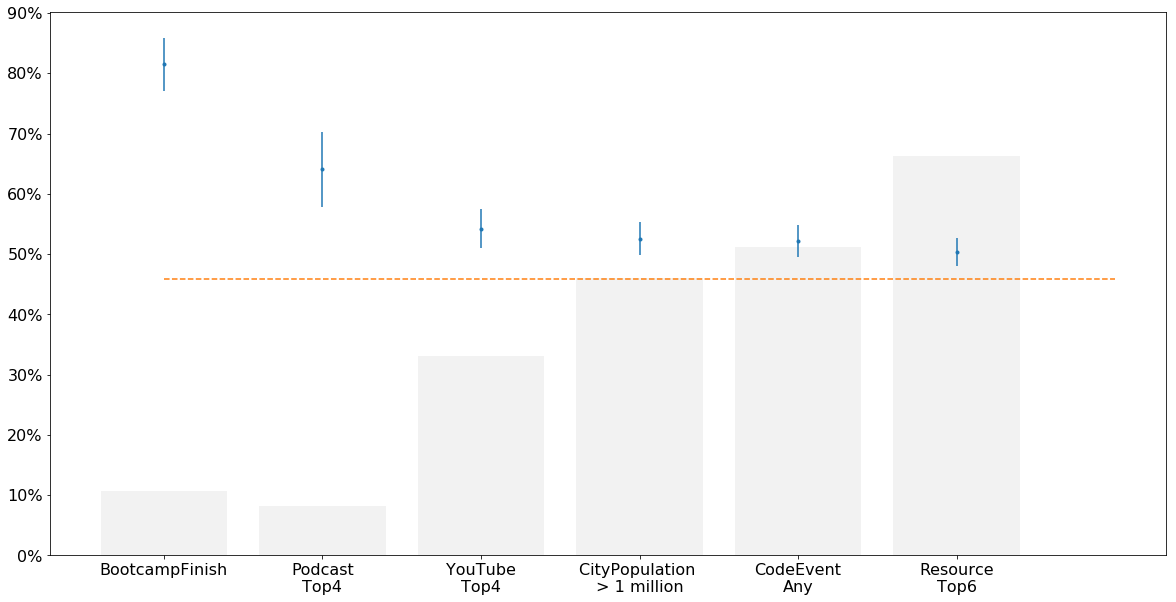

In [83]:
plt.figure(figsize=(20,10))
plt.errorbar(x=range(len(a)), y=a['means'], yerr=a['errors'], linestyle=' ', marker='.')
plt.xticks(range(len(a)), list(a.index), rotation=0, fontsize=16)

ytick_loc = range(0,100, 10)
ytick_labels = [str(i)+'%' for i in ytick_loc]
plt.yticks(ytick_loc, ytick_labels, fontsize=16)

ci = proportion_confint(1274, (1274+1504))
error = (ci[1] - ci[0])/2
error *= 100

plt.plot((0,len(a)),(45.8603, 45.8603), linestyle='dashed')

plt.bar(x=range(len(a)), height=a['pct_utilized'], alpha=.1, color='grey')



plt.show()

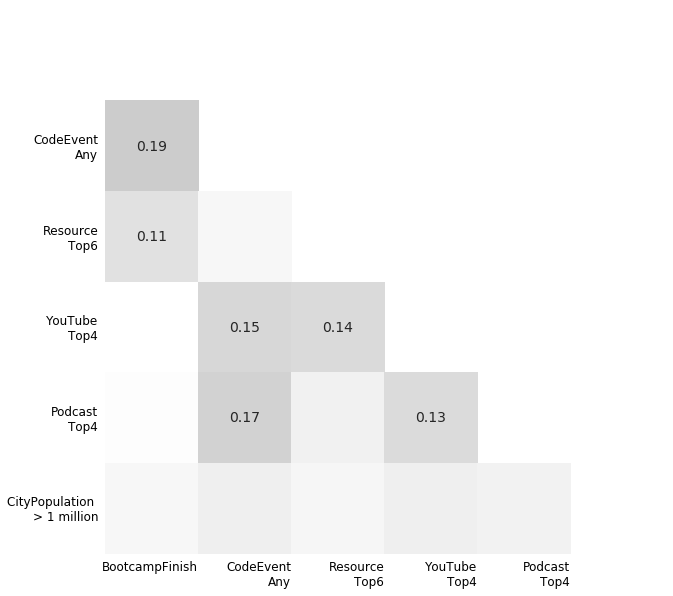

In [84]:
heatmap2(features.df[cols], cmap='binary', figsize=(10,10))

plt.xticks(range(1,6,1), index, rotation=0, fontsize=12)

plt.yticks(np.arange(1.5,6.5,1), index[1:], fontsize=12 )

plt.show()

## Random Forest

### Original Features

#### Standard Hyperparameters

In [85]:
# X columns

# original numeric cols (No MonthsProgramming, HoursLearning, Income, IsUnderEmployed, ResourceFCC) 
cols = ['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampRecommend',
 'ChildrenNumber',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'FinanciallySupporting',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits',
 'MoneyForLearning',
 'PodcastChangeLog',
 'PodcastCodeNewbie',
 'PodcastCodePen',
 'PodcastDevTea',
 'PodcastDotNET',
 'PodcastGiantRobots',
 'PodcastJSAir',
 'PodcastJSJabber',
 'PodcastNone',
 'PodcastProgThrowdown',
 'PodcastRubyRogues',
 'PodcastSEDaily',
 'PodcastSERadio',
 'PodcastShopTalk',
 'PodcastTalkPython',
 'PodcastTheWebAhead',
 'ResourceCodecademy',
 'ResourceCodeWars',
 'ResourceCoursera',
 'ResourceCSS',
 'ResourceEdX',
 'ResourceEgghead',
 'ResourceHackerRank',
 'ResourceKA',
 'ResourceLynda',
 'ResourceMDN',
 'ResourceOdinProj',
 'ResourcePluralSight',
 'ResourceSkillcrush',
 'ResourceSO',
 'ResourceTreehouse',
 'ResourceUdacity',
 'ResourceUdemy',
 'ResourceW3S',
 'StudentDebtOwe',
 'YouTubeCodeCourse',
 'YouTubeCodingTrain',
 'YouTubeCodingTut360',
 'YouTubeComputerphile',
 'YouTubeDerekBanas',
 'YouTubeDevTips',
 'YouTubeEngineeredTruth',
 'YouTubeFCC',
 'YouTubeFunFunFunction',
 'YouTubeGoogleDev',
 'YouTubeLearnCode',
 'YouTubeLevelUpTuts',
 'YouTubeMIT',
 'YouTubeMozillaHacks',
 'YouTubeSimplilearn',
 'YouTubeTheNewBoston']

# original dummy columns (no EmploymentField or CommuteTime info)
cols += [
  'BootcampName_10x.org.il',
  'BootcampName_4Geeks Academy',
  'BootcampName_Academia de Código',
  'BootcampName_Academic Work Academy',
  'BootcampName_Academy Pittsburgh',
  'BootcampName_Ace Hacker Academy',
  'BootcampName_Ada',
  'BootcampName_American Graphics Institute',
  'BootcampName_AngelHack Education',
  'BootcampName_Anyone Can Learn To Code',
  'BootcampName_App Academy',
  'BootcampName_Austin Coding Academy',
  'BootcampName_Bitmaker Labs',
  'BootcampName_Bloc.io',
  'BootcampName_BoiseCodeWorks',
  'BootcampName_BrainStation',
  'BootcampName_Camp Code Away',
  'BootcampName_CareerFoundry',
  'BootcampName_Code Fellows',
  'BootcampName_Code Institute',
  'BootcampName_CodeClan',
  'BootcampName_CodeCore Bootcamp',
  'BootcampName_CodeNinja',
  'BootcampName_CodeaCamp',
  'BootcampName_Codecademy Labs',
  'BootcampName_Coder Foundry',
  "BootcampName_Coder's Lab",
  'BootcampName_Codeup',
  'BootcampName_Coding Dojo',
  'BootcampName_Coding House',
  'BootcampName_Depot/U',
  'BootcampName_Dev Academy',
  'BootcampName_Dev Bootcamp',
  'BootcampName_Dev League',
  'BootcampName_DevMountain',
  'BootcampName_Eleven Fifty Academy',
  'BootcampName_EpicU',
  'BootcampName_Epicodus',
  'BootcampName_Flatiron School',
  'BootcampName_Free Code Camp is not a bootcamp - please scroll up and change answer to "no"',
  'BootcampName_Fullstack Academy',
  'BootcampName_Gainesville Dev Academy',
  'BootcampName_Galvanize',
  'BootcampName_General Assembly',
  'BootcampName_Grace Hopper Academy',
  'BootcampName_Grand Circus',
  'BootcampName_Hack Reactor',
  'BootcampName_Hackbright Academy',
  'BootcampName_HackerYou',
  'BootcampName_Infinity Labs',
  'BootcampName_IronHack',
  'BootcampName_Israel Tech Challenge',
  'BootcampName_Jademy',
  'BootcampName_LEARN Academy',
  'BootcampName_Launch Academy',
  'BootcampName_Le Wagon',
  'BootcampName_LearningFuze',
  'BootcampName_Level',
  'BootcampName_Lighthouse Labs',
  'BootcampName_Logit Academy',
  'BootcampName_MakerSquare',
  'BootcampName_Makers Academy',
  'BootcampName_Mobile Makers Academy',
  'BootcampName_Montana Code School',
  'BootcampName_Nashville Software School',
  'BootcampName_New York Code + Design Academy',
  'BootcampName_Omaha Code School',
  'BootcampName_Operation Spark',
  'BootcampName_Orange County Code School',
  'BootcampName_Origin Code Academy',
  'BootcampName_Prime Digital Academy',
  'BootcampName_RefactorU',
  'BootcampName_Sabio.la',
  'BootcampName_Science to Data Science',
  'BootcampName_Skillcrush',
  'BootcampName_Software Guild',
  'BootcampName_Star City Code School',
  'BootcampName_Startup Institute',
  'BootcampName_Tech Talent South',
  'BootcampName_Tel Aviv',
  'BootcampName_Telegraph Academy',
  'BootcampName_The Firehose Project',
  'BootcampName_The Iron Yard',
  'BootcampName_Thinkful',
  'BootcampName_V School',
  'BootcampName_Viking Code School',
  'BootcampName_We Can Code IT',
  'BootcampName_We Got Coders',
  'BootcampName_World Tech Makers',
  'BootcampName_Wyncode',
  'BootcampName_Zip Code Wilmington',
  'BootcampName_not applicable',
  'CityPopulation_between 100,000 and 1 million',
  'CityPopulation_less than 100,000',
  'CityPopulation_more than 1 million',
  'CountryCitizen_Afghanistan',
  'CountryCitizen_Albania',
  'CountryCitizen_Algeria',
  'CountryCitizen_American Samoa',
  'CountryCitizen_Angola',
  'CountryCitizen_Argentina',
  'CountryCitizen_Armenia',
  'CountryCitizen_Australia',
  'CountryCitizen_Austria',
  'CountryCitizen_Azerbaijan',
  'CountryCitizen_Bangladesh',
  'CountryCitizen_Barbados',
  'CountryCitizen_Belarus',
  'CountryCitizen_Belgium',
  'CountryCitizen_Belize',
  'CountryCitizen_Benin',
  'CountryCitizen_Bolivia',
  'CountryCitizen_Bosnia & Herzegovina',
  'CountryCitizen_Brazil',
  'CountryCitizen_Bulgaria',
  'CountryCitizen_Cambodia',
  'CountryCitizen_Cameroon',
  'CountryCitizen_Canada',
  'CountryCitizen_Chile',
  'CountryCitizen_China',
  'CountryCitizen_Colombia',
  'CountryCitizen_Costa Rica',
  'CountryCitizen_Croatia',
  'CountryCitizen_Cuba',
  'CountryCitizen_Czech Republic',
  'CountryCitizen_Denmark',
  'CountryCitizen_Dominica',
  'CountryCitizen_Dominican Republic',
  'CountryCitizen_Ecuador',
  'CountryCitizen_Egypt',
  'CountryCitizen_El Salvador',
  'CountryCitizen_Estonia',
  'CountryCitizen_Ethiopia',
  'CountryCitizen_Finland',
  'CountryCitizen_France',
  'CountryCitizen_Georgia',
  'CountryCitizen_Germany',
  'CountryCitizen_Ghana',
  'CountryCitizen_Great Britain',
  'CountryCitizen_Greece',
  'CountryCitizen_Guatemala',
  'CountryCitizen_Guinea',
  'CountryCitizen_Guyana',
  'CountryCitizen_Hong Kong',
  'CountryCitizen_Hungary',
  'CountryCitizen_India',
  'CountryCitizen_Indonesia',
  'CountryCitizen_Iran',
  'CountryCitizen_Iraq',
  'CountryCitizen_Ireland',
  'CountryCitizen_Israel',
  'CountryCitizen_Italy',
  'CountryCitizen_Jamaica',
  'CountryCitizen_Japan',
  'CountryCitizen_Jordan',
  'CountryCitizen_Kazakhstan',
  'CountryCitizen_Kenya',
  'CountryCitizen_Korea South',
  'CountryCitizen_Kosovo',
  'CountryCitizen_Kyrgyzstan',
  'CountryCitizen_Latvia',
  'CountryCitizen_Lithuania',
  'CountryCitizen_Luxembourg',
  'CountryCitizen_Macedonia',
  'CountryCitizen_Malaysia',
  'CountryCitizen_Malta',
  'CountryCitizen_Mauritius',
  'CountryCitizen_Mexico',
  'CountryCitizen_Moldova',
  'CountryCitizen_Morocco',
  'CountryCitizen_Myanmar',
  'CountryCitizen_Nepal',
  'CountryCitizen_Netherland Antilles',
  'CountryCitizen_Netherlands (Holland, Europe)',
  'CountryCitizen_New Zealand',
  'CountryCitizen_Nicaragua',
  'CountryCitizen_Niger',
  'CountryCitizen_Nigeria',
  'CountryCitizen_Norfolk Island',
  'CountryCitizen_Norway',
  'CountryCitizen_Pakistan',
  'CountryCitizen_Palestine',
  'CountryCitizen_Panama',
  'CountryCitizen_Paraguay',
  'CountryCitizen_Peru',
  'CountryCitizen_Philippines',
  'CountryCitizen_Poland',
  'CountryCitizen_Portugal',
  'CountryCitizen_Puerto Rico',
  'CountryCitizen_Republic of Montenegro',
  'CountryCitizen_Republic of Serbia',
  'CountryCitizen_Romania',
  'CountryCitizen_Russia',
  'CountryCitizen_Saipan',
  'CountryCitizen_Saudi Arabia',
  'CountryCitizen_Senegal',
  'CountryCitizen_Serbia',
  'CountryCitizen_Singapore',
  'CountryCitizen_Slovakia',
  'CountryCitizen_Slovenia',
  'CountryCitizen_South Africa',
  'CountryCitizen_Spain',
  'CountryCitizen_Sri Lanka',
  'CountryCitizen_Swaziland',
  'CountryCitizen_Sweden',
  'CountryCitizen_Switzerland',
  'CountryCitizen_Syria',
  'CountryCitizen_Taiwan',
  'CountryCitizen_Tanzania',
  'CountryCitizen_Thailand',
  'CountryCitizen_Tunisia',
  'CountryCitizen_Turkey',
  'CountryCitizen_Uganda',
  'CountryCitizen_Ukraine',
  'CountryCitizen_United Kingdom',
  'CountryCitizen_United States of America',
  'CountryCitizen_Uruguay',
  'CountryCitizen_Uzbekistan',
  'CountryCitizen_Venezuela',
  'CountryCitizen_Vietnam',
  'CountryCitizen_Virgin Islands (USA)',
  'CountryCitizen_Yemen',
  'CountryCitizen_Zambia',
  'CountryCitizen_Zimbabwe',
  'CountryLive_Afghanistan',
  'CountryLive_Albania',
  'CountryLive_Algeria',
  'CountryLive_Angola',
  'CountryLive_Argentina',
  'CountryLive_Armenia',
  'CountryLive_Australia',
  'CountryLive_Austria',
  'CountryLive_Azerbaijan',
  'CountryLive_Bangladesh',
  'CountryLive_Barbados',
  'CountryLive_Belarus',
  'CountryLive_Belgium',
  'CountryLive_Belize',
  'CountryLive_Bolivia',
  'CountryLive_Bosnia & Herzegovina',
  'CountryLive_Brazil',
  'CountryLive_Brunei',
  'CountryLive_Bulgaria',
  'CountryLive_Cambodia',
  'CountryLive_Cameroon',
  'CountryLive_Canada',
  'CountryLive_Chile',
  'CountryLive_China',
  'CountryLive_Colombia',
  'CountryLive_Costa Rica',
  'CountryLive_Croatia',
  'CountryLive_Cuba',
  'CountryLive_Czech Republic',
  'CountryLive_Denmark',
  'CountryLive_Dominican Republic',
  'CountryLive_Ecuador',
  'CountryLive_Egypt',
  'CountryLive_El Salvador',
  'CountryLive_Estonia',
  'CountryLive_Finland',
  'CountryLive_France',
  'CountryLive_Georgia',
  'CountryLive_Germany',
  'CountryLive_Ghana',
  'CountryLive_Great Britain',
  'CountryLive_Greece',
  'CountryLive_Guatemala',
  'CountryLive_Hong Kong',
  'CountryLive_Hungary',
  'CountryLive_India',
  'CountryLive_Indonesia',
  'CountryLive_Iran',
  'CountryLive_Ireland',
  'CountryLive_Israel',
  'CountryLive_Italy',
  'CountryLive_Jamaica',
  'CountryLive_Japan',
  'CountryLive_Jordan',
  'CountryLive_Kazakhstan',
  'CountryLive_Kenya',
  'CountryLive_Korea South',
  'CountryLive_Latvia',
  'CountryLive_Lithuania',
  'CountryLive_Luxembourg',
  'CountryLive_Macedonia',
  'CountryLive_Malaysia',
  'CountryLive_Malta',
  'CountryLive_Mauritius',
  'CountryLive_Mexico',
  'CountryLive_Moldova',
  'CountryLive_Morocco',
  'CountryLive_Myanmar',
  'CountryLive_Nepal',
  'CountryLive_Netherlands (Holland, Europe)',
  'CountryLive_New Caledonia',
  'CountryLive_New Zealand',
  'CountryLive_Niger',
  'CountryLive_Nigeria',
  'CountryLive_Norway',
  'CountryLive_Pakistan',
  'CountryLive_Palestine',
  'CountryLive_Panama',
  'CountryLive_Paraguay',
  'CountryLive_Peru',
  'CountryLive_Philippines',
  'CountryLive_Poland',
  'CountryLive_Portugal',
  'CountryLive_Puerto Rico',
  'CountryLive_Republic of Montenegro',
  'CountryLive_Republic of Serbia',
  'CountryLive_Romania',
  'CountryLive_Russia',
  'CountryLive_Saudi Arabia',
  'CountryLive_Senegal',
  'CountryLive_Serbia',
  'CountryLive_Singapore',
  'CountryLive_Slovakia',
  'CountryLive_Slovenia',
  'CountryLive_South Africa',
  'CountryLive_Spain',
  'CountryLive_Sri Lanka',
  'CountryLive_Swaziland',
  'CountryLive_Sweden',
  'CountryLive_Switzerland',
  'CountryLive_Taiwan',
  'CountryLive_Tanzania',
  'CountryLive_Thailand',
  'CountryLive_Tunisia',
  'CountryLive_Turkey',
  'CountryLive_Uganda',
  'CountryLive_Ukraine',
  'CountryLive_United Arab Emirates',
  'CountryLive_United Kingdom',
  'CountryLive_United States of America',
  'CountryLive_Uruguay',
  'CountryLive_Uzbekistan',
  'CountryLive_Vanuatu',
  'CountryLive_Venezuela',
  'CountryLive_Vietnam',
  'CountryLive_Virgin Islands (USA)',
  'CountryLive_Zambia',
  'CountryLive_Zimbabwe',
  'CountryLive_not answered',
  'Gender_agender',
  'Gender_female',
  'Gender_genderqueer',
  'Gender_male',
  'Gender_trans',
  'LanguageAtHome_Afrikaans',
  'LanguageAtHome_Akan',
  'LanguageAtHome_Albanian',
  'LanguageAtHome_Amharic',
  'LanguageAtHome_Arabic',
  'LanguageAtHome_Armenian',
  'LanguageAtHome_Assamese',
  'LanguageAtHome_Azerbaijani',
  'LanguageAtHome_Belarusian',
  'LanguageAtHome_Bengali',
  'LanguageAtHome_Bhojpuri',
  'LanguageAtHome_Bosnian',
  'LanguageAtHome_Bulgarian',
  'LanguageAtHome_Burmese',
  'LanguageAtHome_Catalan',
  'LanguageAtHome_Cebuano',
  'LanguageAtHome_Chinese',
  'LanguageAtHome_Croatian',
  'LanguageAtHome_Czech',
  'LanguageAtHome_Danish',
  'LanguageAtHome_Dutch',
  'LanguageAtHome_Egyptian Arabic',
  'LanguageAtHome_English',
  'LanguageAtHome_Estonian',
  'LanguageAtHome_Ewe',
  'LanguageAtHome_Finnish',
  'LanguageAtHome_French',
  'LanguageAtHome_Fula',
  'LanguageAtHome_Georgian',
  'LanguageAtHome_German',
  'LanguageAtHome_Greek',
  'LanguageAtHome_Gujarati',
  'LanguageAtHome_Haitian Creole',
  'LanguageAtHome_Hausa',
  'LanguageAtHome_Hebrew',
  'LanguageAtHome_Hindi',
  'LanguageAtHome_Hmong',
  'LanguageAtHome_Hungarian',
  'LanguageAtHome_Igbo',
  'LanguageAtHome_Indonesian',
  'LanguageAtHome_Italian',
  'LanguageAtHome_Japanese',
  'LanguageAtHome_Javanese',
  'LanguageAtHome_Kannada',
  'LanguageAtHome_Kazakh',
  'LanguageAtHome_Khmer',
  'LanguageAtHome_Kikuyu',
  'LanguageAtHome_Konkani',
  'LanguageAtHome_Korean',
  'LanguageAtHome_Kurdish',
  'LanguageAtHome_Latvian',
  'LanguageAtHome_Lithuanian',
  'LanguageAtHome_Luganda',
  'LanguageAtHome_Luxembourgish',
  'LanguageAtHome_Macedonian',
  'LanguageAtHome_Maithili',
  'LanguageAtHome_Malay Bhasa Indonesia',
  'LanguageAtHome_Malayalam',
  'LanguageAtHome_Mandarin Chinese',
  'LanguageAtHome_Marathi',
  'LanguageAtHome_Marwari',
  'LanguageAtHome_Neapolitan',
  'LanguageAtHome_Nepali',
  'LanguageAtHome_North Frisian Nordfriisk',
  'LanguageAtHome_Norwegian',
  'LanguageAtHome_Odia (Oriya)',
  'LanguageAtHome_Oriya',
  'LanguageAtHome_Palatinate German',
  'LanguageAtHome_Pashto',
  'LanguageAtHome_Persian',
  'LanguageAtHome_Polish',
  'LanguageAtHome_Portuguese',
  'LanguageAtHome_Punjabi',
  'LanguageAtHome_Romanian',
  'LanguageAtHome_Russian',
  'LanguageAtHome_Serbian',
  'LanguageAtHome_Serbo-Croatian',
  'LanguageAtHome_Shona',
  'LanguageAtHome_Sindhi',
  'LanguageAtHome_Slovak',
  'LanguageAtHome_Slovene',
  'LanguageAtHome_Slovenian',
  'LanguageAtHome_Spanish',
  'LanguageAtHome_Swahili',
  'LanguageAtHome_Swati',
  'LanguageAtHome_Swedish',
  'LanguageAtHome_Tagalog',
  'LanguageAtHome_Tamil',
  'LanguageAtHome_Telugu',
  'LanguageAtHome_Thai',
  'LanguageAtHome_Turkish',
  'LanguageAtHome_Twi',
  'LanguageAtHome_Ukrainian',
  'LanguageAtHome_Urdu',
  'LanguageAtHome_Uzbek',
  'LanguageAtHome_Vietnamese',
  'LanguageAtHome_West Frisian',
  'LanguageAtHome_Wolof',
  'LanguageAtHome_Wu (Shanghainese) Chinese',
  'LanguageAtHome_Xhosa',
  'LanguageAtHome_Yoruba',
  'LanguageAtHome_Yue (Cantonese) Chinese',
  'LanguageAtHome_Zulu',
  'LanguageAtHome_not answered',
  'MaritalStatus_divorced',
  'MaritalStatus_married or domestic partnership',
  'MaritalStatus_not answered',
  'MaritalStatus_separated',
  'MaritalStatus_single, never married',
  'MaritalStatus_widowed',
  'SchoolDegree_Ph.D.',
  "SchoolDegree_associate's degree",
  "SchoolDegree_bachelor's degree",
  'SchoolDegree_high school diploma or equivalent (GED)',
  "SchoolDegree_master's degree (non-professional)",
  'SchoolDegree_no high school (secondary school)',
  'SchoolDegree_professional degree (MBA, MD, JD, etc.)',
  'SchoolDegree_some college credit, no degree',
  'SchoolDegree_some high school',
  'SchoolDegree_trade, technical, or vocational training',
  'SchoolMajor_Accounting',
  'SchoolMajor_Accounting Technician and Bookkeeping',
  'SchoolMajor_Acting',
  'SchoolMajor_Actuarial Science',
  'SchoolMajor_Administrative Assistant',
  'SchoolMajor_Adult and Continuing Education',
  'SchoolMajor_Advanced Dentistry and Oral Sciences',
  'SchoolMajor_Advertising',
  'SchoolMajor_Advertising and Marketing',
  'SchoolMajor_Aeronautics and Aviation Technology',
  'SchoolMajor_Aerospace and Aeronautical Engineering',
  'SchoolMajor_Agricultural Business and Technology',
  'SchoolMajor_Agricultural Economics',
  'SchoolMajor_Agricultural Engineering',
  'SchoolMajor_Agricultural Mechanics and Machinery',
  'SchoolMajor_Agricultural and Food Products Processing',
  'SchoolMajor_Air Traffic Control',
  'SchoolMajor_Anatomy',
  'SchoolMajor_Animation',
  'SchoolMajor_Animation, Video Graphics and Special Effects',
  'SchoolMajor_Anthropology',
  'SchoolMajor_Anthropology and Archaeology',
  'SchoolMajor_Aquaculture',
  'SchoolMajor_Arabic Language and Literature',
  'SchoolMajor_Archaeology',
  'SchoolMajor_Architectural Drafting (CAD/CADD)',
  'SchoolMajor_Architectural Engineering',
  'SchoolMajor_Architectural Engineering Technician',
  'SchoolMajor_Architectural Sciences and Technology',
  'SchoolMajor_Architecture',
  'SchoolMajor_Art History',
  'SchoolMajor_Art Studies',
  'SchoolMajor_Artificial Intelligence',
  'SchoolMajor_Asian Studies',
  'SchoolMajor_Astronomy',
  'SchoolMajor_Astrophysics',
  'SchoolMajor_Audio and Video Production',
  'SchoolMajor_Audiology',
  'SchoolMajor_Auto Mechanic',
  'SchoolMajor_Automotive Engineering',
  'SchoolMajor_Automotive Engineering Technician',
  'SchoolMajor_Banking and Finance',
  'SchoolMajor_Biblical Studies',
  'SchoolMajor_Biochemistry',
  'SchoolMajor_Biochemistry and Molecular Biology',
  'SchoolMajor_Bioengineering and Biomedical Engineering',
  'SchoolMajor_Bioinformatics',
  'SchoolMajor_Biology',
  'SchoolMajor_Biology and Biological Sciences',
  'SchoolMajor_Biomedical Engineering',
  'SchoolMajor_Biomedical Science',
  'SchoolMajor_Biomedical Sciences and Molecular Medicine',
  'SchoolMajor_Biotechnology',
  'SchoolMajor_Building Construction Technology',
  'SchoolMajor_Business Administration',
  'SchoolMajor_Business Administration and Management',
  'SchoolMajor_Cellular Biology',
  'SchoolMajor_Chemical Engineering',
  'SchoolMajor_Chemistry',
  'SchoolMajor_Child Development',
  'SchoolMajor_Chinese Language and Literature',
  'SchoolMajor_Chiropractic',
  'SchoolMajor_Cinematography And Film',
  'SchoolMajor_Civil Engineering',
  'SchoolMajor_Classics',
  'SchoolMajor_Climatology',
  'SchoolMajor_Clinical Psychology',
  'SchoolMajor_Commercial and Advertising Art',
  'SchoolMajor_Communication and Media Studies',
  'SchoolMajor_Communications',
  'SchoolMajor_Comparative Literature',
  'SchoolMajor_Computational and Applied Mathematics',
  'SchoolMajor_Computer Aided Design (CAD)',
  'SchoolMajor_Computer Engineering Technician',
  'SchoolMajor_Computer Graphics',
  'SchoolMajor_Computer Hardware Engineering',
  'SchoolMajor_Computer Networking',
  'SchoolMajor_Computer Programming',
  'SchoolMajor_Computer Science',
  'SchoolMajor_Computer Software Engineering',
  'SchoolMajor_Computer Systems Analysis',
  'SchoolMajor_Computer Systems Networking and Telecommunications',
  'SchoolMajor_Computer Systems Technician',
  'SchoolMajor_Computer and Information Studies',
  'SchoolMajor_Computer and Information Systems Security',
  'SchoolMajor_Crafts and Artisanry',
  'SchoolMajor_Creative Writing',
  'SchoolMajor_Criminal Justice',
  'SchoolMajor_Design and Visual Communications',
  'SchoolMajor_Developmental and Child Psychology',
  'SchoolMajor_Divinity, Ministry, and Pre-Theology',
  'SchoolMajor_East Asian Languages and Literatures',
  'SchoolMajor_Ecology and Evolutionary Biology',
  'SchoolMajor_Economic Development',
  'SchoolMajor_Economics',
  'SchoolMajor_Economics and Econometrics',
  'SchoolMajor_Education',
  'SchoolMajor_Education of Individuals with Impairments and Disabilities',
  'SchoolMajor_Educational Media Design',
  'SchoolMajor_Electrical Engineering',
  'SchoolMajor_Electrical Engineering Technician',
  'SchoolMajor_Electrical and Electronics Engineering',
  'SchoolMajor_Electrical and Power Transmission Installation',
  'SchoolMajor_Engineering',
  'SchoolMajor_Engineering Design',
  'SchoolMajor_Engineering Management',
  'SchoolMajor_Engineering Mechanics',
  'SchoolMajor_Engineering Physics',
  'SchoolMajor_Engineering Science',
  'SchoolMajor_English',
  'SchoolMajor_English Language Studies',
  'SchoolMajor_Entrepreneurship',
  'SchoolMajor_Environmental Architecture and Design',
  'SchoolMajor_Environmental Engineering',
  'SchoolMajor_Environmental Science',
  'SchoolMajor_Environmental Studies',
  'SchoolMajor_Environmental and Marine Sciences',
  'SchoolMajor_European and Russian Studies',
  'SchoolMajor_Fashion and Apparel Design',
  'SchoolMajor_Film and Video Studies',
  'SchoolMajor_Finance',
  'SchoolMajor_Financial Planning',
  'SchoolMajor_Food Science',
  'SchoolMajor_Foods, Nutrition, and Wellness Studies',
  'SchoolMajor_Foreign Language Teacher  Education',
  'SchoolMajor_Foreign Languages and Literatures',
  'SchoolMajor_French Language and Literature',
  'SchoolMajor_Game Design',
  'SchoolMajor_Game and Interactive Media Design',
  'SchoolMajor_General Construction Trades',
  'SchoolMajor_General Studies',
  'SchoolMajor_Genetics',
  'SchoolMajor_Geography',
  'SchoolMajor_Geology',
  'SchoolMajor_Geology and Earth Science',
  'SchoolMajor_German Language and Literature',
  'SchoolMajor_Graphic Communication and Printing',
  'SchoolMajor_Graphic Design',
  'SchoolMajor_Health Informatics',
  'SchoolMajor_Healthcare Administration',
  'SchoolMajor_History',
  'SchoolMajor_History Teacher Education',
  'SchoolMajor_Hotel and Hospitality Management',
  'SchoolMajor_Human Resources Development',
  'SchoolMajor_Human Resources Management',
  'SchoolMajor_IT Services Administration',
  'SchoolMajor_Illustration',
  'SchoolMajor_Industrial Design',
  'SchoolMajor_Industrial Engineering',
  'SchoolMajor_Industrial and Engineering Management',
  'SchoolMajor_Industrial and Organizational Psychology',
  'SchoolMajor_Industrial and Product Design',
  'SchoolMajor_Information Operations',
  'SchoolMajor_Information Systems',
  'SchoolMajor_Information Technology',
  'SchoolMajor_Instrumentation Technician',
  'SchoolMajor_Intellectual Property Law',
  'SchoolMajor_Intelligence',
  'SchoolMajor_Interior Design',
  'SchoolMajor_International Business',
  'SchoolMajor_International Relations',
  'SchoolMajor_International Relations and National Security Studies',
  'SchoolMajor_Islam',
  'SchoolMajor_Japanese Language and Literature',
  'SchoolMajor_Journalism',
  'SchoolMajor_Kinesiology and Exercise Science',
  'SchoolMajor_Landscape Architecture',
  'SchoolMajor_Latin and Ancient Greek Studies',
  'SchoolMajor_Law',
  'SchoolMajor_Law Studies',
  'SchoolMajor_Liberal Arts',
  'SchoolMajor_Liberal Arts and Humanities',
  'SchoolMajor_Library Science and Administration',
  'SchoolMajor_Library and Archives Assisting',
  'SchoolMajor_Linguistics',
  'SchoolMajor_Linguistics, Interpretation, and Translation',
  'SchoolMajor_Literature',
  'SchoolMajor_Logistics and Supply Chain Management',
  'SchoolMajor_Management Information Systems',
  'SchoolMajor_Management Sciences and Statistics',
  'SchoolMajor_Managerial Economics',
  'SchoolMajor_Marine Biology',
  'SchoolMajor_Marine Biology and Oceanography',
  'SchoolMajor_Marine Science',
  'SchoolMajor_Marketing',
  'SchoolMajor_Mass Communication',
  'SchoolMajor_Math',
  'SchoolMajor_Mathematics',
  'SchoolMajor_Mathematics Teacher Education',
  'SchoolMajor_Mechanical Drafting (CAD/CADD)',
  'SchoolMajor_Mechanical Engineering',
  'SchoolMajor_Mechanical Engineering Technician',
  'SchoolMajor_Medical Laboratory Technician',
  'SchoolMajor_Medicine',
  'SchoolMajor_Mental Health Counseling',
  'SchoolMajor_Meteorology',
  'SchoolMajor_Microbiology',
  'SchoolMajor_Molecular Biology',
  'SchoolMajor_Multimedia',
  'SchoolMajor_Music',
  'SchoolMajor_Music History and Literature',
  'SchoolMajor_Music Performance',
  'SchoolMajor_Music Teacher Education',
  'SchoolMajor_Music Technology',
  'SchoolMajor_Music Theory and Composition',
  'SchoolMajor_Nail Technician',
  'SchoolMajor_Natural Resources Conservation',
  'SchoolMajor_Network, Database, and System Administration',
  'SchoolMajor_Neuroscience',
  'SchoolMajor_Nuclear Engineering',
  'SchoolMajor_Nursing',
  'SchoolMajor_Nutrition',
  'SchoolMajor_Operations Management',
  'SchoolMajor_Organizational Communication',
  'SchoolMajor_Painting',
  'SchoolMajor_Paralegal',
  'SchoolMajor_Parks, Recreation and Leisure Facilities Management',
  'SchoolMajor_Petroleum Engineering',
  'SchoolMajor_Pharmaceutical Sciences',
  'SchoolMajor_Pharmacology',
  'SchoolMajor_Pharmacy',
  'SchoolMajor_Philosophy',
  'SchoolMajor_Photography',
  'SchoolMajor_Physics',
  'SchoolMajor_Physiology',
  'SchoolMajor_Political Science',
  'SchoolMajor_Political Science and Government',
  'SchoolMajor_Pre-Medicine Studies',
  'SchoolMajor_Psychology',
  'SchoolMajor_Public Administration',
  'SchoolMajor_Public Health',
  'SchoolMajor_Quality Control Technician',
  'SchoolMajor_Radiologic Technician',
  'SchoolMajor_Religious Studies',
  'SchoolMajor_Research and Experimental Psychology',
  'SchoolMajor_Retailing Management',
  'SchoolMajor_Robotics and Automation Engineering',
  'SchoolMajor_Russian and Eastern European Languages and Literature',
  'SchoolMajor_Sculpture',
  'SchoolMajor_Security and Loss Prevention Services',
  'SchoolMajor_Sheet Metal Technology',
  'SchoolMajor_Social Psychology',
  'SchoolMajor_Social Science Research Methods',
  'SchoolMajor_Social Studies Teacher Education',
  'SchoolMajor_Social Work',
  'SchoolMajor_Sociology',
  'SchoolMajor_Software Engineering',
  'SchoolMajor_Space and Undersea Systems Operations',
  'SchoolMajor_Spanish Language and Literature',
  'SchoolMajor_Special Education and Teaching',
  'SchoolMajor_Speech Communication and Rhetoric',
  'SchoolMajor_Sport and Fitness Management',
  'SchoolMajor_Statistics',
  'SchoolMajor_Structural Engineering',
  'SchoolMajor_Studio Arts',
  'SchoolMajor_Sustainability Studies',
  'SchoolMajor_System, Networking, and LAN/WAN Management',
  'SchoolMajor_Systems Engineering',
  'SchoolMajor_Talmudic and Rabbinical Studies',
  'SchoolMajor_Teacher Education for Multiple Levels',
  'SchoolMajor_Teaching English as a Second Language',
  'SchoolMajor_Technical Teacher Education',
  'SchoolMajor_Telecommunications Technician',
  'SchoolMajor_Theatre Design',
  'SchoolMajor_Theatre, Arts, and Media Management',
  'SchoolMajor_Theology',
  'SchoolMajor_Tourism and Travel Services Management',
  'SchoolMajor_Truck,  Bus, and Commercial Vehicle Operation',
  'SchoolMajor_Urban Planning',
  'SchoolMajor_Urban Studies and Affairs',
  'SchoolMajor_Visual Arts',
  'SchoolMajor_Web Design',
  "SchoolMajor_Women's Studies",
  'SchoolMajor_Zoology',
  'SchoolMajor_not answered']

In [86]:
# split, fit, & score

X_train, y_train = features.train_df[cols], features.train_df['IsSoftwareDev']
X_test, y_test = features.test_df[cols], features.test_df['IsSoftwareDev']
X, y = features.df[cols], features.df['IsSoftwareDev']

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=3)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print('training score: ',rf.score(X_train, y_train))
print('testing score: ', rf.score(X_test, y_test))
cv = cross_val_score(rf, X_train, y_train, cv=10)
ci = DescrStatsW(cv).tconfint_mean()
print('cross val score: ', cv.mean(), ' +/-', (ci[1]-ci[0])/2)


training score:  0.9875239923224568
testing score:  0.659942363112392
cross val score:  0.6689317261685682  +/- 0.017452817834656464


In [87]:
# feature importance
fi_df = feature_importance_df(rf, cols)
fi_df

,0
Age,0.045861
MoneyForLearning,0.027220
BootcampName_not applicable,0.023025
CountryLive_United States of America,0.020233
StudentDebtOwe,0.013961
SchoolDegree_bachelor's degree,0.013547
ResourceMDN,0.013278
HasHomeMortgage,0.011946
"CityPopulation_between 100,000 and 1 million",0.011418
YouTubeFCC,0.011224


#### Tuned Hyperparameters

In [88]:
# X columns

# original numeric cols (No MonthsProgramming, HoursLearning, Income, IsUnderEmployed, ResourceFCC) 
cols = ['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampRecommend',
 'ChildrenNumber',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'FinanciallySupporting',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits',
 'MoneyForLearning',
 'PodcastChangeLog',
 'PodcastCodeNewbie',
 'PodcastCodePen',
 'PodcastDevTea',
 'PodcastDotNET',
 'PodcastGiantRobots',
 'PodcastJSAir',
 'PodcastJSJabber',
 'PodcastNone',
 'PodcastProgThrowdown',
 'PodcastRubyRogues',
 'PodcastSEDaily',
 'PodcastSERadio',
 'PodcastShopTalk',
 'PodcastTalkPython',
 'PodcastTheWebAhead',
 'ResourceCodecademy',
 'ResourceCodeWars',
 'ResourceCoursera',
 'ResourceCSS',
 'ResourceEdX',
 'ResourceEgghead',
 'ResourceHackerRank',
 'ResourceKA',
 'ResourceLynda',
 'ResourceMDN',
 'ResourceOdinProj',
 'ResourcePluralSight',
 'ResourceSkillcrush',
 'ResourceSO',
 'ResourceTreehouse',
 'ResourceUdacity',
 'ResourceUdemy',
 'ResourceW3S',
 'StudentDebtOwe',
 'YouTubeCodeCourse',
 'YouTubeCodingTrain',
 'YouTubeCodingTut360',
 'YouTubeComputerphile',
 'YouTubeDerekBanas',
 'YouTubeDevTips',
 'YouTubeEngineeredTruth',
 'YouTubeFCC',
 'YouTubeFunFunFunction',
 'YouTubeGoogleDev',
 'YouTubeLearnCode',
 'YouTubeLevelUpTuts',
 'YouTubeMIT',
 'YouTubeMozillaHacks',
 'YouTubeSimplilearn',
 'YouTubeTheNewBoston']

# original dummy columns (no EmploymentField or CommuteTime info)
cols += [
  'BootcampName_10x.org.il',
  'BootcampName_4Geeks Academy',
  'BootcampName_Academia de Código',
  'BootcampName_Academic Work Academy',
  'BootcampName_Academy Pittsburgh',
  'BootcampName_Ace Hacker Academy',
  'BootcampName_Ada',
  'BootcampName_American Graphics Institute',
  'BootcampName_AngelHack Education',
  'BootcampName_Anyone Can Learn To Code',
  'BootcampName_App Academy',
  'BootcampName_Austin Coding Academy',
  'BootcampName_Bitmaker Labs',
  'BootcampName_Bloc.io',
  'BootcampName_BoiseCodeWorks',
  'BootcampName_BrainStation',
  'BootcampName_Camp Code Away',
  'BootcampName_CareerFoundry',
  'BootcampName_Code Fellows',
  'BootcampName_Code Institute',
  'BootcampName_CodeClan',
  'BootcampName_CodeCore Bootcamp',
  'BootcampName_CodeNinja',
  'BootcampName_CodeaCamp',
  'BootcampName_Codecademy Labs',
  'BootcampName_Coder Foundry',
  "BootcampName_Coder's Lab",
  'BootcampName_Codeup',
  'BootcampName_Coding Dojo',
  'BootcampName_Coding House',
  'BootcampName_Depot/U',
  'BootcampName_Dev Academy',
  'BootcampName_Dev Bootcamp',
  'BootcampName_Dev League',
  'BootcampName_DevMountain',
  'BootcampName_Eleven Fifty Academy',
  'BootcampName_EpicU',
  'BootcampName_Epicodus',
  'BootcampName_Flatiron School',
  'BootcampName_Free Code Camp is not a bootcamp - please scroll up and change answer to "no"',
  'BootcampName_Fullstack Academy',
  'BootcampName_Gainesville Dev Academy',
  'BootcampName_Galvanize',
  'BootcampName_General Assembly',
  'BootcampName_Grace Hopper Academy',
  'BootcampName_Grand Circus',
  'BootcampName_Hack Reactor',
  'BootcampName_Hackbright Academy',
  'BootcampName_HackerYou',
  'BootcampName_Infinity Labs',
  'BootcampName_IronHack',
  'BootcampName_Israel Tech Challenge',
  'BootcampName_Jademy',
  'BootcampName_LEARN Academy',
  'BootcampName_Launch Academy',
  'BootcampName_Le Wagon',
  'BootcampName_LearningFuze',
  'BootcampName_Level',
  'BootcampName_Lighthouse Labs',
  'BootcampName_Logit Academy',
  'BootcampName_MakerSquare',
  'BootcampName_Makers Academy',
  'BootcampName_Mobile Makers Academy',
  'BootcampName_Montana Code School',
  'BootcampName_Nashville Software School',
  'BootcampName_New York Code + Design Academy',
  'BootcampName_Omaha Code School',
  'BootcampName_Operation Spark',
  'BootcampName_Orange County Code School',
  'BootcampName_Origin Code Academy',
  'BootcampName_Prime Digital Academy',
  'BootcampName_RefactorU',
  'BootcampName_Sabio.la',
  'BootcampName_Science to Data Science',
  'BootcampName_Skillcrush',
  'BootcampName_Software Guild',
  'BootcampName_Star City Code School',
  'BootcampName_Startup Institute',
  'BootcampName_Tech Talent South',
  'BootcampName_Tel Aviv',
  'BootcampName_Telegraph Academy',
  'BootcampName_The Firehose Project',
  'BootcampName_The Iron Yard',
  'BootcampName_Thinkful',
  'BootcampName_V School',
  'BootcampName_Viking Code School',
  'BootcampName_We Can Code IT',
  'BootcampName_We Got Coders',
  'BootcampName_World Tech Makers',
  'BootcampName_Wyncode',
  'BootcampName_Zip Code Wilmington',
  'BootcampName_not applicable',
  'CityPopulation_between 100,000 and 1 million',
  'CityPopulation_less than 100,000',
  'CityPopulation_more than 1 million',
  'CountryCitizen_Afghanistan',
  'CountryCitizen_Albania',
  'CountryCitizen_Algeria',
  'CountryCitizen_American Samoa',
  'CountryCitizen_Angola',
  'CountryCitizen_Argentina',
  'CountryCitizen_Armenia',
  'CountryCitizen_Australia',
  'CountryCitizen_Austria',
  'CountryCitizen_Azerbaijan',
  'CountryCitizen_Bangladesh',
  'CountryCitizen_Barbados',
  'CountryCitizen_Belarus',
  'CountryCitizen_Belgium',
  'CountryCitizen_Belize',
  'CountryCitizen_Benin',
  'CountryCitizen_Bolivia',
  'CountryCitizen_Bosnia & Herzegovina',
  'CountryCitizen_Brazil',
  'CountryCitizen_Bulgaria',
  'CountryCitizen_Cambodia',
  'CountryCitizen_Cameroon',
  'CountryCitizen_Canada',
  'CountryCitizen_Chile',
  'CountryCitizen_China',
  'CountryCitizen_Colombia',
  'CountryCitizen_Costa Rica',
  'CountryCitizen_Croatia',
  'CountryCitizen_Cuba',
  'CountryCitizen_Czech Republic',
  'CountryCitizen_Denmark',
  'CountryCitizen_Dominica',
  'CountryCitizen_Dominican Republic',
  'CountryCitizen_Ecuador',
  'CountryCitizen_Egypt',
  'CountryCitizen_El Salvador',
  'CountryCitizen_Estonia',
  'CountryCitizen_Ethiopia',
  'CountryCitizen_Finland',
  'CountryCitizen_France',
  'CountryCitizen_Georgia',
  'CountryCitizen_Germany',
  'CountryCitizen_Ghana',
  'CountryCitizen_Great Britain',
  'CountryCitizen_Greece',
  'CountryCitizen_Guatemala',
  'CountryCitizen_Guinea',
  'CountryCitizen_Guyana',
  'CountryCitizen_Hong Kong',
  'CountryCitizen_Hungary',
  'CountryCitizen_India',
  'CountryCitizen_Indonesia',
  'CountryCitizen_Iran',
  'CountryCitizen_Iraq',
  'CountryCitizen_Ireland',
  'CountryCitizen_Israel',
  'CountryCitizen_Italy',
  'CountryCitizen_Jamaica',
  'CountryCitizen_Japan',
  'CountryCitizen_Jordan',
  'CountryCitizen_Kazakhstan',
  'CountryCitizen_Kenya',
  'CountryCitizen_Korea South',
  'CountryCitizen_Kosovo',
  'CountryCitizen_Kyrgyzstan',
  'CountryCitizen_Latvia',
  'CountryCitizen_Lithuania',
  'CountryCitizen_Luxembourg',
  'CountryCitizen_Macedonia',
  'CountryCitizen_Malaysia',
  'CountryCitizen_Malta',
  'CountryCitizen_Mauritius',
  'CountryCitizen_Mexico',
  'CountryCitizen_Moldova',
  'CountryCitizen_Morocco',
  'CountryCitizen_Myanmar',
  'CountryCitizen_Nepal',
  'CountryCitizen_Netherland Antilles',
  'CountryCitizen_Netherlands (Holland, Europe)',
  'CountryCitizen_New Zealand',
  'CountryCitizen_Nicaragua',
  'CountryCitizen_Niger',
  'CountryCitizen_Nigeria',
  'CountryCitizen_Norfolk Island',
  'CountryCitizen_Norway',
  'CountryCitizen_Pakistan',
  'CountryCitizen_Palestine',
  'CountryCitizen_Panama',
  'CountryCitizen_Paraguay',
  'CountryCitizen_Peru',
  'CountryCitizen_Philippines',
  'CountryCitizen_Poland',
  'CountryCitizen_Portugal',
  'CountryCitizen_Puerto Rico',
  'CountryCitizen_Republic of Montenegro',
  'CountryCitizen_Republic of Serbia',
  'CountryCitizen_Romania',
  'CountryCitizen_Russia',
  'CountryCitizen_Saipan',
  'CountryCitizen_Saudi Arabia',
  'CountryCitizen_Senegal',
  'CountryCitizen_Serbia',
  'CountryCitizen_Singapore',
  'CountryCitizen_Slovakia',
  'CountryCitizen_Slovenia',
  'CountryCitizen_South Africa',
  'CountryCitizen_Spain',
  'CountryCitizen_Sri Lanka',
  'CountryCitizen_Swaziland',
  'CountryCitizen_Sweden',
  'CountryCitizen_Switzerland',
  'CountryCitizen_Syria',
  'CountryCitizen_Taiwan',
  'CountryCitizen_Tanzania',
  'CountryCitizen_Thailand',
  'CountryCitizen_Tunisia',
  'CountryCitizen_Turkey',
  'CountryCitizen_Uganda',
  'CountryCitizen_Ukraine',
  'CountryCitizen_United Kingdom',
  'CountryCitizen_United States of America',
  'CountryCitizen_Uruguay',
  'CountryCitizen_Uzbekistan',
  'CountryCitizen_Venezuela',
  'CountryCitizen_Vietnam',
  'CountryCitizen_Virgin Islands (USA)',
  'CountryCitizen_Yemen',
  'CountryCitizen_Zambia',
  'CountryCitizen_Zimbabwe',
  'CountryLive_Afghanistan',
  'CountryLive_Albania',
  'CountryLive_Algeria',
  'CountryLive_Angola',
  'CountryLive_Argentina',
  'CountryLive_Armenia',
  'CountryLive_Australia',
  'CountryLive_Austria',
  'CountryLive_Azerbaijan',
  'CountryLive_Bangladesh',
  'CountryLive_Barbados',
  'CountryLive_Belarus',
  'CountryLive_Belgium',
  'CountryLive_Belize',
  'CountryLive_Bolivia',
  'CountryLive_Bosnia & Herzegovina',
  'CountryLive_Brazil',
  'CountryLive_Brunei',
  'CountryLive_Bulgaria',
  'CountryLive_Cambodia',
  'CountryLive_Cameroon',
  'CountryLive_Canada',
  'CountryLive_Chile',
  'CountryLive_China',
  'CountryLive_Colombia',
  'CountryLive_Costa Rica',
  'CountryLive_Croatia',
  'CountryLive_Cuba',
  'CountryLive_Czech Republic',
  'CountryLive_Denmark',
  'CountryLive_Dominican Republic',
  'CountryLive_Ecuador',
  'CountryLive_Egypt',
  'CountryLive_El Salvador',
  'CountryLive_Estonia',
  'CountryLive_Finland',
  'CountryLive_France',
  'CountryLive_Georgia',
  'CountryLive_Germany',
  'CountryLive_Ghana',
  'CountryLive_Great Britain',
  'CountryLive_Greece',
  'CountryLive_Guatemala',
  'CountryLive_Hong Kong',
  'CountryLive_Hungary',
  'CountryLive_India',
  'CountryLive_Indonesia',
  'CountryLive_Iran',
  'CountryLive_Ireland',
  'CountryLive_Israel',
  'CountryLive_Italy',
  'CountryLive_Jamaica',
  'CountryLive_Japan',
  'CountryLive_Jordan',
  'CountryLive_Kazakhstan',
  'CountryLive_Kenya',
  'CountryLive_Korea South',
  'CountryLive_Latvia',
  'CountryLive_Lithuania',
  'CountryLive_Luxembourg',
  'CountryLive_Macedonia',
  'CountryLive_Malaysia',
  'CountryLive_Malta',
  'CountryLive_Mauritius',
  'CountryLive_Mexico',
  'CountryLive_Moldova',
  'CountryLive_Morocco',
  'CountryLive_Myanmar',
  'CountryLive_Nepal',
  'CountryLive_Netherlands (Holland, Europe)',
  'CountryLive_New Caledonia',
  'CountryLive_New Zealand',
  'CountryLive_Niger',
  'CountryLive_Nigeria',
  'CountryLive_Norway',
  'CountryLive_Pakistan',
  'CountryLive_Palestine',
  'CountryLive_Panama',
  'CountryLive_Paraguay',
  'CountryLive_Peru',
  'CountryLive_Philippines',
  'CountryLive_Poland',
  'CountryLive_Portugal',
  'CountryLive_Puerto Rico',
  'CountryLive_Republic of Montenegro',
  'CountryLive_Republic of Serbia',
  'CountryLive_Romania',
  'CountryLive_Russia',
  'CountryLive_Saudi Arabia',
  'CountryLive_Senegal',
  'CountryLive_Serbia',
  'CountryLive_Singapore',
  'CountryLive_Slovakia',
  'CountryLive_Slovenia',
  'CountryLive_South Africa',
  'CountryLive_Spain',
  'CountryLive_Sri Lanka',
  'CountryLive_Swaziland',
  'CountryLive_Sweden',
  'CountryLive_Switzerland',
  'CountryLive_Taiwan',
  'CountryLive_Tanzania',
  'CountryLive_Thailand',
  'CountryLive_Tunisia',
  'CountryLive_Turkey',
  'CountryLive_Uganda',
  'CountryLive_Ukraine',
  'CountryLive_United Arab Emirates',
  'CountryLive_United Kingdom',
  'CountryLive_United States of America',
  'CountryLive_Uruguay',
  'CountryLive_Uzbekistan',
  'CountryLive_Vanuatu',
  'CountryLive_Venezuela',
  'CountryLive_Vietnam',
  'CountryLive_Virgin Islands (USA)',
  'CountryLive_Zambia',
  'CountryLive_Zimbabwe',
  'CountryLive_not answered',
  'Gender_agender',
  'Gender_female',
  'Gender_genderqueer',
  'Gender_male',
  'Gender_trans',
  'LanguageAtHome_Afrikaans',
  'LanguageAtHome_Akan',
  'LanguageAtHome_Albanian',
  'LanguageAtHome_Amharic',
  'LanguageAtHome_Arabic',
  'LanguageAtHome_Armenian',
  'LanguageAtHome_Assamese',
  'LanguageAtHome_Azerbaijani',
  'LanguageAtHome_Belarusian',
  'LanguageAtHome_Bengali',
  'LanguageAtHome_Bhojpuri',
  'LanguageAtHome_Bosnian',
  'LanguageAtHome_Bulgarian',
  'LanguageAtHome_Burmese',
  'LanguageAtHome_Catalan',
  'LanguageAtHome_Cebuano',
  'LanguageAtHome_Chinese',
  'LanguageAtHome_Croatian',
  'LanguageAtHome_Czech',
  'LanguageAtHome_Danish',
  'LanguageAtHome_Dutch',
  'LanguageAtHome_Egyptian Arabic',
  'LanguageAtHome_English',
  'LanguageAtHome_Estonian',
  'LanguageAtHome_Ewe',
  'LanguageAtHome_Finnish',
  'LanguageAtHome_French',
  'LanguageAtHome_Fula',
  'LanguageAtHome_Georgian',
  'LanguageAtHome_German',
  'LanguageAtHome_Greek',
  'LanguageAtHome_Gujarati',
  'LanguageAtHome_Haitian Creole',
  'LanguageAtHome_Hausa',
  'LanguageAtHome_Hebrew',
  'LanguageAtHome_Hindi',
  'LanguageAtHome_Hmong',
  'LanguageAtHome_Hungarian',
  'LanguageAtHome_Igbo',
  'LanguageAtHome_Indonesian',
  'LanguageAtHome_Italian',
  'LanguageAtHome_Japanese',
  'LanguageAtHome_Javanese',
  'LanguageAtHome_Kannada',
  'LanguageAtHome_Kazakh',
  'LanguageAtHome_Khmer',
  'LanguageAtHome_Kikuyu',
  'LanguageAtHome_Konkani',
  'LanguageAtHome_Korean',
  'LanguageAtHome_Kurdish',
  'LanguageAtHome_Latvian',
  'LanguageAtHome_Lithuanian',
  'LanguageAtHome_Luganda',
  'LanguageAtHome_Luxembourgish',
  'LanguageAtHome_Macedonian',
  'LanguageAtHome_Maithili',
  'LanguageAtHome_Malay Bhasa Indonesia',
  'LanguageAtHome_Malayalam',
  'LanguageAtHome_Mandarin Chinese',
  'LanguageAtHome_Marathi',
  'LanguageAtHome_Marwari',
  'LanguageAtHome_Neapolitan',
  'LanguageAtHome_Nepali',
  'LanguageAtHome_North Frisian Nordfriisk',
  'LanguageAtHome_Norwegian',
  'LanguageAtHome_Odia (Oriya)',
  'LanguageAtHome_Oriya',
  'LanguageAtHome_Palatinate German',
  'LanguageAtHome_Pashto',
  'LanguageAtHome_Persian',
  'LanguageAtHome_Polish',
  'LanguageAtHome_Portuguese',
  'LanguageAtHome_Punjabi',
  'LanguageAtHome_Romanian',
  'LanguageAtHome_Russian',
  'LanguageAtHome_Serbian',
  'LanguageAtHome_Serbo-Croatian',
  'LanguageAtHome_Shona',
  'LanguageAtHome_Sindhi',
  'LanguageAtHome_Slovak',
  'LanguageAtHome_Slovene',
  'LanguageAtHome_Slovenian',
  'LanguageAtHome_Spanish',
  'LanguageAtHome_Swahili',
  'LanguageAtHome_Swati',
  'LanguageAtHome_Swedish',
  'LanguageAtHome_Tagalog',
  'LanguageAtHome_Tamil',
  'LanguageAtHome_Telugu',
  'LanguageAtHome_Thai',
  'LanguageAtHome_Turkish',
  'LanguageAtHome_Twi',
  'LanguageAtHome_Ukrainian',
  'LanguageAtHome_Urdu',
  'LanguageAtHome_Uzbek',
  'LanguageAtHome_Vietnamese',
  'LanguageAtHome_West Frisian',
  'LanguageAtHome_Wolof',
  'LanguageAtHome_Wu (Shanghainese) Chinese',
  'LanguageAtHome_Xhosa',
  'LanguageAtHome_Yoruba',
  'LanguageAtHome_Yue (Cantonese) Chinese',
  'LanguageAtHome_Zulu',
  'LanguageAtHome_not answered',
  'MaritalStatus_divorced',
  'MaritalStatus_married or domestic partnership',
  'MaritalStatus_not answered',
  'MaritalStatus_separated',
  'MaritalStatus_single, never married',
  'MaritalStatus_widowed',
  'SchoolDegree_Ph.D.',
  "SchoolDegree_associate's degree",
  "SchoolDegree_bachelor's degree",
  'SchoolDegree_high school diploma or equivalent (GED)',
  "SchoolDegree_master's degree (non-professional)",
  'SchoolDegree_no high school (secondary school)',
  'SchoolDegree_professional degree (MBA, MD, JD, etc.)',
  'SchoolDegree_some college credit, no degree',
  'SchoolDegree_some high school',
  'SchoolDegree_trade, technical, or vocational training',
  'SchoolMajor_Accounting',
  'SchoolMajor_Accounting Technician and Bookkeeping',
  'SchoolMajor_Acting',
  'SchoolMajor_Actuarial Science',
  'SchoolMajor_Administrative Assistant',
  'SchoolMajor_Adult and Continuing Education',
  'SchoolMajor_Advanced Dentistry and Oral Sciences',
  'SchoolMajor_Advertising',
  'SchoolMajor_Advertising and Marketing',
  'SchoolMajor_Aeronautics and Aviation Technology',
  'SchoolMajor_Aerospace and Aeronautical Engineering',
  'SchoolMajor_Agricultural Business and Technology',
  'SchoolMajor_Agricultural Economics',
  'SchoolMajor_Agricultural Engineering',
  'SchoolMajor_Agricultural Mechanics and Machinery',
  'SchoolMajor_Agricultural and Food Products Processing',
  'SchoolMajor_Air Traffic Control',
  'SchoolMajor_Anatomy',
  'SchoolMajor_Animation',
  'SchoolMajor_Animation, Video Graphics and Special Effects',
  'SchoolMajor_Anthropology',
  'SchoolMajor_Anthropology and Archaeology',
  'SchoolMajor_Aquaculture',
  'SchoolMajor_Arabic Language and Literature',
  'SchoolMajor_Archaeology',
  'SchoolMajor_Architectural Drafting (CAD/CADD)',
  'SchoolMajor_Architectural Engineering',
  'SchoolMajor_Architectural Engineering Technician',
  'SchoolMajor_Architectural Sciences and Technology',
  'SchoolMajor_Architecture',
  'SchoolMajor_Art History',
  'SchoolMajor_Art Studies',
  'SchoolMajor_Artificial Intelligence',
  'SchoolMajor_Asian Studies',
  'SchoolMajor_Astronomy',
  'SchoolMajor_Astrophysics',
  'SchoolMajor_Audio and Video Production',
  'SchoolMajor_Audiology',
  'SchoolMajor_Auto Mechanic',
  'SchoolMajor_Automotive Engineering',
  'SchoolMajor_Automotive Engineering Technician',
  'SchoolMajor_Banking and Finance',
  'SchoolMajor_Biblical Studies',
  'SchoolMajor_Biochemistry',
  'SchoolMajor_Biochemistry and Molecular Biology',
  'SchoolMajor_Bioengineering and Biomedical Engineering',
  'SchoolMajor_Bioinformatics',
  'SchoolMajor_Biology',
  'SchoolMajor_Biology and Biological Sciences',
  'SchoolMajor_Biomedical Engineering',
  'SchoolMajor_Biomedical Science',
  'SchoolMajor_Biomedical Sciences and Molecular Medicine',
  'SchoolMajor_Biotechnology',
  'SchoolMajor_Building Construction Technology',
  'SchoolMajor_Business Administration',
  'SchoolMajor_Business Administration and Management',
  'SchoolMajor_Cellular Biology',
  'SchoolMajor_Chemical Engineering',
  'SchoolMajor_Chemistry',
  'SchoolMajor_Child Development',
  'SchoolMajor_Chinese Language and Literature',
  'SchoolMajor_Chiropractic',
  'SchoolMajor_Cinematography And Film',
  'SchoolMajor_Civil Engineering',
  'SchoolMajor_Classics',
  'SchoolMajor_Climatology',
  'SchoolMajor_Clinical Psychology',
  'SchoolMajor_Commercial and Advertising Art',
  'SchoolMajor_Communication and Media Studies',
  'SchoolMajor_Communications',
  'SchoolMajor_Comparative Literature',
  'SchoolMajor_Computational and Applied Mathematics',
  'SchoolMajor_Computer Aided Design (CAD)',
  'SchoolMajor_Computer Engineering Technician',
  'SchoolMajor_Computer Graphics',
  'SchoolMajor_Computer Hardware Engineering',
  'SchoolMajor_Computer Networking',
  'SchoolMajor_Computer Programming',
  'SchoolMajor_Computer Science',
  'SchoolMajor_Computer Software Engineering',
  'SchoolMajor_Computer Systems Analysis',
  'SchoolMajor_Computer Systems Networking and Telecommunications',
  'SchoolMajor_Computer Systems Technician',
  'SchoolMajor_Computer and Information Studies',
  'SchoolMajor_Computer and Information Systems Security',
  'SchoolMajor_Crafts and Artisanry',
  'SchoolMajor_Creative Writing',
  'SchoolMajor_Criminal Justice',
  'SchoolMajor_Design and Visual Communications',
  'SchoolMajor_Developmental and Child Psychology',
  'SchoolMajor_Divinity, Ministry, and Pre-Theology',
  'SchoolMajor_East Asian Languages and Literatures',
  'SchoolMajor_Ecology and Evolutionary Biology',
  'SchoolMajor_Economic Development',
  'SchoolMajor_Economics',
  'SchoolMajor_Economics and Econometrics',
  'SchoolMajor_Education',
  'SchoolMajor_Education of Individuals with Impairments and Disabilities',
  'SchoolMajor_Educational Media Design',
  'SchoolMajor_Electrical Engineering',
  'SchoolMajor_Electrical Engineering Technician',
  'SchoolMajor_Electrical and Electronics Engineering',
  'SchoolMajor_Electrical and Power Transmission Installation',
  'SchoolMajor_Engineering',
  'SchoolMajor_Engineering Design',
  'SchoolMajor_Engineering Management',
  'SchoolMajor_Engineering Mechanics',
  'SchoolMajor_Engineering Physics',
  'SchoolMajor_Engineering Science',
  'SchoolMajor_English',
  'SchoolMajor_English Language Studies',
  'SchoolMajor_Entrepreneurship',
  'SchoolMajor_Environmental Architecture and Design',
  'SchoolMajor_Environmental Engineering',
  'SchoolMajor_Environmental Science',
  'SchoolMajor_Environmental Studies',
  'SchoolMajor_Environmental and Marine Sciences',
  'SchoolMajor_European and Russian Studies',
  'SchoolMajor_Fashion and Apparel Design',
  'SchoolMajor_Film and Video Studies',
  'SchoolMajor_Finance',
  'SchoolMajor_Financial Planning',
  'SchoolMajor_Food Science',
  'SchoolMajor_Foods, Nutrition, and Wellness Studies',
  'SchoolMajor_Foreign Language Teacher  Education',
  'SchoolMajor_Foreign Languages and Literatures',
  'SchoolMajor_French Language and Literature',
  'SchoolMajor_Game Design',
  'SchoolMajor_Game and Interactive Media Design',
  'SchoolMajor_General Construction Trades',
  'SchoolMajor_General Studies',
  'SchoolMajor_Genetics',
  'SchoolMajor_Geography',
  'SchoolMajor_Geology',
  'SchoolMajor_Geology and Earth Science',
  'SchoolMajor_German Language and Literature',
  'SchoolMajor_Graphic Communication and Printing',
  'SchoolMajor_Graphic Design',
  'SchoolMajor_Health Informatics',
  'SchoolMajor_Healthcare Administration',
  'SchoolMajor_History',
  'SchoolMajor_History Teacher Education',
  'SchoolMajor_Hotel and Hospitality Management',
  'SchoolMajor_Human Resources Development',
  'SchoolMajor_Human Resources Management',
  'SchoolMajor_IT Services Administration',
  'SchoolMajor_Illustration',
  'SchoolMajor_Industrial Design',
  'SchoolMajor_Industrial Engineering',
  'SchoolMajor_Industrial and Engineering Management',
  'SchoolMajor_Industrial and Organizational Psychology',
  'SchoolMajor_Industrial and Product Design',
  'SchoolMajor_Information Operations',
  'SchoolMajor_Information Systems',
  'SchoolMajor_Information Technology',
  'SchoolMajor_Instrumentation Technician',
  'SchoolMajor_Intellectual Property Law',
  'SchoolMajor_Intelligence',
  'SchoolMajor_Interior Design',
  'SchoolMajor_International Business',
  'SchoolMajor_International Relations',
  'SchoolMajor_International Relations and National Security Studies',
  'SchoolMajor_Islam',
  'SchoolMajor_Japanese Language and Literature',
  'SchoolMajor_Journalism',
  'SchoolMajor_Kinesiology and Exercise Science',
  'SchoolMajor_Landscape Architecture',
  'SchoolMajor_Latin and Ancient Greek Studies',
  'SchoolMajor_Law',
  'SchoolMajor_Law Studies',
  'SchoolMajor_Liberal Arts',
  'SchoolMajor_Liberal Arts and Humanities',
  'SchoolMajor_Library Science and Administration',
  'SchoolMajor_Library and Archives Assisting',
  'SchoolMajor_Linguistics',
  'SchoolMajor_Linguistics, Interpretation, and Translation',
  'SchoolMajor_Literature',
  'SchoolMajor_Logistics and Supply Chain Management',
  'SchoolMajor_Management Information Systems',
  'SchoolMajor_Management Sciences and Statistics',
  'SchoolMajor_Managerial Economics',
  'SchoolMajor_Marine Biology',
  'SchoolMajor_Marine Biology and Oceanography',
  'SchoolMajor_Marine Science',
  'SchoolMajor_Marketing',
  'SchoolMajor_Mass Communication',
  'SchoolMajor_Math',
  'SchoolMajor_Mathematics',
  'SchoolMajor_Mathematics Teacher Education',
  'SchoolMajor_Mechanical Drafting (CAD/CADD)',
  'SchoolMajor_Mechanical Engineering',
  'SchoolMajor_Mechanical Engineering Technician',
  'SchoolMajor_Medical Laboratory Technician',
  'SchoolMajor_Medicine',
  'SchoolMajor_Mental Health Counseling',
  'SchoolMajor_Meteorology',
  'SchoolMajor_Microbiology',
  'SchoolMajor_Molecular Biology',
  'SchoolMajor_Multimedia',
  'SchoolMajor_Music',
  'SchoolMajor_Music History and Literature',
  'SchoolMajor_Music Performance',
  'SchoolMajor_Music Teacher Education',
  'SchoolMajor_Music Technology',
  'SchoolMajor_Music Theory and Composition',
  'SchoolMajor_Nail Technician',
  'SchoolMajor_Natural Resources Conservation',
  'SchoolMajor_Network, Database, and System Administration',
  'SchoolMajor_Neuroscience',
  'SchoolMajor_Nuclear Engineering',
  'SchoolMajor_Nursing',
  'SchoolMajor_Nutrition',
  'SchoolMajor_Operations Management',
  'SchoolMajor_Organizational Communication',
  'SchoolMajor_Painting',
  'SchoolMajor_Paralegal',
  'SchoolMajor_Parks, Recreation and Leisure Facilities Management',
  'SchoolMajor_Petroleum Engineering',
  'SchoolMajor_Pharmaceutical Sciences',
  'SchoolMajor_Pharmacology',
  'SchoolMajor_Pharmacy',
  'SchoolMajor_Philosophy',
  'SchoolMajor_Photography',
  'SchoolMajor_Physics',
  'SchoolMajor_Physiology',
  'SchoolMajor_Political Science',
  'SchoolMajor_Political Science and Government',
  'SchoolMajor_Pre-Medicine Studies',
  'SchoolMajor_Psychology',
  'SchoolMajor_Public Administration',
  'SchoolMajor_Public Health',
  'SchoolMajor_Quality Control Technician',
  'SchoolMajor_Radiologic Technician',
  'SchoolMajor_Religious Studies',
  'SchoolMajor_Research and Experimental Psychology',
  'SchoolMajor_Retailing Management',
  'SchoolMajor_Robotics and Automation Engineering',
  'SchoolMajor_Russian and Eastern European Languages and Literature',
  'SchoolMajor_Sculpture',
  'SchoolMajor_Security and Loss Prevention Services',
  'SchoolMajor_Sheet Metal Technology',
  'SchoolMajor_Social Psychology',
  'SchoolMajor_Social Science Research Methods',
  'SchoolMajor_Social Studies Teacher Education',
  'SchoolMajor_Social Work',
  'SchoolMajor_Sociology',
  'SchoolMajor_Software Engineering',
  'SchoolMajor_Space and Undersea Systems Operations',
  'SchoolMajor_Spanish Language and Literature',
  'SchoolMajor_Special Education and Teaching',
  'SchoolMajor_Speech Communication and Rhetoric',
  'SchoolMajor_Sport and Fitness Management',
  'SchoolMajor_Statistics',
  'SchoolMajor_Structural Engineering',
  'SchoolMajor_Studio Arts',
  'SchoolMajor_Sustainability Studies',
  'SchoolMajor_System, Networking, and LAN/WAN Management',
  'SchoolMajor_Systems Engineering',
  'SchoolMajor_Talmudic and Rabbinical Studies',
  'SchoolMajor_Teacher Education for Multiple Levels',
  'SchoolMajor_Teaching English as a Second Language',
  'SchoolMajor_Technical Teacher Education',
  'SchoolMajor_Telecommunications Technician',
  'SchoolMajor_Theatre Design',
  'SchoolMajor_Theatre, Arts, and Media Management',
  'SchoolMajor_Theology',
  'SchoolMajor_Tourism and Travel Services Management',
  'SchoolMajor_Truck,  Bus, and Commercial Vehicle Operation',
  'SchoolMajor_Urban Planning',
  'SchoolMajor_Urban Studies and Affairs',
  'SchoolMajor_Visual Arts',
  'SchoolMajor_Web Design',
  "SchoolMajor_Women's Studies",
  'SchoolMajor_Zoology',
  'SchoolMajor_not answered']

In [89]:
# best hyper parameters from multiple iterations of cross validated grid search
gs_best_params = {
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 0.1,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [90]:
# split, fit, & score


X_train, y_train = features.train_df[cols], features.train_df['IsSoftwareDev']
X_test, y_test = features.test_df[cols], features.test_df['IsSoftwareDev']
X, y = features.df[cols], features.df['IsSoftwareDev']

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=3)

rf = RandomForestClassifier(**gs_best_params)

rf.fit(X_train,y_train)
print('training score: ',rf.score(X_train, y_train))
print('testing score: ', rf.score(X_test, y_test))
cv = cross_val_score(rf, X_train, y_train, cv=10)
ci = DescrStatsW(cv).tconfint_mean()
print('cross val score: ', cv.mean(), ' +/-', (ci[1]-ci[0])/2)


training score:  1.0
testing score:  0.723342939481268
cross val score:  0.7126035149061465  +/- 0.02501710158056314


In [91]:
fi_df = feature_importance_df(rf, cols)
fi_df

,0
Age,0.065822
MoneyForLearning,0.038344
BootcampFinish,0.017710
StudentDebtOwe,0.016996
CountryLive_United States of America,0.016778
LanguageAtHome_English,0.015469
CountryCitizen_United States of America,0.012124
ResourceKA,0.011844
SchoolMajor_not answered,0.011692
ResourceCSS,0.011634


### Maximally Predictive Features
Tuned Hyperparameters

In [92]:
# same columns from logistic regression maximally predictive features. 
# Other sets of features were tried but these were the maximally predictive found 

cols = lr_rfecv_cols

In [93]:
# split, fit, & score
cols = lr_rfecv_cols

X_train, y_train = features.train_df[cols], features.train_df['IsSoftwareDev']
X_test, y_test = features.test_df[cols], features.test_df['IsSoftwareDev']
X, y = features.df[cols], features.df['IsSoftwareDev']

rf = RandomForestClassifier(**gs_best_params)

rf.fit(X_train,y_train)
print('training score: ',rf.score(X_train, y_train))
print('testing score: ', rf.score(X_test, y_test))
cv = cross_val_score(rf, X_train, y_train, cv=10)
ci = DescrStatsW(cv).tconfint_mean()
print('cross val score: ', cv.mean(), ' +/-', (ci[1]-ci[0])/2)

training score:  0.996641074856046
testing score:  0.6786743515850144
cross val score:  0.7029927309532572  +/- 0.021665530157790158


In [94]:
# feature importance
fi_df = feature_importance_df(rf, cols)
fi_df

,0
BootcampFinish,0.032576
CityPopulation_more than 1 million,0.031746
HasDebt,0.031440
ResourceCSS,0.030721
IsEthnicMinority,0.027816
CountryLive_United States of America,0.027366
ResourceSO,0.027213
YouTubeGoogleDev,0.026282
"MaritalStatus_single, never married",0.025920
LanguageAtHome_English,0.025626


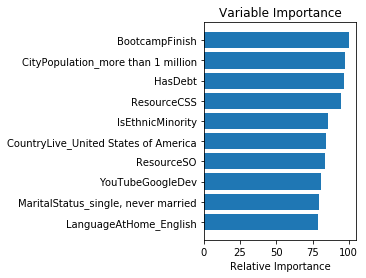

In [95]:
feature_importance = rf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

nf = 10 # number of features to show

pos = np.arange(nf) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx][-nf:], align='center')
plt.yticks(pos, X.columns[sorted_idx][-nf:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## K-nearest neighbors
Original Features
Standard Hyperparameters

In [96]:
# X columns

# original numeric cols (No MonthsProgramming, HoursLearning, Income, IsUnderEmployed, ResourceFCC) 
cols = ['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampRecommend',
 'ChildrenNumber',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'FinanciallySupporting',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits',
 'MoneyForLearning',
 'PodcastChangeLog',
 'PodcastCodeNewbie',
 'PodcastCodePen',
 'PodcastDevTea',
 'PodcastDotNET',
 'PodcastGiantRobots',
 'PodcastJSAir',
 'PodcastJSJabber',
 'PodcastNone',
 'PodcastProgThrowdown',
 'PodcastRubyRogues',
 'PodcastSEDaily',
 'PodcastSERadio',
 'PodcastShopTalk',
 'PodcastTalkPython',
 'PodcastTheWebAhead',
 'ResourceCodecademy',
 'ResourceCodeWars',
 'ResourceCoursera',
 'ResourceCSS',
 'ResourceEdX',
 'ResourceEgghead',
 'ResourceHackerRank',
 'ResourceKA',
 'ResourceLynda',
 'ResourceMDN',
 'ResourceOdinProj',
 'ResourcePluralSight',
 'ResourceSkillcrush',
 'ResourceSO',
 'ResourceTreehouse',
 'ResourceUdacity',
 'ResourceUdemy',
 'ResourceW3S',
 'StudentDebtOwe',
 'YouTubeCodeCourse',
 'YouTubeCodingTrain',
 'YouTubeCodingTut360',
 'YouTubeComputerphile',
 'YouTubeDerekBanas',
 'YouTubeDevTips',
 'YouTubeEngineeredTruth',
 'YouTubeFCC',
 'YouTubeFunFunFunction',
 'YouTubeGoogleDev',
 'YouTubeLearnCode',
 'YouTubeLevelUpTuts',
 'YouTubeMIT',
 'YouTubeMozillaHacks',
 'YouTubeSimplilearn',
 'YouTubeTheNewBoston']

# original dummy columns (no EmploymentField or CommuteTime info)
cols += [
  'BootcampName_10x.org.il',
  'BootcampName_4Geeks Academy',
  'BootcampName_Academia de Código',
  'BootcampName_Academic Work Academy',
  'BootcampName_Academy Pittsburgh',
  'BootcampName_Ace Hacker Academy',
  'BootcampName_Ada',
  'BootcampName_American Graphics Institute',
  'BootcampName_AngelHack Education',
  'BootcampName_Anyone Can Learn To Code',
  'BootcampName_App Academy',
  'BootcampName_Austin Coding Academy',
  'BootcampName_Bitmaker Labs',
  'BootcampName_Bloc.io',
  'BootcampName_BoiseCodeWorks',
  'BootcampName_BrainStation',
  'BootcampName_Camp Code Away',
  'BootcampName_CareerFoundry',
  'BootcampName_Code Fellows',
  'BootcampName_Code Institute',
  'BootcampName_CodeClan',
  'BootcampName_CodeCore Bootcamp',
  'BootcampName_CodeNinja',
  'BootcampName_CodeaCamp',
  'BootcampName_Codecademy Labs',
  'BootcampName_Coder Foundry',
  "BootcampName_Coder's Lab",
  'BootcampName_Codeup',
  'BootcampName_Coding Dojo',
  'BootcampName_Coding House',
  'BootcampName_Depot/U',
  'BootcampName_Dev Academy',
  'BootcampName_Dev Bootcamp',
  'BootcampName_Dev League',
  'BootcampName_DevMountain',
  'BootcampName_Eleven Fifty Academy',
  'BootcampName_EpicU',
  'BootcampName_Epicodus',
  'BootcampName_Flatiron School',
  'BootcampName_Free Code Camp is not a bootcamp - please scroll up and change answer to "no"',
  'BootcampName_Fullstack Academy',
  'BootcampName_Gainesville Dev Academy',
  'BootcampName_Galvanize',
  'BootcampName_General Assembly',
  'BootcampName_Grace Hopper Academy',
  'BootcampName_Grand Circus',
  'BootcampName_Hack Reactor',
  'BootcampName_Hackbright Academy',
  'BootcampName_HackerYou',
  'BootcampName_Infinity Labs',
  'BootcampName_IronHack',
  'BootcampName_Israel Tech Challenge',
  'BootcampName_Jademy',
  'BootcampName_LEARN Academy',
  'BootcampName_Launch Academy',
  'BootcampName_Le Wagon',
  'BootcampName_LearningFuze',
  'BootcampName_Level',
  'BootcampName_Lighthouse Labs',
  'BootcampName_Logit Academy',
  'BootcampName_MakerSquare',
  'BootcampName_Makers Academy',
  'BootcampName_Mobile Makers Academy',
  'BootcampName_Montana Code School',
  'BootcampName_Nashville Software School',
  'BootcampName_New York Code + Design Academy',
  'BootcampName_Omaha Code School',
  'BootcampName_Operation Spark',
  'BootcampName_Orange County Code School',
  'BootcampName_Origin Code Academy',
  'BootcampName_Prime Digital Academy',
  'BootcampName_RefactorU',
  'BootcampName_Sabio.la',
  'BootcampName_Science to Data Science',
  'BootcampName_Skillcrush',
  'BootcampName_Software Guild',
  'BootcampName_Star City Code School',
  'BootcampName_Startup Institute',
  'BootcampName_Tech Talent South',
  'BootcampName_Tel Aviv',
  'BootcampName_Telegraph Academy',
  'BootcampName_The Firehose Project',
  'BootcampName_The Iron Yard',
  'BootcampName_Thinkful',
  'BootcampName_V School',
  'BootcampName_Viking Code School',
  'BootcampName_We Can Code IT',
  'BootcampName_We Got Coders',
  'BootcampName_World Tech Makers',
  'BootcampName_Wyncode',
  'BootcampName_Zip Code Wilmington',
  'BootcampName_not applicable',
  'CityPopulation_between 100,000 and 1 million',
  'CityPopulation_less than 100,000',
  'CityPopulation_more than 1 million',
  'CountryCitizen_Afghanistan',
  'CountryCitizen_Albania',
  'CountryCitizen_Algeria',
  'CountryCitizen_American Samoa',
  'CountryCitizen_Angola',
  'CountryCitizen_Argentina',
  'CountryCitizen_Armenia',
  'CountryCitizen_Australia',
  'CountryCitizen_Austria',
  'CountryCitizen_Azerbaijan',
  'CountryCitizen_Bangladesh',
  'CountryCitizen_Barbados',
  'CountryCitizen_Belarus',
  'CountryCitizen_Belgium',
  'CountryCitizen_Belize',
  'CountryCitizen_Benin',
  'CountryCitizen_Bolivia',
  'CountryCitizen_Bosnia & Herzegovina',
  'CountryCitizen_Brazil',
  'CountryCitizen_Bulgaria',
  'CountryCitizen_Cambodia',
  'CountryCitizen_Cameroon',
  'CountryCitizen_Canada',
  'CountryCitizen_Chile',
  'CountryCitizen_China',
  'CountryCitizen_Colombia',
  'CountryCitizen_Costa Rica',
  'CountryCitizen_Croatia',
  'CountryCitizen_Cuba',
  'CountryCitizen_Czech Republic',
  'CountryCitizen_Denmark',
  'CountryCitizen_Dominica',
  'CountryCitizen_Dominican Republic',
  'CountryCitizen_Ecuador',
  'CountryCitizen_Egypt',
  'CountryCitizen_El Salvador',
  'CountryCitizen_Estonia',
  'CountryCitizen_Ethiopia',
  'CountryCitizen_Finland',
  'CountryCitizen_France',
  'CountryCitizen_Georgia',
  'CountryCitizen_Germany',
  'CountryCitizen_Ghana',
  'CountryCitizen_Great Britain',
  'CountryCitizen_Greece',
  'CountryCitizen_Guatemala',
  'CountryCitizen_Guinea',
  'CountryCitizen_Guyana',
  'CountryCitizen_Hong Kong',
  'CountryCitizen_Hungary',
  'CountryCitizen_India',
  'CountryCitizen_Indonesia',
  'CountryCitizen_Iran',
  'CountryCitizen_Iraq',
  'CountryCitizen_Ireland',
  'CountryCitizen_Israel',
  'CountryCitizen_Italy',
  'CountryCitizen_Jamaica',
  'CountryCitizen_Japan',
  'CountryCitizen_Jordan',
  'CountryCitizen_Kazakhstan',
  'CountryCitizen_Kenya',
  'CountryCitizen_Korea South',
  'CountryCitizen_Kosovo',
  'CountryCitizen_Kyrgyzstan',
  'CountryCitizen_Latvia',
  'CountryCitizen_Lithuania',
  'CountryCitizen_Luxembourg',
  'CountryCitizen_Macedonia',
  'CountryCitizen_Malaysia',
  'CountryCitizen_Malta',
  'CountryCitizen_Mauritius',
  'CountryCitizen_Mexico',
  'CountryCitizen_Moldova',
  'CountryCitizen_Morocco',
  'CountryCitizen_Myanmar',
  'CountryCitizen_Nepal',
  'CountryCitizen_Netherland Antilles',
  'CountryCitizen_Netherlands (Holland, Europe)',
  'CountryCitizen_New Zealand',
  'CountryCitizen_Nicaragua',
  'CountryCitizen_Niger',
  'CountryCitizen_Nigeria',
  'CountryCitizen_Norfolk Island',
  'CountryCitizen_Norway',
  'CountryCitizen_Pakistan',
  'CountryCitizen_Palestine',
  'CountryCitizen_Panama',
  'CountryCitizen_Paraguay',
  'CountryCitizen_Peru',
  'CountryCitizen_Philippines',
  'CountryCitizen_Poland',
  'CountryCitizen_Portugal',
  'CountryCitizen_Puerto Rico',
  'CountryCitizen_Republic of Montenegro',
  'CountryCitizen_Republic of Serbia',
  'CountryCitizen_Romania',
  'CountryCitizen_Russia',
  'CountryCitizen_Saipan',
  'CountryCitizen_Saudi Arabia',
  'CountryCitizen_Senegal',
  'CountryCitizen_Serbia',
  'CountryCitizen_Singapore',
  'CountryCitizen_Slovakia',
  'CountryCitizen_Slovenia',
  'CountryCitizen_South Africa',
  'CountryCitizen_Spain',
  'CountryCitizen_Sri Lanka',
  'CountryCitizen_Swaziland',
  'CountryCitizen_Sweden',
  'CountryCitizen_Switzerland',
  'CountryCitizen_Syria',
  'CountryCitizen_Taiwan',
  'CountryCitizen_Tanzania',
  'CountryCitizen_Thailand',
  'CountryCitizen_Tunisia',
  'CountryCitizen_Turkey',
  'CountryCitizen_Uganda',
  'CountryCitizen_Ukraine',
  'CountryCitizen_United Kingdom',
  'CountryCitizen_United States of America',
  'CountryCitizen_Uruguay',
  'CountryCitizen_Uzbekistan',
  'CountryCitizen_Venezuela',
  'CountryCitizen_Vietnam',
  'CountryCitizen_Virgin Islands (USA)',
  'CountryCitizen_Yemen',
  'CountryCitizen_Zambia',
  'CountryCitizen_Zimbabwe',
  'CountryLive_Afghanistan',
  'CountryLive_Albania',
  'CountryLive_Algeria',
  'CountryLive_Angola',
  'CountryLive_Argentina',
  'CountryLive_Armenia',
  'CountryLive_Australia',
  'CountryLive_Austria',
  'CountryLive_Azerbaijan',
  'CountryLive_Bangladesh',
  'CountryLive_Barbados',
  'CountryLive_Belarus',
  'CountryLive_Belgium',
  'CountryLive_Belize',
  'CountryLive_Bolivia',
  'CountryLive_Bosnia & Herzegovina',
  'CountryLive_Brazil',
  'CountryLive_Brunei',
  'CountryLive_Bulgaria',
  'CountryLive_Cambodia',
  'CountryLive_Cameroon',
  'CountryLive_Canada',
  'CountryLive_Chile',
  'CountryLive_China',
  'CountryLive_Colombia',
  'CountryLive_Costa Rica',
  'CountryLive_Croatia',
  'CountryLive_Cuba',
  'CountryLive_Czech Republic',
  'CountryLive_Denmark',
  'CountryLive_Dominican Republic',
  'CountryLive_Ecuador',
  'CountryLive_Egypt',
  'CountryLive_El Salvador',
  'CountryLive_Estonia',
  'CountryLive_Finland',
  'CountryLive_France',
  'CountryLive_Georgia',
  'CountryLive_Germany',
  'CountryLive_Ghana',
  'CountryLive_Great Britain',
  'CountryLive_Greece',
  'CountryLive_Guatemala',
  'CountryLive_Hong Kong',
  'CountryLive_Hungary',
  'CountryLive_India',
  'CountryLive_Indonesia',
  'CountryLive_Iran',
  'CountryLive_Ireland',
  'CountryLive_Israel',
  'CountryLive_Italy',
  'CountryLive_Jamaica',
  'CountryLive_Japan',
  'CountryLive_Jordan',
  'CountryLive_Kazakhstan',
  'CountryLive_Kenya',
  'CountryLive_Korea South',
  'CountryLive_Latvia',
  'CountryLive_Lithuania',
  'CountryLive_Luxembourg',
  'CountryLive_Macedonia',
  'CountryLive_Malaysia',
  'CountryLive_Malta',
  'CountryLive_Mauritius',
  'CountryLive_Mexico',
  'CountryLive_Moldova',
  'CountryLive_Morocco',
  'CountryLive_Myanmar',
  'CountryLive_Nepal',
  'CountryLive_Netherlands (Holland, Europe)',
  'CountryLive_New Caledonia',
  'CountryLive_New Zealand',
  'CountryLive_Niger',
  'CountryLive_Nigeria',
  'CountryLive_Norway',
  'CountryLive_Pakistan',
  'CountryLive_Palestine',
  'CountryLive_Panama',
  'CountryLive_Paraguay',
  'CountryLive_Peru',
  'CountryLive_Philippines',
  'CountryLive_Poland',
  'CountryLive_Portugal',
  'CountryLive_Puerto Rico',
  'CountryLive_Republic of Montenegro',
  'CountryLive_Republic of Serbia',
  'CountryLive_Romania',
  'CountryLive_Russia',
  'CountryLive_Saudi Arabia',
  'CountryLive_Senegal',
  'CountryLive_Serbia',
  'CountryLive_Singapore',
  'CountryLive_Slovakia',
  'CountryLive_Slovenia',
  'CountryLive_South Africa',
  'CountryLive_Spain',
  'CountryLive_Sri Lanka',
  'CountryLive_Swaziland',
  'CountryLive_Sweden',
  'CountryLive_Switzerland',
  'CountryLive_Taiwan',
  'CountryLive_Tanzania',
  'CountryLive_Thailand',
  'CountryLive_Tunisia',
  'CountryLive_Turkey',
  'CountryLive_Uganda',
  'CountryLive_Ukraine',
  'CountryLive_United Arab Emirates',
  'CountryLive_United Kingdom',
  'CountryLive_United States of America',
  'CountryLive_Uruguay',
  'CountryLive_Uzbekistan',
  'CountryLive_Vanuatu',
  'CountryLive_Venezuela',
  'CountryLive_Vietnam',
  'CountryLive_Virgin Islands (USA)',
  'CountryLive_Zambia',
  'CountryLive_Zimbabwe',
  'CountryLive_not answered',
  'Gender_agender',
  'Gender_female',
  'Gender_genderqueer',
  'Gender_male',
  'Gender_trans',
  'LanguageAtHome_Afrikaans',
  'LanguageAtHome_Akan',
  'LanguageAtHome_Albanian',
  'LanguageAtHome_Amharic',
  'LanguageAtHome_Arabic',
  'LanguageAtHome_Armenian',
  'LanguageAtHome_Assamese',
  'LanguageAtHome_Azerbaijani',
  'LanguageAtHome_Belarusian',
  'LanguageAtHome_Bengali',
  'LanguageAtHome_Bhojpuri',
  'LanguageAtHome_Bosnian',
  'LanguageAtHome_Bulgarian',
  'LanguageAtHome_Burmese',
  'LanguageAtHome_Catalan',
  'LanguageAtHome_Cebuano',
  'LanguageAtHome_Chinese',
  'LanguageAtHome_Croatian',
  'LanguageAtHome_Czech',
  'LanguageAtHome_Danish',
  'LanguageAtHome_Dutch',
  'LanguageAtHome_Egyptian Arabic',
  'LanguageAtHome_English',
  'LanguageAtHome_Estonian',
  'LanguageAtHome_Ewe',
  'LanguageAtHome_Finnish',
  'LanguageAtHome_French',
  'LanguageAtHome_Fula',
  'LanguageAtHome_Georgian',
  'LanguageAtHome_German',
  'LanguageAtHome_Greek',
  'LanguageAtHome_Gujarati',
  'LanguageAtHome_Haitian Creole',
  'LanguageAtHome_Hausa',
  'LanguageAtHome_Hebrew',
  'LanguageAtHome_Hindi',
  'LanguageAtHome_Hmong',
  'LanguageAtHome_Hungarian',
  'LanguageAtHome_Igbo',
  'LanguageAtHome_Indonesian',
  'LanguageAtHome_Italian',
  'LanguageAtHome_Japanese',
  'LanguageAtHome_Javanese',
  'LanguageAtHome_Kannada',
  'LanguageAtHome_Kazakh',
  'LanguageAtHome_Khmer',
  'LanguageAtHome_Kikuyu',
  'LanguageAtHome_Konkani',
  'LanguageAtHome_Korean',
  'LanguageAtHome_Kurdish',
  'LanguageAtHome_Latvian',
  'LanguageAtHome_Lithuanian',
  'LanguageAtHome_Luganda',
  'LanguageAtHome_Luxembourgish',
  'LanguageAtHome_Macedonian',
  'LanguageAtHome_Maithili',
  'LanguageAtHome_Malay Bhasa Indonesia',
  'LanguageAtHome_Malayalam',
  'LanguageAtHome_Mandarin Chinese',
  'LanguageAtHome_Marathi',
  'LanguageAtHome_Marwari',
  'LanguageAtHome_Neapolitan',
  'LanguageAtHome_Nepali',
  'LanguageAtHome_North Frisian Nordfriisk',
  'LanguageAtHome_Norwegian',
  'LanguageAtHome_Odia (Oriya)',
  'LanguageAtHome_Oriya',
  'LanguageAtHome_Palatinate German',
  'LanguageAtHome_Pashto',
  'LanguageAtHome_Persian',
  'LanguageAtHome_Polish',
  'LanguageAtHome_Portuguese',
  'LanguageAtHome_Punjabi',
  'LanguageAtHome_Romanian',
  'LanguageAtHome_Russian',
  'LanguageAtHome_Serbian',
  'LanguageAtHome_Serbo-Croatian',
  'LanguageAtHome_Shona',
  'LanguageAtHome_Sindhi',
  'LanguageAtHome_Slovak',
  'LanguageAtHome_Slovene',
  'LanguageAtHome_Slovenian',
  'LanguageAtHome_Spanish',
  'LanguageAtHome_Swahili',
  'LanguageAtHome_Swati',
  'LanguageAtHome_Swedish',
  'LanguageAtHome_Tagalog',
  'LanguageAtHome_Tamil',
  'LanguageAtHome_Telugu',
  'LanguageAtHome_Thai',
  'LanguageAtHome_Turkish',
  'LanguageAtHome_Twi',
  'LanguageAtHome_Ukrainian',
  'LanguageAtHome_Urdu',
  'LanguageAtHome_Uzbek',
  'LanguageAtHome_Vietnamese',
  'LanguageAtHome_West Frisian',
  'LanguageAtHome_Wolof',
  'LanguageAtHome_Wu (Shanghainese) Chinese',
  'LanguageAtHome_Xhosa',
  'LanguageAtHome_Yoruba',
  'LanguageAtHome_Yue (Cantonese) Chinese',
  'LanguageAtHome_Zulu',
  'LanguageAtHome_not answered',
  'MaritalStatus_divorced',
  'MaritalStatus_married or domestic partnership',
  'MaritalStatus_not answered',
  'MaritalStatus_separated',
  'MaritalStatus_single, never married',
  'MaritalStatus_widowed',
  'SchoolDegree_Ph.D.',
  "SchoolDegree_associate's degree",
  "SchoolDegree_bachelor's degree",
  'SchoolDegree_high school diploma or equivalent (GED)',
  "SchoolDegree_master's degree (non-professional)",
  'SchoolDegree_no high school (secondary school)',
  'SchoolDegree_professional degree (MBA, MD, JD, etc.)',
  'SchoolDegree_some college credit, no degree',
  'SchoolDegree_some high school',
  'SchoolDegree_trade, technical, or vocational training',
  'SchoolMajor_Accounting',
  'SchoolMajor_Accounting Technician and Bookkeeping',
  'SchoolMajor_Acting',
  'SchoolMajor_Actuarial Science',
  'SchoolMajor_Administrative Assistant',
  'SchoolMajor_Adult and Continuing Education',
  'SchoolMajor_Advanced Dentistry and Oral Sciences',
  'SchoolMajor_Advertising',
  'SchoolMajor_Advertising and Marketing',
  'SchoolMajor_Aeronautics and Aviation Technology',
  'SchoolMajor_Aerospace and Aeronautical Engineering',
  'SchoolMajor_Agricultural Business and Technology',
  'SchoolMajor_Agricultural Economics',
  'SchoolMajor_Agricultural Engineering',
  'SchoolMajor_Agricultural Mechanics and Machinery',
  'SchoolMajor_Agricultural and Food Products Processing',
  'SchoolMajor_Air Traffic Control',
  'SchoolMajor_Anatomy',
  'SchoolMajor_Animation',
  'SchoolMajor_Animation, Video Graphics and Special Effects',
  'SchoolMajor_Anthropology',
  'SchoolMajor_Anthropology and Archaeology',
  'SchoolMajor_Aquaculture',
  'SchoolMajor_Arabic Language and Literature',
  'SchoolMajor_Archaeology',
  'SchoolMajor_Architectural Drafting (CAD/CADD)',
  'SchoolMajor_Architectural Engineering',
  'SchoolMajor_Architectural Engineering Technician',
  'SchoolMajor_Architectural Sciences and Technology',
  'SchoolMajor_Architecture',
  'SchoolMajor_Art History',
  'SchoolMajor_Art Studies',
  'SchoolMajor_Artificial Intelligence',
  'SchoolMajor_Asian Studies',
  'SchoolMajor_Astronomy',
  'SchoolMajor_Astrophysics',
  'SchoolMajor_Audio and Video Production',
  'SchoolMajor_Audiology',
  'SchoolMajor_Auto Mechanic',
  'SchoolMajor_Automotive Engineering',
  'SchoolMajor_Automotive Engineering Technician',
  'SchoolMajor_Banking and Finance',
  'SchoolMajor_Biblical Studies',
  'SchoolMajor_Biochemistry',
  'SchoolMajor_Biochemistry and Molecular Biology',
  'SchoolMajor_Bioengineering and Biomedical Engineering',
  'SchoolMajor_Bioinformatics',
  'SchoolMajor_Biology',
  'SchoolMajor_Biology and Biological Sciences',
  'SchoolMajor_Biomedical Engineering',
  'SchoolMajor_Biomedical Science',
  'SchoolMajor_Biomedical Sciences and Molecular Medicine',
  'SchoolMajor_Biotechnology',
  'SchoolMajor_Building Construction Technology',
  'SchoolMajor_Business Administration',
  'SchoolMajor_Business Administration and Management',
  'SchoolMajor_Cellular Biology',
  'SchoolMajor_Chemical Engineering',
  'SchoolMajor_Chemistry',
  'SchoolMajor_Child Development',
  'SchoolMajor_Chinese Language and Literature',
  'SchoolMajor_Chiropractic',
  'SchoolMajor_Cinematography And Film',
  'SchoolMajor_Civil Engineering',
  'SchoolMajor_Classics',
  'SchoolMajor_Climatology',
  'SchoolMajor_Clinical Psychology',
  'SchoolMajor_Commercial and Advertising Art',
  'SchoolMajor_Communication and Media Studies',
  'SchoolMajor_Communications',
  'SchoolMajor_Comparative Literature',
  'SchoolMajor_Computational and Applied Mathematics',
  'SchoolMajor_Computer Aided Design (CAD)',
  'SchoolMajor_Computer Engineering Technician',
  'SchoolMajor_Computer Graphics',
  'SchoolMajor_Computer Hardware Engineering',
  'SchoolMajor_Computer Networking',
  'SchoolMajor_Computer Programming',
  'SchoolMajor_Computer Science',
  'SchoolMajor_Computer Software Engineering',
  'SchoolMajor_Computer Systems Analysis',
  'SchoolMajor_Computer Systems Networking and Telecommunications',
  'SchoolMajor_Computer Systems Technician',
  'SchoolMajor_Computer and Information Studies',
  'SchoolMajor_Computer and Information Systems Security',
  'SchoolMajor_Crafts and Artisanry',
  'SchoolMajor_Creative Writing',
  'SchoolMajor_Criminal Justice',
  'SchoolMajor_Design and Visual Communications',
  'SchoolMajor_Developmental and Child Psychology',
  'SchoolMajor_Divinity, Ministry, and Pre-Theology',
  'SchoolMajor_East Asian Languages and Literatures',
  'SchoolMajor_Ecology and Evolutionary Biology',
  'SchoolMajor_Economic Development',
  'SchoolMajor_Economics',
  'SchoolMajor_Economics and Econometrics',
  'SchoolMajor_Education',
  'SchoolMajor_Education of Individuals with Impairments and Disabilities',
  'SchoolMajor_Educational Media Design',
  'SchoolMajor_Electrical Engineering',
  'SchoolMajor_Electrical Engineering Technician',
  'SchoolMajor_Electrical and Electronics Engineering',
  'SchoolMajor_Electrical and Power Transmission Installation',
  'SchoolMajor_Engineering',
  'SchoolMajor_Engineering Design',
  'SchoolMajor_Engineering Management',
  'SchoolMajor_Engineering Mechanics',
  'SchoolMajor_Engineering Physics',
  'SchoolMajor_Engineering Science',
  'SchoolMajor_English',
  'SchoolMajor_English Language Studies',
  'SchoolMajor_Entrepreneurship',
  'SchoolMajor_Environmental Architecture and Design',
  'SchoolMajor_Environmental Engineering',
  'SchoolMajor_Environmental Science',
  'SchoolMajor_Environmental Studies',
  'SchoolMajor_Environmental and Marine Sciences',
  'SchoolMajor_European and Russian Studies',
  'SchoolMajor_Fashion and Apparel Design',
  'SchoolMajor_Film and Video Studies',
  'SchoolMajor_Finance',
  'SchoolMajor_Financial Planning',
  'SchoolMajor_Food Science',
  'SchoolMajor_Foods, Nutrition, and Wellness Studies',
  'SchoolMajor_Foreign Language Teacher  Education',
  'SchoolMajor_Foreign Languages and Literatures',
  'SchoolMajor_French Language and Literature',
  'SchoolMajor_Game Design',
  'SchoolMajor_Game and Interactive Media Design',
  'SchoolMajor_General Construction Trades',
  'SchoolMajor_General Studies',
  'SchoolMajor_Genetics',
  'SchoolMajor_Geography',
  'SchoolMajor_Geology',
  'SchoolMajor_Geology and Earth Science',
  'SchoolMajor_German Language and Literature',
  'SchoolMajor_Graphic Communication and Printing',
  'SchoolMajor_Graphic Design',
  'SchoolMajor_Health Informatics',
  'SchoolMajor_Healthcare Administration',
  'SchoolMajor_History',
  'SchoolMajor_History Teacher Education',
  'SchoolMajor_Hotel and Hospitality Management',
  'SchoolMajor_Human Resources Development',
  'SchoolMajor_Human Resources Management',
  'SchoolMajor_IT Services Administration',
  'SchoolMajor_Illustration',
  'SchoolMajor_Industrial Design',
  'SchoolMajor_Industrial Engineering',
  'SchoolMajor_Industrial and Engineering Management',
  'SchoolMajor_Industrial and Organizational Psychology',
  'SchoolMajor_Industrial and Product Design',
  'SchoolMajor_Information Operations',
  'SchoolMajor_Information Systems',
  'SchoolMajor_Information Technology',
  'SchoolMajor_Instrumentation Technician',
  'SchoolMajor_Intellectual Property Law',
  'SchoolMajor_Intelligence',
  'SchoolMajor_Interior Design',
  'SchoolMajor_International Business',
  'SchoolMajor_International Relations',
  'SchoolMajor_International Relations and National Security Studies',
  'SchoolMajor_Islam',
  'SchoolMajor_Japanese Language and Literature',
  'SchoolMajor_Journalism',
  'SchoolMajor_Kinesiology and Exercise Science',
  'SchoolMajor_Landscape Architecture',
  'SchoolMajor_Latin and Ancient Greek Studies',
  'SchoolMajor_Law',
  'SchoolMajor_Law Studies',
  'SchoolMajor_Liberal Arts',
  'SchoolMajor_Liberal Arts and Humanities',
  'SchoolMajor_Library Science and Administration',
  'SchoolMajor_Library and Archives Assisting',
  'SchoolMajor_Linguistics',
  'SchoolMajor_Linguistics, Interpretation, and Translation',
  'SchoolMajor_Literature',
  'SchoolMajor_Logistics and Supply Chain Management',
  'SchoolMajor_Management Information Systems',
  'SchoolMajor_Management Sciences and Statistics',
  'SchoolMajor_Managerial Economics',
  'SchoolMajor_Marine Biology',
  'SchoolMajor_Marine Biology and Oceanography',
  'SchoolMajor_Marine Science',
  'SchoolMajor_Marketing',
  'SchoolMajor_Mass Communication',
  'SchoolMajor_Math',
  'SchoolMajor_Mathematics',
  'SchoolMajor_Mathematics Teacher Education',
  'SchoolMajor_Mechanical Drafting (CAD/CADD)',
  'SchoolMajor_Mechanical Engineering',
  'SchoolMajor_Mechanical Engineering Technician',
  'SchoolMajor_Medical Laboratory Technician',
  'SchoolMajor_Medicine',
  'SchoolMajor_Mental Health Counseling',
  'SchoolMajor_Meteorology',
  'SchoolMajor_Microbiology',
  'SchoolMajor_Molecular Biology',
  'SchoolMajor_Multimedia',
  'SchoolMajor_Music',
  'SchoolMajor_Music History and Literature',
  'SchoolMajor_Music Performance',
  'SchoolMajor_Music Teacher Education',
  'SchoolMajor_Music Technology',
  'SchoolMajor_Music Theory and Composition',
  'SchoolMajor_Nail Technician',
  'SchoolMajor_Natural Resources Conservation',
  'SchoolMajor_Network, Database, and System Administration',
  'SchoolMajor_Neuroscience',
  'SchoolMajor_Nuclear Engineering',
  'SchoolMajor_Nursing',
  'SchoolMajor_Nutrition',
  'SchoolMajor_Operations Management',
  'SchoolMajor_Organizational Communication',
  'SchoolMajor_Painting',
  'SchoolMajor_Paralegal',
  'SchoolMajor_Parks, Recreation and Leisure Facilities Management',
  'SchoolMajor_Petroleum Engineering',
  'SchoolMajor_Pharmaceutical Sciences',
  'SchoolMajor_Pharmacology',
  'SchoolMajor_Pharmacy',
  'SchoolMajor_Philosophy',
  'SchoolMajor_Photography',
  'SchoolMajor_Physics',
  'SchoolMajor_Physiology',
  'SchoolMajor_Political Science',
  'SchoolMajor_Political Science and Government',
  'SchoolMajor_Pre-Medicine Studies',
  'SchoolMajor_Psychology',
  'SchoolMajor_Public Administration',
  'SchoolMajor_Public Health',
  'SchoolMajor_Quality Control Technician',
  'SchoolMajor_Radiologic Technician',
  'SchoolMajor_Religious Studies',
  'SchoolMajor_Research and Experimental Psychology',
  'SchoolMajor_Retailing Management',
  'SchoolMajor_Robotics and Automation Engineering',
  'SchoolMajor_Russian and Eastern European Languages and Literature',
  'SchoolMajor_Sculpture',
  'SchoolMajor_Security and Loss Prevention Services',
  'SchoolMajor_Sheet Metal Technology',
  'SchoolMajor_Social Psychology',
  'SchoolMajor_Social Science Research Methods',
  'SchoolMajor_Social Studies Teacher Education',
  'SchoolMajor_Social Work',
  'SchoolMajor_Sociology',
  'SchoolMajor_Software Engineering',
  'SchoolMajor_Space and Undersea Systems Operations',
  'SchoolMajor_Spanish Language and Literature',
  'SchoolMajor_Special Education and Teaching',
  'SchoolMajor_Speech Communication and Rhetoric',
  'SchoolMajor_Sport and Fitness Management',
  'SchoolMajor_Statistics',
  'SchoolMajor_Structural Engineering',
  'SchoolMajor_Studio Arts',
  'SchoolMajor_Sustainability Studies',
  'SchoolMajor_System, Networking, and LAN/WAN Management',
  'SchoolMajor_Systems Engineering',
  'SchoolMajor_Talmudic and Rabbinical Studies',
  'SchoolMajor_Teacher Education for Multiple Levels',
  'SchoolMajor_Teaching English as a Second Language',
  'SchoolMajor_Technical Teacher Education',
  'SchoolMajor_Telecommunications Technician',
  'SchoolMajor_Theatre Design',
  'SchoolMajor_Theatre, Arts, and Media Management',
  'SchoolMajor_Theology',
  'SchoolMajor_Tourism and Travel Services Management',
  'SchoolMajor_Truck,  Bus, and Commercial Vehicle Operation',
  'SchoolMajor_Urban Planning',
  'SchoolMajor_Urban Studies and Affairs',
  'SchoolMajor_Visual Arts',
  'SchoolMajor_Web Design',
  "SchoolMajor_Women's Studies",
  'SchoolMajor_Zoology',
  'SchoolMajor_not answered']

In [97]:
# split, fit, & score

ss = StandardScaler()
ss.fit(features.train_df[cols])
X_train, y_train = ss.transform(features.train_df[cols]), features.train_df['IsSoftwareDev']

X_test, y_test = ss.transform(features.test_df[cols]), features.test_df['IsSoftwareDev']

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=3)

kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
print('training score: ',kn.score(X_train, y_train))
print('testing score: ', kn.score(X_test, y_test))
cv = cross_val_score(kn, X_train, y_train, cv=10)
ci = DescrStatsW(cv).tconfint_mean()
print('cross val score: ', cv.mean(), ' +/-', (ci[1]-ci[0])/2)


training score:  0.7519193857965452
testing score:  0.6080691642651297
cross val score:  0.600282940743467  +/- 0.024244125639846015


In [98]:
#confusion matrix
bcm = mdst.Binary_confusion_matrix(features.test_df['IsSoftwareDev'], kn.predict(X_test))
bcm.display_metrics()
bcm.df_pct

Accuracy = 0.6080691642651297
Sensitivity = 0.5031847133757962
Specificity = 0.6947368421052632
Precision = 0.5766423357664233
negative predictive value = 0.6285714285714286



,pred_true,pred_false
actual_true,22.77,22.48
actual_false,16.71,38.04


## Support Vector Machine
Orignal Features
Standard Hyperparameters

In [99]:
# X columns

# original numeric cols (No MonthsProgramming, HoursLearning, Income, IsUnderEmployed) 
cols = ['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampRecommend',
 'ChildrenNumber',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'FinanciallySupporting',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits',
 'MoneyForLearning',
 'PodcastChangeLog',
 'PodcastCodeNewbie',
 'PodcastCodePen',
 'PodcastDevTea',
 'PodcastDotNET',
 'PodcastGiantRobots',
 'PodcastJSAir',
 'PodcastJSJabber',
 'PodcastNone',
 'PodcastProgThrowdown',
 'PodcastRubyRogues',
 'PodcastSEDaily',
 'PodcastSERadio',
 'PodcastShopTalk',
 'PodcastTalkPython',
 'PodcastTheWebAhead',
 'ResourceCodecademy',
 'ResourceCodeWars',
 'ResourceCoursera',
 'ResourceCSS',
 'ResourceEdX',
 'ResourceEgghead',
 'ResourceFCC',
 'ResourceHackerRank',
 'ResourceKA',
 'ResourceLynda',
 'ResourceMDN',
 'ResourceOdinProj',
 'ResourcePluralSight',
 'ResourceSkillcrush',
 'ResourceSO',
 'ResourceTreehouse',
 'ResourceUdacity',
 'ResourceUdemy',
 'ResourceW3S',
 'StudentDebtOwe',
 'YouTubeCodeCourse',
 'YouTubeCodingTrain',
 'YouTubeCodingTut360',
 'YouTubeComputerphile',
 'YouTubeDerekBanas',
 'YouTubeDevTips',
 'YouTubeEngineeredTruth',
 'YouTubeFCC',
 'YouTubeFunFunFunction',
 'YouTubeGoogleDev',
 'YouTubeLearnCode',
 'YouTubeLevelUpTuts',
 'YouTubeMIT',
 'YouTubeMozillaHacks',
 'YouTubeSimplilearn',
 'YouTubeTheNewBoston']

# original dummy columns (no EmploymentField or CommuteTime info)
cols += ['BootcampName_10x.org.il',
  'BootcampName_4Geeks Academy',
  'BootcampName_Academia de Código',
  'BootcampName_Academic Work Academy',
  'BootcampName_Academy Pittsburgh',
  'BootcampName_Ace Hacker Academy',
  'BootcampName_Ada',
  'BootcampName_American Graphics Institute',
  'BootcampName_AngelHack Education',
  'BootcampName_Anyone Can Learn To Code',
  'BootcampName_App Academy',
  'BootcampName_Austin Coding Academy',
  'BootcampName_Bitmaker Labs',
  'BootcampName_Bloc.io',
  'BootcampName_BoiseCodeWorks',
  'BootcampName_BrainStation',
  'BootcampName_Camp Code Away',
  'BootcampName_CareerFoundry',
  'BootcampName_Code Fellows',
  'BootcampName_Code Institute',
  'BootcampName_CodeClan',
  'BootcampName_CodeCore Bootcamp',
  'BootcampName_CodeNinja',
  'BootcampName_CodeaCamp',
  'BootcampName_Codecademy Labs',
  'BootcampName_Coder Foundry',
  "BootcampName_Coder's Lab",
  'BootcampName_Codeup',
  'BootcampName_Coding Dojo',
  'BootcampName_Coding House',
  'BootcampName_Depot/U',
  'BootcampName_Dev Academy',
  'BootcampName_Dev Bootcamp',
  'BootcampName_Dev League',
  'BootcampName_DevMountain',
  'BootcampName_Eleven Fifty Academy',
  'BootcampName_EpicU',
  'BootcampName_Epicodus',
  'BootcampName_Flatiron School',
  'BootcampName_Free Code Camp is not a bootcamp - please scroll up and change answer to "no"',
  'BootcampName_Fullstack Academy',
  'BootcampName_Gainesville Dev Academy',
  'BootcampName_Galvanize',
  'BootcampName_General Assembly',
  'BootcampName_Grace Hopper Academy',
  'BootcampName_Grand Circus',
  'BootcampName_Hack Reactor',
  'BootcampName_Hackbright Academy',
  'BootcampName_HackerYou',
  'BootcampName_Infinity Labs',
  'BootcampName_IronHack',
  'BootcampName_Israel Tech Challenge',
  'BootcampName_Jademy',
  'BootcampName_LEARN Academy',
  'BootcampName_Launch Academy',
  'BootcampName_Le Wagon',
  'BootcampName_LearningFuze',
  'BootcampName_Level',
  'BootcampName_Lighthouse Labs',
  'BootcampName_Logit Academy',
  'BootcampName_MakerSquare',
  'BootcampName_Makers Academy',
  'BootcampName_Mobile Makers Academy',
  'BootcampName_Montana Code School',
  'BootcampName_Nashville Software School',
  'BootcampName_New York Code + Design Academy',
  'BootcampName_Omaha Code School',
  'BootcampName_Operation Spark',
  'BootcampName_Orange County Code School',
  'BootcampName_Origin Code Academy',
  'BootcampName_Prime Digital Academy',
  'BootcampName_RefactorU',
  'BootcampName_Sabio.la',
  'BootcampName_Science to Data Science',
  'BootcampName_Skillcrush',
  'BootcampName_Software Guild',
  'BootcampName_Star City Code School',
  'BootcampName_Startup Institute',
  'BootcampName_Tech Talent South',
  'BootcampName_Tel Aviv',
  'BootcampName_Telegraph Academy',
  'BootcampName_The Firehose Project',
  'BootcampName_The Iron Yard',
  'BootcampName_Thinkful',
  'BootcampName_V School',
  'BootcampName_Viking Code School',
  'BootcampName_We Can Code IT',
  'BootcampName_We Got Coders',
  'BootcampName_World Tech Makers',
  'BootcampName_Wyncode',
  'BootcampName_Zip Code Wilmington',
  'BootcampName_not applicable',
  'CityPopulation_between 100,000 and 1 million',
  'CityPopulation_less than 100,000',
  'CityPopulation_more than 1 million',
  'CountryCitizen_Afghanistan',
  'CountryCitizen_Albania',
  'CountryCitizen_Algeria',
  'CountryCitizen_American Samoa',
  'CountryCitizen_Angola',
  'CountryCitizen_Argentina',
  'CountryCitizen_Armenia',
  'CountryCitizen_Australia',
  'CountryCitizen_Austria',
  'CountryCitizen_Azerbaijan',
  'CountryCitizen_Bangladesh',
  'CountryCitizen_Barbados',
  'CountryCitizen_Belarus',
  'CountryCitizen_Belgium',
  'CountryCitizen_Belize',
  'CountryCitizen_Benin',
  'CountryCitizen_Bolivia',
  'CountryCitizen_Bosnia & Herzegovina',
  'CountryCitizen_Brazil',
  'CountryCitizen_Bulgaria',
  'CountryCitizen_Cambodia',
  'CountryCitizen_Cameroon',
  'CountryCitizen_Canada',
  'CountryCitizen_Chile',
  'CountryCitizen_China',
  'CountryCitizen_Colombia',
  'CountryCitizen_Costa Rica',
  'CountryCitizen_Croatia',
  'CountryCitizen_Cuba',
  'CountryCitizen_Czech Republic',
  'CountryCitizen_Denmark',
  'CountryCitizen_Dominica',
  'CountryCitizen_Dominican Republic',
  'CountryCitizen_Ecuador',
  'CountryCitizen_Egypt',
  'CountryCitizen_El Salvador',
  'CountryCitizen_Estonia',
  'CountryCitizen_Ethiopia',
  'CountryCitizen_Finland',
  'CountryCitizen_France',
  'CountryCitizen_Georgia',
  'CountryCitizen_Germany',
  'CountryCitizen_Ghana',
  'CountryCitizen_Great Britain',
  'CountryCitizen_Greece',
  'CountryCitizen_Guatemala',
  'CountryCitizen_Guinea',
  'CountryCitizen_Guyana',
  'CountryCitizen_Hong Kong',
  'CountryCitizen_Hungary',
  'CountryCitizen_India',
  'CountryCitizen_Indonesia',
  'CountryCitizen_Iran',
  'CountryCitizen_Iraq',
  'CountryCitizen_Ireland',
  'CountryCitizen_Israel',
  'CountryCitizen_Italy',
  'CountryCitizen_Jamaica',
  'CountryCitizen_Japan',
  'CountryCitizen_Jordan',
  'CountryCitizen_Kazakhstan',
  'CountryCitizen_Kenya',
  'CountryCitizen_Korea South',
  'CountryCitizen_Kosovo',
  'CountryCitizen_Kyrgyzstan',
  'CountryCitizen_Latvia',
  'CountryCitizen_Lithuania',
  'CountryCitizen_Luxembourg',
  'CountryCitizen_Macedonia',
  'CountryCitizen_Malaysia',
  'CountryCitizen_Malta',
  'CountryCitizen_Mauritius',
  'CountryCitizen_Mexico',
  'CountryCitizen_Moldova',
  'CountryCitizen_Morocco',
  'CountryCitizen_Myanmar',
  'CountryCitizen_Nepal',
  'CountryCitizen_Netherland Antilles',
  'CountryCitizen_Netherlands (Holland, Europe)',
  'CountryCitizen_New Zealand',
  'CountryCitizen_Nicaragua',
  'CountryCitizen_Niger',
  'CountryCitizen_Nigeria',
  'CountryCitizen_Norfolk Island',
  'CountryCitizen_Norway',
  'CountryCitizen_Pakistan',
  'CountryCitizen_Palestine',
  'CountryCitizen_Panama',
  'CountryCitizen_Paraguay',
  'CountryCitizen_Peru',
  'CountryCitizen_Philippines',
  'CountryCitizen_Poland',
  'CountryCitizen_Portugal',
  'CountryCitizen_Puerto Rico',
  'CountryCitizen_Republic of Montenegro',
  'CountryCitizen_Republic of Serbia',
  'CountryCitizen_Romania',
  'CountryCitizen_Russia',
  'CountryCitizen_Saipan',
  'CountryCitizen_Saudi Arabia',
  'CountryCitizen_Senegal',
  'CountryCitizen_Serbia',
  'CountryCitizen_Singapore',
  'CountryCitizen_Slovakia',
  'CountryCitizen_Slovenia',
  'CountryCitizen_South Africa',
  'CountryCitizen_Spain',
  'CountryCitizen_Sri Lanka',
  'CountryCitizen_Swaziland',
  'CountryCitizen_Sweden',
  'CountryCitizen_Switzerland',
  'CountryCitizen_Syria',
  'CountryCitizen_Taiwan',
  'CountryCitizen_Tanzania',
  'CountryCitizen_Thailand',
  'CountryCitizen_Tunisia',
  'CountryCitizen_Turkey',
  'CountryCitizen_Uganda',
  'CountryCitizen_Ukraine',
  'CountryCitizen_United Kingdom',
  'CountryCitizen_United States of America',
  'CountryCitizen_Uruguay',
  'CountryCitizen_Uzbekistan',
  'CountryCitizen_Venezuela',
  'CountryCitizen_Vietnam',
  'CountryCitizen_Virgin Islands (USA)',
  'CountryCitizen_Yemen',
  'CountryCitizen_Zambia',
  'CountryCitizen_Zimbabwe',
  'CountryLive_Afghanistan',
  'CountryLive_Albania',
  'CountryLive_Algeria',
  'CountryLive_Angola',
  'CountryLive_Argentina',
  'CountryLive_Armenia',
  'CountryLive_Australia',
  'CountryLive_Austria',
  'CountryLive_Azerbaijan',
  'CountryLive_Bangladesh',
  'CountryLive_Barbados',
  'CountryLive_Belarus',
  'CountryLive_Belgium',
  'CountryLive_Belize',
  'CountryLive_Bolivia',
  'CountryLive_Bosnia & Herzegovina',
  'CountryLive_Brazil',
  'CountryLive_Brunei',
  'CountryLive_Bulgaria',
  'CountryLive_Cambodia',
  'CountryLive_Cameroon',
  'CountryLive_Canada',
  'CountryLive_Chile',
  'CountryLive_China',
  'CountryLive_Colombia',
  'CountryLive_Costa Rica',
  'CountryLive_Croatia',
  'CountryLive_Cuba',
  'CountryLive_Czech Republic',
  'CountryLive_Denmark',
  'CountryLive_Dominican Republic',
  'CountryLive_Ecuador',
  'CountryLive_Egypt',
  'CountryLive_El Salvador',
  'CountryLive_Estonia',
  'CountryLive_Finland',
  'CountryLive_France',
  'CountryLive_Georgia',
  'CountryLive_Germany',
  'CountryLive_Ghana',
  'CountryLive_Great Britain',
  'CountryLive_Greece',
  'CountryLive_Guatemala',
  'CountryLive_Hong Kong',
  'CountryLive_Hungary',
  'CountryLive_India',
  'CountryLive_Indonesia',
  'CountryLive_Iran',
  'CountryLive_Ireland',
  'CountryLive_Israel',
  'CountryLive_Italy',
  'CountryLive_Jamaica',
  'CountryLive_Japan',
  'CountryLive_Jordan',
  'CountryLive_Kazakhstan',
  'CountryLive_Kenya',
  'CountryLive_Korea South',
  'CountryLive_Latvia',
  'CountryLive_Lithuania',
  'CountryLive_Luxembourg',
  'CountryLive_Macedonia',
  'CountryLive_Malaysia',
  'CountryLive_Malta',
  'CountryLive_Mauritius',
  'CountryLive_Mexico',
  'CountryLive_Moldova',
  'CountryLive_Morocco',
  'CountryLive_Myanmar',
  'CountryLive_Nepal',
  'CountryLive_Netherlands (Holland, Europe)',
  'CountryLive_New Caledonia',
  'CountryLive_New Zealand',
  'CountryLive_Niger',
  'CountryLive_Nigeria',
  'CountryLive_Norway',
  'CountryLive_Pakistan',
  'CountryLive_Palestine',
  'CountryLive_Panama',
  'CountryLive_Paraguay',
  'CountryLive_Peru',
  'CountryLive_Philippines',
  'CountryLive_Poland',
  'CountryLive_Portugal',
  'CountryLive_Puerto Rico',
  'CountryLive_Republic of Montenegro',
  'CountryLive_Republic of Serbia',
  'CountryLive_Romania',
  'CountryLive_Russia',
  'CountryLive_Saudi Arabia',
  'CountryLive_Senegal',
  'CountryLive_Serbia',
  'CountryLive_Singapore',
  'CountryLive_Slovakia',
  'CountryLive_Slovenia',
  'CountryLive_South Africa',
  'CountryLive_Spain',
  'CountryLive_Sri Lanka',
  'CountryLive_Swaziland',
  'CountryLive_Sweden',
  'CountryLive_Switzerland',
  'CountryLive_Taiwan',
  'CountryLive_Tanzania',
  'CountryLive_Thailand',
  'CountryLive_Tunisia',
  'CountryLive_Turkey',
  'CountryLive_Uganda',
  'CountryLive_Ukraine',
  'CountryLive_United Arab Emirates',
  'CountryLive_United Kingdom',
  'CountryLive_United States of America',
  'CountryLive_Uruguay',
  'CountryLive_Uzbekistan',
  'CountryLive_Vanuatu',
  'CountryLive_Venezuela',
  'CountryLive_Vietnam',
  'CountryLive_Virgin Islands (USA)',
  'CountryLive_Zambia',
  'CountryLive_Zimbabwe',
  'CountryLive_not answered',
  'Gender_agender',
  'Gender_female',
  'Gender_genderqueer',
  'Gender_male',
  'Gender_trans',
  'LanguageAtHome_Afrikaans',
  'LanguageAtHome_Akan',
  'LanguageAtHome_Albanian',
  'LanguageAtHome_Amharic',
  'LanguageAtHome_Arabic',
  'LanguageAtHome_Armenian',
  'LanguageAtHome_Assamese',
  'LanguageAtHome_Azerbaijani',
  'LanguageAtHome_Belarusian',
  'LanguageAtHome_Bengali',
  'LanguageAtHome_Bhojpuri',
  'LanguageAtHome_Bosnian',
  'LanguageAtHome_Bulgarian',
  'LanguageAtHome_Burmese',
  'LanguageAtHome_Catalan',
  'LanguageAtHome_Cebuano',
  'LanguageAtHome_Chinese',
  'LanguageAtHome_Croatian',
  'LanguageAtHome_Czech',
  'LanguageAtHome_Danish',
  'LanguageAtHome_Dutch',
  'LanguageAtHome_Egyptian Arabic',
  'LanguageAtHome_English',
  'LanguageAtHome_Estonian',
  'LanguageAtHome_Ewe',
  'LanguageAtHome_Finnish',
  'LanguageAtHome_French',
  'LanguageAtHome_Fula',
  'LanguageAtHome_Georgian',
  'LanguageAtHome_German',
  'LanguageAtHome_Greek',
  'LanguageAtHome_Gujarati',
  'LanguageAtHome_Haitian Creole',
  'LanguageAtHome_Hausa',
  'LanguageAtHome_Hebrew',
  'LanguageAtHome_Hindi',
  'LanguageAtHome_Hmong',
  'LanguageAtHome_Hungarian',
  'LanguageAtHome_Igbo',
  'LanguageAtHome_Indonesian',
  'LanguageAtHome_Italian',
  'LanguageAtHome_Japanese',
  'LanguageAtHome_Javanese',
  'LanguageAtHome_Kannada',
  'LanguageAtHome_Kazakh',
  'LanguageAtHome_Khmer',
  'LanguageAtHome_Kikuyu',
  'LanguageAtHome_Konkani',
  'LanguageAtHome_Korean',
  'LanguageAtHome_Kurdish',
  'LanguageAtHome_Latvian',
  'LanguageAtHome_Lithuanian',
  'LanguageAtHome_Luganda',
  'LanguageAtHome_Luxembourgish',
  'LanguageAtHome_Macedonian',
  'LanguageAtHome_Maithili',
  'LanguageAtHome_Malay Bhasa Indonesia',
  'LanguageAtHome_Malayalam',
  'LanguageAtHome_Mandarin Chinese',
  'LanguageAtHome_Marathi',
  'LanguageAtHome_Marwari',
  'LanguageAtHome_Neapolitan',
  'LanguageAtHome_Nepali',
  'LanguageAtHome_North Frisian Nordfriisk',
  'LanguageAtHome_Norwegian',
  'LanguageAtHome_Odia (Oriya)',
  'LanguageAtHome_Oriya',
  'LanguageAtHome_Palatinate German',
  'LanguageAtHome_Pashto',
  'LanguageAtHome_Persian',
  'LanguageAtHome_Polish',
  'LanguageAtHome_Portuguese',
  'LanguageAtHome_Punjabi',
  'LanguageAtHome_Romanian',
  'LanguageAtHome_Russian',
  'LanguageAtHome_Serbian',
  'LanguageAtHome_Serbo-Croatian',
  'LanguageAtHome_Shona',
  'LanguageAtHome_Sindhi',
  'LanguageAtHome_Slovak',
  'LanguageAtHome_Slovene',
  'LanguageAtHome_Slovenian',
  'LanguageAtHome_Spanish',
  'LanguageAtHome_Swahili',
  'LanguageAtHome_Swati',
  'LanguageAtHome_Swedish',
  'LanguageAtHome_Tagalog',
  'LanguageAtHome_Tamil',
  'LanguageAtHome_Telugu',
  'LanguageAtHome_Thai',
  'LanguageAtHome_Turkish',
  'LanguageAtHome_Twi',
  'LanguageAtHome_Ukrainian',
  'LanguageAtHome_Urdu',
  'LanguageAtHome_Uzbek',
  'LanguageAtHome_Vietnamese',
  'LanguageAtHome_West Frisian',
  'LanguageAtHome_Wolof',
  'LanguageAtHome_Wu (Shanghainese) Chinese',
  'LanguageAtHome_Xhosa',
  'LanguageAtHome_Yoruba',
  'LanguageAtHome_Yue (Cantonese) Chinese',
  'LanguageAtHome_Zulu',
  'LanguageAtHome_not answered',
  'MaritalStatus_divorced',
  'MaritalStatus_married or domestic partnership',
  'MaritalStatus_not answered',
  'MaritalStatus_separated',
  'MaritalStatus_single, never married',
  'MaritalStatus_widowed',
  'SchoolDegree_Ph.D.',
  "SchoolDegree_associate's degree",
  "SchoolDegree_bachelor's degree",
  'SchoolDegree_high school diploma or equivalent (GED)',
  "SchoolDegree_master's degree (non-professional)",
  'SchoolDegree_no high school (secondary school)',
  'SchoolDegree_professional degree (MBA, MD, JD, etc.)',
  'SchoolDegree_some college credit, no degree',
  'SchoolDegree_some high school',
  'SchoolDegree_trade, technical, or vocational training',
  'SchoolMajor_Accounting',
  'SchoolMajor_Accounting Technician and Bookkeeping',
  'SchoolMajor_Acting',
  'SchoolMajor_Actuarial Science',
  'SchoolMajor_Administrative Assistant',
  'SchoolMajor_Adult and Continuing Education',
  'SchoolMajor_Advanced Dentistry and Oral Sciences',
  'SchoolMajor_Advertising',
  'SchoolMajor_Advertising and Marketing',
  'SchoolMajor_Aeronautics and Aviation Technology',
  'SchoolMajor_Aerospace and Aeronautical Engineering',
  'SchoolMajor_Agricultural Business and Technology',
  'SchoolMajor_Agricultural Economics',
  'SchoolMajor_Agricultural Engineering',
  'SchoolMajor_Agricultural Mechanics and Machinery',
  'SchoolMajor_Agricultural and Food Products Processing',
  'SchoolMajor_Air Traffic Control',
  'SchoolMajor_Anatomy',
  'SchoolMajor_Animation',
  'SchoolMajor_Animation, Video Graphics and Special Effects',
  'SchoolMajor_Anthropology',
  'SchoolMajor_Anthropology and Archaeology',
  'SchoolMajor_Aquaculture',
  'SchoolMajor_Arabic Language and Literature',
  'SchoolMajor_Archaeology',
  'SchoolMajor_Architectural Drafting (CAD/CADD)',
  'SchoolMajor_Architectural Engineering',
  'SchoolMajor_Architectural Engineering Technician',
  'SchoolMajor_Architectural Sciences and Technology',
  'SchoolMajor_Architecture',
  'SchoolMajor_Art History',
  'SchoolMajor_Art Studies',
  'SchoolMajor_Artificial Intelligence',
  'SchoolMajor_Asian Studies',
  'SchoolMajor_Astronomy',
  'SchoolMajor_Astrophysics',
  'SchoolMajor_Audio and Video Production',
  'SchoolMajor_Audiology',
  'SchoolMajor_Auto Mechanic',
  'SchoolMajor_Automotive Engineering',
  'SchoolMajor_Automotive Engineering Technician',
  'SchoolMajor_Banking and Finance',
  'SchoolMajor_Biblical Studies',
  'SchoolMajor_Biochemistry',
  'SchoolMajor_Biochemistry and Molecular Biology',
  'SchoolMajor_Bioengineering and Biomedical Engineering',
  'SchoolMajor_Bioinformatics',
  'SchoolMajor_Biology',
  'SchoolMajor_Biology and Biological Sciences',
  'SchoolMajor_Biomedical Engineering',
  'SchoolMajor_Biomedical Science',
  'SchoolMajor_Biomedical Sciences and Molecular Medicine',
  'SchoolMajor_Biotechnology',
  'SchoolMajor_Building Construction Technology',
  'SchoolMajor_Business Administration',
  'SchoolMajor_Business Administration and Management',
  'SchoolMajor_Cellular Biology',
  'SchoolMajor_Chemical Engineering',
  'SchoolMajor_Chemistry',
  'SchoolMajor_Child Development',
  'SchoolMajor_Chinese Language and Literature',
  'SchoolMajor_Chiropractic',
  'SchoolMajor_Cinematography And Film',
  'SchoolMajor_Civil Engineering',
  'SchoolMajor_Classics',
  'SchoolMajor_Climatology',
  'SchoolMajor_Clinical Psychology',
  'SchoolMajor_Commercial and Advertising Art',
  'SchoolMajor_Communication and Media Studies',
  'SchoolMajor_Communications',
  'SchoolMajor_Comparative Literature',
  'SchoolMajor_Computational and Applied Mathematics',
  'SchoolMajor_Computer Aided Design (CAD)',
  'SchoolMajor_Computer Engineering Technician',
  'SchoolMajor_Computer Graphics',
  'SchoolMajor_Computer Hardware Engineering',
  'SchoolMajor_Computer Networking',
  'SchoolMajor_Computer Programming',
  'SchoolMajor_Computer Science',
  'SchoolMajor_Computer Software Engineering',
  'SchoolMajor_Computer Systems Analysis',
  'SchoolMajor_Computer Systems Networking and Telecommunications',
  'SchoolMajor_Computer Systems Technician',
  'SchoolMajor_Computer and Information Studies',
  'SchoolMajor_Computer and Information Systems Security',
  'SchoolMajor_Crafts and Artisanry',
  'SchoolMajor_Creative Writing',
  'SchoolMajor_Criminal Justice',
  'SchoolMajor_Design and Visual Communications',
  'SchoolMajor_Developmental and Child Psychology',
  'SchoolMajor_Divinity, Ministry, and Pre-Theology',
  'SchoolMajor_East Asian Languages and Literatures',
  'SchoolMajor_Ecology and Evolutionary Biology',
  'SchoolMajor_Economic Development',
  'SchoolMajor_Economics',
  'SchoolMajor_Economics and Econometrics',
  'SchoolMajor_Education',
  'SchoolMajor_Education of Individuals with Impairments and Disabilities',
  'SchoolMajor_Educational Media Design',
  'SchoolMajor_Electrical Engineering',
  'SchoolMajor_Electrical Engineering Technician',
  'SchoolMajor_Electrical and Electronics Engineering',
  'SchoolMajor_Electrical and Power Transmission Installation',
  'SchoolMajor_Engineering',
  'SchoolMajor_Engineering Design',
  'SchoolMajor_Engineering Management',
  'SchoolMajor_Engineering Mechanics',
  'SchoolMajor_Engineering Physics',
  'SchoolMajor_Engineering Science',
  'SchoolMajor_English',
  'SchoolMajor_English Language Studies',
  'SchoolMajor_Entrepreneurship',
  'SchoolMajor_Environmental Architecture and Design',
  'SchoolMajor_Environmental Engineering',
  'SchoolMajor_Environmental Science',
  'SchoolMajor_Environmental Studies',
  'SchoolMajor_Environmental and Marine Sciences',
  'SchoolMajor_European and Russian Studies',
  'SchoolMajor_Fashion and Apparel Design',
  'SchoolMajor_Film and Video Studies',
  'SchoolMajor_Finance',
  'SchoolMajor_Financial Planning',
  'SchoolMajor_Food Science',
  'SchoolMajor_Foods, Nutrition, and Wellness Studies',
  'SchoolMajor_Foreign Language Teacher  Education',
  'SchoolMajor_Foreign Languages and Literatures',
  'SchoolMajor_French Language and Literature',
  'SchoolMajor_Game Design',
  'SchoolMajor_Game and Interactive Media Design',
  'SchoolMajor_General Construction Trades',
  'SchoolMajor_General Studies',
  'SchoolMajor_Genetics',
  'SchoolMajor_Geography',
  'SchoolMajor_Geology',
  'SchoolMajor_Geology and Earth Science',
  'SchoolMajor_German Language and Literature',
  'SchoolMajor_Graphic Communication and Printing',
  'SchoolMajor_Graphic Design',
  'SchoolMajor_Health Informatics',
  'SchoolMajor_Healthcare Administration',
  'SchoolMajor_History',
  'SchoolMajor_History Teacher Education',
  'SchoolMajor_Hotel and Hospitality Management',
  'SchoolMajor_Human Resources Development',
  'SchoolMajor_Human Resources Management',
  'SchoolMajor_IT Services Administration',
  'SchoolMajor_Illustration',
  'SchoolMajor_Industrial Design',
  'SchoolMajor_Industrial Engineering',
  'SchoolMajor_Industrial and Engineering Management',
  'SchoolMajor_Industrial and Organizational Psychology',
  'SchoolMajor_Industrial and Product Design',
  'SchoolMajor_Information Operations',
  'SchoolMajor_Information Systems',
  'SchoolMajor_Information Technology',
  'SchoolMajor_Instrumentation Technician',
  'SchoolMajor_Intellectual Property Law',
  'SchoolMajor_Intelligence',
  'SchoolMajor_Interior Design',
  'SchoolMajor_International Business',
  'SchoolMajor_International Relations',
  'SchoolMajor_International Relations and National Security Studies',
  'SchoolMajor_Islam',
  'SchoolMajor_Japanese Language and Literature',
  'SchoolMajor_Journalism',
  'SchoolMajor_Kinesiology and Exercise Science',
  'SchoolMajor_Landscape Architecture',
  'SchoolMajor_Latin and Ancient Greek Studies',
  'SchoolMajor_Law',
  'SchoolMajor_Law Studies',
  'SchoolMajor_Liberal Arts',
  'SchoolMajor_Liberal Arts and Humanities',
  'SchoolMajor_Library Science and Administration',
  'SchoolMajor_Library and Archives Assisting',
  'SchoolMajor_Linguistics',
  'SchoolMajor_Linguistics, Interpretation, and Translation',
  'SchoolMajor_Literature',
  'SchoolMajor_Logistics and Supply Chain Management',
  'SchoolMajor_Management Information Systems',
  'SchoolMajor_Management Sciences and Statistics',
  'SchoolMajor_Managerial Economics',
  'SchoolMajor_Marine Biology',
  'SchoolMajor_Marine Biology and Oceanography',
  'SchoolMajor_Marine Science',
  'SchoolMajor_Marketing',
  'SchoolMajor_Mass Communication',
  'SchoolMajor_Math',
  'SchoolMajor_Mathematics',
  'SchoolMajor_Mathematics Teacher Education',
  'SchoolMajor_Mechanical Drafting (CAD/CADD)',
  'SchoolMajor_Mechanical Engineering',
  'SchoolMajor_Mechanical Engineering Technician',
  'SchoolMajor_Medical Laboratory Technician',
  'SchoolMajor_Medicine',
  'SchoolMajor_Mental Health Counseling',
  'SchoolMajor_Meteorology',
  'SchoolMajor_Microbiology',
  'SchoolMajor_Molecular Biology',
  'SchoolMajor_Multimedia',
  'SchoolMajor_Music',
  'SchoolMajor_Music History and Literature',
  'SchoolMajor_Music Performance',
  'SchoolMajor_Music Teacher Education',
  'SchoolMajor_Music Technology',
  'SchoolMajor_Music Theory and Composition',
  'SchoolMajor_Nail Technician',
  'SchoolMajor_Natural Resources Conservation',
  'SchoolMajor_Network, Database, and System Administration',
  'SchoolMajor_Neuroscience',
  'SchoolMajor_Nuclear Engineering',
  'SchoolMajor_Nursing',
  'SchoolMajor_Nutrition',
  'SchoolMajor_Operations Management',
  'SchoolMajor_Organizational Communication',
  'SchoolMajor_Painting',
  'SchoolMajor_Paralegal',
  'SchoolMajor_Parks, Recreation and Leisure Facilities Management',
  'SchoolMajor_Petroleum Engineering',
  'SchoolMajor_Pharmaceutical Sciences',
  'SchoolMajor_Pharmacology',
  'SchoolMajor_Pharmacy',
  'SchoolMajor_Philosophy',
  'SchoolMajor_Photography',
  'SchoolMajor_Physics',
  'SchoolMajor_Physiology',
  'SchoolMajor_Political Science',
  'SchoolMajor_Political Science and Government',
  'SchoolMajor_Pre-Medicine Studies',
  'SchoolMajor_Psychology',
  'SchoolMajor_Public Administration',
  'SchoolMajor_Public Health',
  'SchoolMajor_Quality Control Technician',
  'SchoolMajor_Radiologic Technician',
  'SchoolMajor_Religious Studies',
  'SchoolMajor_Research and Experimental Psychology',
  'SchoolMajor_Retailing Management',
  'SchoolMajor_Robotics and Automation Engineering',
  'SchoolMajor_Russian and Eastern European Languages and Literature',
  'SchoolMajor_Sculpture',
  'SchoolMajor_Security and Loss Prevention Services',
  'SchoolMajor_Sheet Metal Technology',
  'SchoolMajor_Social Psychology',
  'SchoolMajor_Social Science Research Methods',
  'SchoolMajor_Social Studies Teacher Education',
  'SchoolMajor_Social Work',
  'SchoolMajor_Sociology',
  'SchoolMajor_Software Engineering',
  'SchoolMajor_Space and Undersea Systems Operations',
  'SchoolMajor_Spanish Language and Literature',
  'SchoolMajor_Special Education and Teaching',
  'SchoolMajor_Speech Communication and Rhetoric',
  'SchoolMajor_Sport and Fitness Management',
  'SchoolMajor_Statistics',
  'SchoolMajor_Structural Engineering',
  'SchoolMajor_Studio Arts',
  'SchoolMajor_Sustainability Studies',
  'SchoolMajor_System, Networking, and LAN/WAN Management',
  'SchoolMajor_Systems Engineering',
  'SchoolMajor_Talmudic and Rabbinical Studies',
  'SchoolMajor_Teacher Education for Multiple Levels',
  'SchoolMajor_Teaching English as a Second Language',
  'SchoolMajor_Technical Teacher Education',
  'SchoolMajor_Telecommunications Technician',
  'SchoolMajor_Theatre Design',
  'SchoolMajor_Theatre, Arts, and Media Management',
  'SchoolMajor_Theology',
  'SchoolMajor_Tourism and Travel Services Management',
  'SchoolMajor_Truck,  Bus, and Commercial Vehicle Operation',
  'SchoolMajor_Urban Planning',
  'SchoolMajor_Urban Studies and Affairs',
  'SchoolMajor_Visual Arts',
  'SchoolMajor_Web Design',
  "SchoolMajor_Women's Studies",
  'SchoolMajor_Zoology',
  'SchoolMajor_not answered']

In [100]:
# split, fit, & score

ss = StandardScaler()
ss.fit(features.train_df[cols])
X_train, y_train = ss.transform(features.train_df[cols]), features.train_df['IsSoftwareDev']

X_test, y_test = ss.transform(features.test_df[cols]), features.test_df['IsSoftwareDev']


svc = SVC()
svc.fit(X_train,y_train)
print('training score: ',svc.score(X_train, y_train))
print('testing score: ', svc.score(X_test, y_test))
cv = cross_val_score(svc, X_train, y_train, cv=10)
ci = DescrStatsW(cv).tconfint_mean()
print('cross val score: ', cv.mean(), ' +/-', (ci[1]-ci[0])/2)


training score:  0.8445297504798465
testing score:  0.6844380403458213
cross val score:  0.6602778800147221  +/- 0.016449629953324774


In [101]:
#confusion matrix
bcm = mdst.Binary_confusion_matrix(features.test_df['IsSoftwareDev'], svc.predict(X_test))
bcm.display_metrics()
bcm.df_pct

Accuracy = 0.6844380403458213
Sensitivity = 0.6401273885350318
Specificity = 0.7210526315789474
Precision = 0.6547231270358306
negative predictive value = 0.7080103359173127



,pred_true,pred_false
actual_true,28.96,16.28
actual_false,15.27,39.48
